In [ ]:
import importlib
import subprocess
import sys

def ensure_package_installed(package_name):
    try:
        importlib.import_module(package_name)
        print(f"✅ Package '{package_name}' is already installed.")
    except ImportError:
        print(f"📦 Installing package: {package_name}")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])

# Check and install if needed
ensure_package_installed("arch")
ensure_package_installed("wbdata")

📦 Installing package: arch
📦 Installing package: wbdata


In [ ]:
import urllib.request
import json
import difflib

# Function to fetch and parse indicators
def get_indicator_dict():
    url = "http://api.worldbank.org/v2/indicators?format=json&per_page=30000"
    with urllib.request.urlopen(url) as response:
        data = json.loads(response.read().decode())
    indicators = data[1]  # The second element is the list of indicators
    indicator_dict = {}
    for ind in indicators:
        name = ind['name'].strip()
        id_ = ind['id'].strip()
        indicator_dict[name.lower()] = id_
    return indicator_dict

# List of French indicators and their English translations
indicators = [
    ("Agriculture, valeur ajoutée (% du PIB)", "Agriculture, forestry, and fishing, value added (% of GDP)"),
    ("Croissance de la population rurale (% annuel)", "Rural population growth (annual %)"),
    ("Emplois dans l’agriculture (% du total des emplois)", "Employment in agriculture (% of total employment) (modeled ILO estimate)"),
    ("Consommation d’engrais (% de la production d’engrais)", "Fertilizer consumption (% of fertilizer production)"),
    ("Consommation d’engrais (kilogrammes par hectare de terres arables)", "Fertilizer consumption (kilograms per hectare of arable land)"),
    ("Indice de production de bétail (2014 à 2016=100)", "Livestock production index (2014-2016 = 100)"),
    ("Indice de production des récoltes (2014 à 2016=100)", "Crop production index (2014-2016 = 100)"),
    ("Indice de production vivrière (2014 à 2016=100)", "Food production index (2014-2016 = 100)"),
    ("Rendement des céréales (kg par hectare)", "Cereal yield (kg per hectare)"),
    ("Production céréalière (tonnes métriques)", "Cereal production (metric tons)"),
    ("Accès à l’électricité, zones rurales (% de la population rurale)", "Access to electricity, rural (% of rural population)"),
    ("Population rural (% de la population totale)", "Rural population (% of total population)"),
    ("Population rurale", "Rural population"),
    ("Terres agricoles (% du territoire)", "Agricultural land (% of land area)"),
    ("Terres agricoles (km carrés)", "Agricultural land (sq. km)"),
    ("Terres arables (hectares)", "Arable land (hectares)"),
    ("Retraits annuels d’eau douce pour l’agriculture (% des retraits totaux d’eau douce)", "Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)"),
    ("APD nette reçue (% du RNB)", "Net official development assistance received (% of GNI)"),
    ("Balance des paiements courants (BDP, $ US courants)", "Current account balance (BoP, current US$)"),
    ("Dette à court terme (% de la dette extérieure totale)", "Short-term debt (% of total external debt)"),
    ("Dette à court terme (% des réserves totales)", "Short-term debt (% of total reserves)"),
    ("Exportations de biens, de services et de revenus primaires (BDP, $ US courants)", "Exports of goods, services and primary income (BoP, current US$)"),
    ("Importations de biens, de services et de revenus primaires (BDP, $ US courants)", "Imports of goods, services and primary income (BoP, current US$)"),
    ("Investissements étrangers directs, entrées nettes (BDP, $ US courants)", "Foreign direct investment, net inflows (BoP, current US$)"),
    ("RNB ($ US courants)", "GNI (current US$)"),
    ("Service de la dette (PGE et FMI seulement, % des exportations de biens, de services et de revenus primaires)", "Debt service (PPG and IMF only, % of exports of goods, services and primary income)"),
    ("Service de la dette à court terme (% des exportations de biens, de services et de revenus primaires)", "Interest payments on external debt, short-term (INT, % of exports of goods, services and primary income)"),
    ("Service de la dette publique et garantie par l’État (% des exportations de biens, de services et de revenus primaires)", "Public and publicly guaranteed debt service (% of exports of goods, services and primary income)"),
    ("Service de la dette publique et garantie par l’État (% du RNB)", "Public and publicly guaranteed debt service (% of GNI)"),
    ("Service de la dette totale (% des exportations de biens, de services et de revenus)", "Total debt service (% of exports of goods, services and primary income)"),
    ("Stocks de la dette extérieure (% du RNB)", "Total external debt stocks (% of GNI)"),
    ("Total de dette extérieure (% du RNB)", "Total external debt stocks (% of GNI)"),
    ("Total des réserves (% de la dette extérieure totale)", "Total reserves (% of total external debt)"),
    ("Total des réserves en mois d’importations", "Total reserves in months of imports"),
    ("Valeur actuelle de la dette extérieure (% des exportations de biens, de services et de revenus)", "Present value of external debt (% of exports of goods, services and primary income)"),
    ("Valeur actuelle de la dette extérieure (% du RNB)", "Present value of external debt (% of GNI)"),
    ("Assurance et services financiers (% des exportations de services, BDP)", "Insurance and financial services (% of service exports, BoP)"),
    ("Assurance et services financiers (% des importations de services, BDP)", "Insurance and financial services (% of service imports, BoP)"),
    ("Balance extérieure de biens et services ($ US courants)", "Net trade in goods and services (current US$)"),
    ("Balance extérieure de biens et services (% du PIB)", "Net trade in goods and services (% of GDP)"),
    ("Commerce de marchandises (% du PIB)", "Merchandise trade (% of GDP)"),
    ("Commerce de services (% du PIB)", "Trade in services (% of GDP)"),
    ("Commerce net de biens et services (BDP, $ US courants)", "Net trade in goods and services (BoP, current US$)"),
    ("Exportations de biens (BDP, $ US courants)", "Goods exports (BoP, current US$)"),
    ("Exportations de biens et de services ($ US courants)", "Exports of goods and services (current US$)"),
    ("Exportations de biens et de services (% de croissance annuelle)", "Exports of goods and services (annual % growth)"),
    ("Exportations de biens et de services (% du PIB)", "Exports of goods and services (% of GDP)"),
    ("Exportations de biens manufacturés (% des marchandises exportées)", "Manufactures exports (% of merchandise exports)"),
    ("Exportations de matériaux agricoles bruts (% des exportations de marchandises)", "Agricultural raw materials exports (% of merchandise exports)"),
    ("Exportations de marchandises ($ US courants)", "Merchandise exports (current US$)"),
    ("Exportations de marchandises vers les pays à revenu élevé (% des exportations totales de marchandises)", "Merchandise exports to high-income economies (% of total merchandise exports)"),
    ("Exportations de marchandises vers les pays en développement de l’Afrique subsaharienne (% des exportations totales de marchandises)", "Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports)"),
    ("Exportations de services (BDP, $ US courants)", "Service exports (BoP, current US$)"),
    ("Importations de biens (BDP, $ US courants)", "Goods imports (BoP, current US$)"),
    ("Importations de biens et de services ($ US courants)", "Imports of goods and services (current US$)"),
    ("Importations de biens et de services (% de croissance annuelle)", "Imports of goods and services (annual % growth)"),
    ("Importations de biens et de services (% du PIB)", "Imports of goods and services (% of GDP)"),
    ("Importations de biens manufacturés (% des marchandises importées)", "Manufactures imports (% of merchandise imports)"),
    ("Importations de matériaux agricoles bruts (% des importations de marchandises)", "Agricultural raw materials imports (% of merchandise imports)"),
    ("Importations de marchandises ($ US courants)", "Merchandise imports (current US$)"),
    ("Importations de marchandises des pays à revenu élevé (% des importations totales de marchandises)", "Merchandise imports from high-income economies (% of total merchandise imports)"),
    ("Importations de marchandises des pays en développement de l’Afrique subsaharienne (% des importations totales de marchandises)", "Merchandise imports from low- and middle-income economies in Sub-Saharan Africa (% of total merchandise imports)"),
    ("Importations de services (BDP, $ US courants)", "Service imports (BoP, current US$)"),
    ("Indice de la valeur des exportations (2000=100)", "Export value index (2000 = 100)"),
    ("Indice de la valeur des importations (2000=100)", "Import value index (2000 = 100)"),
    ("Indice de performance logistique : Capacité de suivre et de retrouver les envois (1 = faible à 5 = élevée)", "Logistics performance index: Ability to track and trace consignments (1=low to 5=high)"),
    ("Indice de performance logistique : Compétence et qualité des services logistiques (1 = faible à 5 = élevée)", "Logistics performance index: Competence and quality of logistics services (1=low to 5=high)"),
    ("Indice de performance logistique : Efficacité du processus de dédouanement (1 = faible à 5 = élevée)", "Logistics performance index: Efficiency of customs clearance process (1=low to 5=high)"),
    ("Indice de performance logistique : Facilité d'obtenir des prix compétitifs sur les expéditions (1 = faible à 5 = élevée)", "Logistics performance index: Ease of arranging competitively priced shipments (1=low to 5=high)"),
    ("Indice de performance logistique : Fréquence à laquelle les expéditions atteignent leur destinataire dans les délais fixés (1 = faible à 5 = élevé)", "Logistics performance index: Frequency with which shipments reach consignee within scheduled or expected time (1=low to 5=high)"),
    ("Indice de performance logistique : Qualité de l'infrastructure commerciale et des transports (1 = faible à 5 = élevée)", "Logistics performance index: Quality of trade and transport-related infrastructure (1=low to 5=high)"),
    ("Indice de performance logistique : performance globale (1=faible et 5=élevée)", "Logistics performance index: Overall (1=low to 5=high)"),
    ("Indice des termes de l’échange des marchandises nets (2000=100)", "Net barter terms of trade index (2000 = 100)"),
    ("Services de transport (% des exportations de services, BDP)", "Transport services (% of service exports, BoP)"),
    ("Services de transport (% des importations de services, BDP)", "Transport services (% of service imports, BoP)"),
    ("Services de voyage (% des exportations de services, BDP)", "Travel services (% of service exports, BoP)"),
    ("Services de voyage (% des importations de services, BDP)", "Travel services (% of service imports, BoP)"),
    ("Taux des droits de douane, appliqués, moyenne pondérée, tous produits (%)", "Tariff rate, applied, weighted mean, all products (%)"),
    ("Taxes sur les exportations (% des revenus fiscaux)", "Taxes on exports (% of tax revenue)"),
    ("Temps moyen nécessaire pour dédouaner les exportations (jours)", "Average time to clear exports through customs (days)"),
    ("Tourisme international, dépenses ($ US courants)", "International tourism, expenditures (current US$)"),
    ("Tourisme international, nombre d’arrivées", "International tourism, number of arrivals"),
    ("Tourisme international, rentrées (% des exportations totales)", "International tourism, receipts (% of total exports)"),
    ("Croissance du PIB (% annuel)", "GDP growth (annual %)"),
    ("Croissance du PIB par habitant (% annuel)", "GDP per capita growth (annual %)"),
    ("Inflation, prix à la consommation (% annuel)", "Inflation, consumer prices (annual %)"),
    ("Déflateur du PIB (année de référence varie selon les pays)", "GDP deflator (base year varies by country)"),
    ("Dette du gouvernement central, total (% du PIB)", "Central government debt, total (% of GDP)"),
    ("Balance des paiements courants (% du PIB)", "Current account balance (% of GDP)"),
    ("Balance extérieure de biens et services (% du PIB)", "Net trade in goods and services (% of GDP)"),
    ("Exportations de biens et de services (% du PIB)", "Exports of goods and services (% of GDP)"),
    ("Importations de biens et de services (% du PIB)", "Imports of goods and services (% of GDP)"),
    ("Investissements étrangers directs, entrées nettes (% du PIB)", "Foreign direct investment, net inflows (% of GDP)"),
    ("Formation brute de capital (% du PIB)", "Gross capital formation (% of GDP)"),
    ("Épargne brute (% du PIB)", "Gross savings (% of GDP)"),
    ("Services, value added (% of GDP)", "Services, value added (% of GDP)"),
    ("Industrie, valeur ajoutée (% du PIB)", "Industry (including construction), value added (% of GDP)"),
    ("Agriculture, valeur ajoutée (% du PIB)", "Agriculture, forestry, and fishing, value added (% of GDP)"),
    ("Dépenses de consommation finale des ménages (% de croissance annuelle)", "Households and NPISHs final consumption expenditure (annual % growth)"),
    ("RNB par habitant (monnaie locale courante)", "GNI per capita (current LCU)"),
    ("Total des réserves (comprend l’or, $ US courants)", "Total reserves (includes gold, current US$)"),
    ("Investissements du portefeuille, nets (BDP, $ US courants)", "Portfolio investment, net (BoP, current US$)"),
    ("Inflation, déflateur du PIB (% annuel)", "Inflation, GDP deflator (annual %)"),
    ("Services, value added (annual % growth)", "Services, value added (annual % growth)"),
    ("Épargne intérieure brute (% du PIB)", "Gross domestic savings (% of GDP)"),
    ("Actions transigées, valeur totale ($ US courants)", "Stocks traded, total value (current US$)"),
    ("Actions transigées, valeur totale (% du PIB)", "Stocks traded, total value (% of GDP)"),
    ("Capitalisation boursière des entreprises intérieures cotées (% du PIB)", "Market capitalization of listed domestic companies (% of GDP)"),
    ("Capitalisation boursière des entreprises intérieures cotées (USD courants)", "Market capitalization of listed domestic companies (current US$)"),
    ("Créances sur le gouvernement central (% du PIB)", "Claims on central government (% of GDP)"),
    ("Créances sur le secteur privé (croissance annuelle en tant que % de la masse monétaire)", "Claims on private sector (annual growth as % of broad money)"),
    ("Créances sur les autres secteurs de l'économie domestique (% du PIB)", "Claims on other sectors of the domestic economy (% of GDP)"),
    ("Crédit intérieur fourni au secteur privé (% du PIB)", "Domestic credit to private sector (% of GDP)"),
    ("Crédit intérieur fourni au secteur privé par les banques (% du PIB)", "Domestic credit to private sector by banks (% of GDP)"),
    ("Croissance de la masse monétaire (% annuel)", "Broad money growth (annual %)"),
    ("Écart des taux d’intérêt (taux de prêt moins taux de dépôt, %)", "Interest rate spread (lending rate minus deposit rate, %)"),
    ("Indice boursier S&P (% de variation annuelle)", "S&P Global Equity Indices (annual % change)"),
    ("Inflation, déflateur du PIB (% annuel)", "Inflation, GDP deflator (annual %)"),
    ("Inflation, prix à la consommation (% annuel)", "Inflation, consumer prices (annual %)"),
    ("Investissements du portefeuille, actions (BDP, dollars américains courants)", "Portfolio equity, net inflows (BoP, current US$)"),
    ("Investissements du portefeuille, nets (BDP, $ US courants)", "Portfolio investment, net (BoP, current US$)"),
    ("Investissements étrangers directs, entrées nettes (% du PIB)", "Foreign direct investment, net inflows (% of GDP)"),
    ("Masse monétaire (% du PIB)", "Broad money (% of GDP)"),
    ("Prime de risque sur les prêts (taux préférentiel moins taux des bons du Trésor, %)", "Risk premium on lending (lending rate minus treasury bill rate, %)"),
    ("Ratio capital/actif des banques (%)", "Bank capital to assets ratio (%)"),
    ("Taux de change officiel (unités de devises locales par $ US, moyenne pour la période)", "Official exchange rate (LCU per US$, period average)"),
    ("Taux d’intérêt des dépôts (%)", "Deposit interest rate (%)"),
    ("Taux d’intérêt des prêts (%)", "Lending interest rate (%)"),
    ("Taux d’intérêt réel (%)", "Real interest rate (%)"),
    ("Total des réserves (comprend l’or, $ US courants)", "Total reserves (includes gold, current US$)"),
    ("Total des réserves sans l’or ($ US courants)", "Total reserves excluding gold (current US$)"),
    ("Crédit intérieur fourni au secteur privé (% du PIB)", "Domestic credit to private sector (% of GDP)"),
    ("Entreprises ayant recours aux banques pour financer leurs fonds de roulement (% des entreprises)", "Firms using banks to finance working capital (% of firms)"),
    ("Entreprises ayant recours aux banques pour financer leurs investissements (% des entreprises)", "Firms using banks to finance investment (% of firms)"),
    ("Exportations de marchandises ($ US courants)", "Merchandise exports (current US$)"),
    ("Importations de marchandises ($ US courants)", "Merchandise imports (current US$)"),
    ("Indice de performance logistique : performance globale (1=faible et 5=élevée)", "Logistics performance index: Overall (1=low to 5=high)"),
    ("Incidence de la corruption subie par les entreprises", "Bribery incidence (% of firms experiencing at least one bribe payment request)"),
    ("Nouvelles entreprises enregistrées (nombre)", "New businesses registered (number)"),
    ("Paiements informels à des agents publics (% des entreprises)", "Informal payments to public officials (% of firms)"),
    ("Perte de valeur attribuable aux pannes d’électricité (% des ventes)", "Value lost due to electrical outages (% of sales)"),
    ("Taux des droits de douane, appliqués, moyenne pondérée, tous produits (%)", "Tariff rate, applied, weighted mean, all products (%)"),
    ("Temps moyen nécessaire pour dédouaner les exportations (jours)", "Average time to clear exports through customs (days)"),
    ("Temps nécessaire pour obtenir une licence d’opération (jours)", "Time required to get operating license (days)"),
    ("Accumulation nette de passifs (% du PIB)", "Net incurrence of liabilities, domestic (% of GDP)"),
    ("Capacité (+)/besoin (-) de financement (% du PIB)", "Net lending (+) / net borrowing (-) (% of GDP)"),
    ("Classement de la gestion macroéconomique par l’EPIN (1=faible et 6=élevée)", "CPIA macroeconomic management rating (1=low to 6=high)"),
    ("Classement de la politique fiscale par l’EPIN (1=faible et 6=élevée)", "CPIA fiscal policy rating (1=low to 6=high)"),
    ("Classement de la politique sur la dette par l’EPIN (1=faible et 6=élevée)", "CPIA debt policy rating (1=low to 6=high)"),
    ("Classement de la qualité de la gestion budgétaire et financière par l’EPIN (1=faible et 6=élevée)", "CPIA quality of budgetary and financial management rating (1=low to 6=high)"),
    ("Classement de la transparence, de la responsabilisation et de la corruption dans le secteur public par l’EPIN (1=faible et 6=élevée)", "CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)"),
    ("Classement de l’environnement de réglementation des activités commerciales par l’EPIN (1=faible et 6=élevé)", "CPIA business regulatory environment rating (1=low to 6=high)"),
    ("Control of Corruption: Estimate", "Control of Corruption: Estimate"),
    ("Dette du gouvernement central, total (% du PIB)", "Central government debt, total (% of GDP)"),
    ("Dépenses (% du PIB)", "Expense (% of GDP)"),
    ("Government Effectiveness: Estimate", "Government Effectiveness: Estimate"),
    ("Impôts sur les revenus, les profits et les gains en capital (% des revenus)", "Taxes on income, profits and capital gains (% of revenue)"),
    ("Paiements d’intérêt (% des dépenses)", "Interest payments (% of expense)"),
    ("Political Stability and Absence of Violence/Terrorism: Estimate", "Political Stability and Absence of Violence/Terrorism: Estimate"),
    ("Revenus fiscaux (% du PIB)", "Tax revenue (% of GDP)"),
    ("Rule of Law: Estimate", "Rule of Law: Estimate"),
    ("Taxes sur le commerce international (% des revenus)", "Taxes on international trade (% of revenue)")
]

# Get the dictionary
indicator_dict = get_indicator_dict()
indicator_names = list(indicator_dict.keys())

# Find and print IDs
for french, english in indicators:
    lower_english = english.lower()
    matches = difflib.get_close_matches(lower_english, indicator_names, n=1, cutoff=0.85)
    if matches:
        id_ = indicator_dict[matches[0]]
        print(f"{french}: {id_}")
    else:
        print(f"{french}: Not found")

import csv
with open("indicateurs_trouves.csv", mode="w", newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    # Écrire l'en-tête
    writer.writerow(["Indicateur Français", "ID Indicateur World Bank"])

    for french, english in indicators:
        lower_english = english.lower()
        matches = difflib.get_close_matches(lower_english, indicator_names, n=1, cutoff=0.85)
        if matches:
            id_ = indicator_dict[matches[0]]
            writer.writerow([french, id_])
        else:
            writer.writerow([french, "Not found"])

Agriculture, valeur ajoutée (% du PIB): NV.AGR.TOTL.ZS
Croissance de la population rurale (% annuel): SP.RUR.TOTL.ZG
Emplois dans l’agriculture (% du total des emplois): SL.AGR.EMPL.ZS
Consommation d’engrais (% de la production d’engrais): AG.CON.FERT.PT.ZS
Consommation d’engrais (kilogrammes par hectare de terres arables): AG.CON.FERT.ZS
Indice de production de bétail (2014 à 2016=100): AG.PRD.LVSK.XD
Indice de production des récoltes (2014 à 2016=100): AG.PRD.CROP.XD
Indice de production vivrière (2014 à 2016=100): AG.PRD.FOOD.XD
Rendement des céréales (kg par hectare): AG.YLD.CREL.KG
Production céréalière (tonnes métriques): AG.PRD.CREL.MT
Accès à l’électricité, zones rurales (% de la population rurale): EG.ELC.ACCS.RU.ZS
Population rural (% de la population totale): SP.RUR.TOTL.ZS
Population rurale: SP.RUR.TOTL
Terres agricoles (% du territoire): AG.LND.AGRI.ZS
Terres agricoles (km carrés): AG.LND.AGRI.K2
Terres arables (hectares): AG.LND.ARBL.HA
Retraits annuels d’eau douce pour l

In [ ]:
import wbdata
import pandas as pd
import datetime

# Charger ton fichier CSV avec les indicateurs
dfi = pd.read_csv('indicateurs_trouves.csv')
dfi = dfi[['ID Indicateur World Bank', 'Indicateur Français']]
dfi.head()
dfi = dfi[dfi['ID Indicateur World Bank'] != 'Not found']
indicators = dict(zip(dfi['ID Indicateur World Bank'], dfi['Indicateur Français']))

In [ ]:
dfi.head()

,ID Indicateur World Bank,Indicateur Français
0,NV.AGR.TOTL.ZS,"Agriculture, valeur ajoutée (% du PIB)"
1,SP.RUR.TOTL.ZG,Croissance de la population rurale (% annuel)
2,SL.AGR.EMPL.ZS,Emplois dans l’agriculture (% du total des emp...
3,AG.CON.FERT.PT.ZS,Consommation d’engrais (% de la production d’e...
4,AG.CON.FERT.ZS,Consommation d’engrais (kilogrammes par hectar...


In [ ]:
import wbdata
import pandas as pd
import datetime

# 1. Charger les indicateurs
dfi = pd.read_csv('indicateurs_trouves.csv')
dfi = dfi[['ID Indicateur World Bank', 'Indicateur Français']]
dfi = dfi[dfi['ID Indicateur World Bank'] != 'Not found']
indicators = dict(zip(dfi['ID Indicateur World Bank'], dfi['Indicateur Français']))

country = 'BEN'

# 2. Tester les indicateurs valides
valid_indicators = {}
for ind, name in indicators.items():
    try:
        # Attempt to fetch data for the indicator and country
        # If successful, add to valid_indicators
        wbdata.get_dataframe({ind: name}, country=country)
        valid_indicators[ind] = name
    except Exception as e: # Catching a broader exception
        print(f"Indicateur invalide ou introuvable : {ind} - {name} => {e}")

print(f"Indicateurs valides : {list(valid_indicators.keys())}")

# 3. Récupérer les données avec uniquement les indicateurs valides
df1 = wbdata.get_dataframe(valid_indicators, country=country)
df1.index = pd.to_datetime(df1.index)

df1.to_csv('macro.csv', encoding='utf-8-sig')

Indicateur invalide ou introuvable : DT.INT.DECT.EX.ZS - Service de la dette à court terme (% des exportations de biens, de services et de revenus primaires) => Got error 175 (Invalid format): The indicator was not found. It may have been deleted or archived.
Indicateur invalide ou introuvable : NE.EXP.GNFS.KN.87.ZG - Exportations de biens et de services (% de croissance annuelle) => Got error 175 (Invalid format): The indicator was not found. It may have been deleted or archived.
Indicateur invalide ou introuvable : NE.IMP.GNFS.KN.87.ZG - Importations de biens et de services (% de croissance annuelle) => Got error 175 (Invalid format): The indicator was not found. It may have been deleted or archived.
Indicateur invalide ou introuvable : NY.GDP.MKTP.KN.87.ZG - Croissance du PIB (% annuel) => Got error 175 (Invalid format): The indicator was not found. It may have been deleted or archived.
Indicateur invalide ou introuvable : BN.CAB.XOKA.GDP.ZS - Balance des paiements courants (% du PI

In [ ]:
df1.head()

,"Agriculture, valeur ajoutée (% du PIB)",Croissance de la population rurale (% annuel),Emplois dans l’agriculture (% du total des emplois),Consommation d’engrais (% de la production d’engrais),Consommation d’engrais (kilogrammes par hectare de terres arables),Indice de production de bétail (2014 à 2016=100),Indice de production des récoltes (2014 à 2016=100),Indice de production vivrière (2014 à 2016=100),Rendement des céréales (kg par hectare),Production céréalière (tonnes métriques),...,Classement de l’environnement de réglementation des activités commerciales par l’EPIN (1=faible et 6=élevé),Control of Corruption: Estimate,Dépenses (% du PIB),Government Effectiveness: Estimate,"Impôts sur les revenus, les profits et les gains en capital (% des revenus)",Paiements d’intérêt (% des dépenses),Political Stability and Absence of Violence/Terrorism: Estimate,Revenus fiscaux (% du PIB),Rule of Law: Estimate,Taxes sur le commerce international (% des revenus)
date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,46.157723,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN
1961-01-01,46.193786,1.009769,NaN,None,0.642391,17.90,13.45,14.51,546.1,290434.0,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN
1962-01-01,44.709273,1.076335,NaN,None,0.635106,18.83,12.84,13.92,489.9,286798.0,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN
1963-01-01,43.718370,1.109073,NaN,None,0.442708,20.92,12.60,13.93,503.5,278549.0,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN
1964-01-01,45.528152,1.136288,NaN,None,0.826531,22.41,12.88,14.28,529.3,294532.0,...,NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN


In [ ]:
# Chargement et nettoyage des données
df1 = pd.read_csv('macro.csv')

# Nettoyage des espaces insécables dans les noms de colonnes
df1.columns = df1.columns.str.replace('\xa0', ' ', regex=False).str.strip()

# Convertir 'Annee' en datetime puis extraire l'année en entier
# Extraire l'année de la colonne 'date' et la mettre dans une nouvelle colonne 'Annee'
df1['Annee'] = pd.to_datetime(df1['date']).dt.year

# Optionnel : supprimer la colonne 'date' si tu ne la veux plus
df1 = df1.drop(columns=['date'])
df1 = df1.set_index('Annee')

In [ ]:
# Supposons que 'Annee' est déjà en index et qu'on veut renommer toutes les colonnes
cols = df1.columns.tolist()

# Si 'Annee' est en index, on renomme toutes les colonnes, sinon on peut exclure 'Annee' ou 'date' si besoin
new_cols = [f'col{i+1}' for i in range(len(cols))]

# Appliquer le renommage
df1.columns = new_cols

In [ ]:
df1.head()
df1.to_csv('macro.csv', encoding='utf-8-sig')
df1.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col126,col127,col128,col129,col130,col131,col132,col133,col134,col135
Annee,,,,,,,,,,,,,,,,,,,,,
1960,46.157723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,46.193786,1.009769,NaN,NaN,0.642391,17.90,13.45,14.51,546.1,290434.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,44.709273,1.076335,NaN,NaN,0.635106,18.83,12.84,13.92,489.9,286798.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,43.718370,1.109073,NaN,NaN,0.442708,20.92,12.60,13.93,503.5,278549.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,45.528152,1.136288,NaN,NaN,0.826531,22.41,12.88,14.28,529.3,294532.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


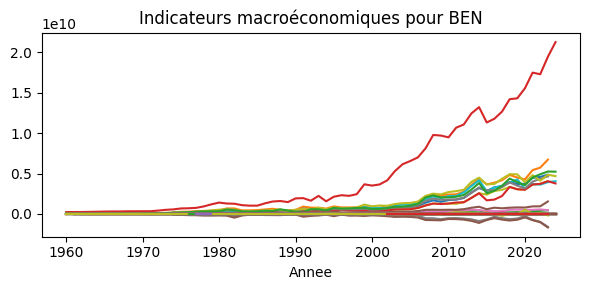

In [ ]:
import matplotlib.pyplot as plt
ax = df1.plot(figsize=(6, 3), title=f"Indicateurs macroéconomiques pour {country}")
ax.legend_.remove()  # Supprime la légende
plt.tight_layout()
# plt.show()

1. CHARGEMENT ET EXPLORATION DES DONNÉES
ARCH Test Stat: 652.4402644606893
ARCH Test p-value: 6.598668755283141e-132
LM Stat: 72.00396974195955
LM p-value: 2.5392556702375626e-152
Données financières: (2636, 8)
Données macro: (65, 135)
Période financière: 2014-04-28 00:00:00 to 2025-08-25 00:00:00
Période macro: 1960 to 2024

2. GESTION DES DÉLAIS DE PUBLICATION MACRO

4. FUSION DES DONNÉES
✅ Dataset fusionné: (2636, 137)
✅ Période couverte: 2014-04-28 00:00:00 to 2025-08-25 00:00:00

5. ANALYSE EXPLORATOIRE
Statistiques des rendements:
count   2636.000000
mean      -0.249524
std        7.161319
min     -230.258509
25%       -0.542007
50%        0.000000
75%        0.557765
max        7.238807
Name: Returns, dtype: float64

Statistiques de la volatilité:
count   2615.000000
mean       3.018266
std        6.423893
min        0.000908
25%        1.288987
50%        1.905705
75%        2.701697
max       66.967478
Name: volatility, dtype: float64

Disponibilité des données macro:
col1    

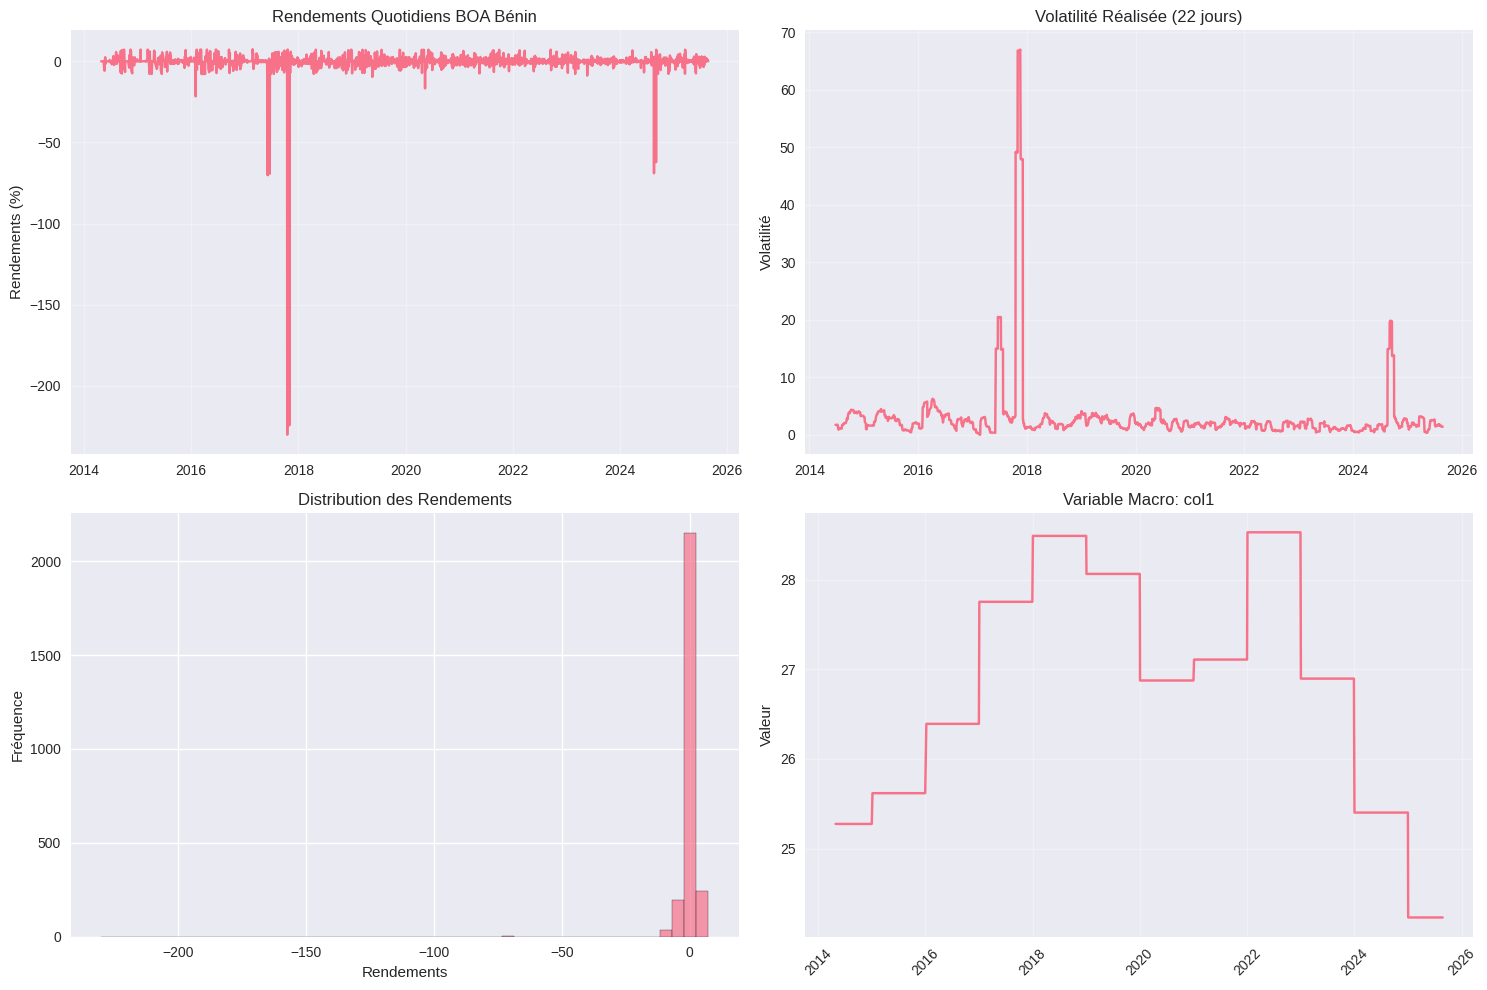

✅ Analyse exploratoire terminée
✅ Visualisations sauvegardées

7. SAUVEGARDE DES RÉSULTATS
✅ Dataset final sauvegardé: dataset_final.csv

Variables disponibles dans le dataset final:
- Rendements: Returns
- Volatilité réalisée: volatility
- Variables macro: 135 variables
- Période: 2014-04-28 00:00:00 to 2025-08-25 00:00:00
- Observations: 2636

ANALYSE PRÉLIMINAIRE TERMINÉE AVEC SUCCÈS!


In [ ]:

# -*- coding: utf-8 -*-
"""
Identification des Variables Macroéconomiques Impactant la Volatilité de la BOA Bénin
Mémoire Master - Analyse des Défis de Désaisonnalisation et Colinéarité
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuration
pd.set_option('display.float_format', '{:.6f}'.format)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 10)

# 1. CHARGEMENT ET EXPLORATION INITIALE
# =====================================

print("="*80)
print("1. CHARGEMENT ET EXPLORATION DES DONNÉES")
print("="*80)

# Chargement des données
df_finance = pd.read_csv('boab.csv', parse_dates=['Date'], dayfirst=True)
df_macro = pd.read_csv('macro.csv')

# Nettoyage des données financières
def convert_volume(vol):
    if isinstance(vol, str):
        vol = vol.replace(',', '.').replace('K', 'e3')
        return float(vol)
    return vol

df_finance['Vol.'] = df_finance['Vol.'].apply(convert_volume)
cols_to_multiply = ['Dernier', 'Ouv.', ' Plus Haut', 'Plus Bas']
df_finance[cols_to_multiply] = df_finance[cols_to_multiply].apply(lambda x: x * 100)
df_finance['Variation %'] = df_finance['Variation %'].str.replace(',', '.').str.rstrip('%').astype(float)

df_finance = df_finance.sort_values('Date').set_index('Date')

# Ajustement des prix en fonction des splits
splits = {
    '2004-08-13': 1.05,
    '2009-12-08': 1.125,
    '2017-06-20': 2,
    '2017-10-31': 10,
    '2024-09-03': 2
}

# Créer une colonne pour les prix ajustés
adjustment_factor = 1.0
df_finance['Adj Dernier'] = df_finance['Dernier'].copy()

for split_date, split_ratio in sorted(splits.items(), reverse=True):
    # Tous les prix avant la date du split sont multipliés par le ratio
    mask = df_finance.index < pd.to_datetime(split_date)
    adjustment_factor *= split_ratio
    df_finance.loc[mask, 'Adj Dernier'] *= split_ratio

df_finance['Returns'] = 100 * np.log(df_finance['Adj Dernier'] / df_finance['Adj Dernier'].shift(1))
df_finance = df_finance.dropna()

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_arch
from statsmodels.tsa.stattools import adfuller

# On prend la série des rendements
returns = df_finance['Returns']

# Appliquer le test d'ARCH
# max_lag = nombre de lags (ordres) de l'autocorrélation des résidus carrés à tester
test_result = het_arch(returns, maxlag=12)

print('ARCH Test Stat:', test_result[0])
print('ARCH Test p-value:', test_result[1])
print('LM Stat:', test_result[2])
print('LM p-value:', test_result[3])

# =====================================


# Nettoyage des données macro
df_macro.columns = df_macro.columns.str.replace('\xa0', ' ', regex=False).str.strip()
df_macro['Annee'] = pd.to_datetime(df_macro['Annee'].astype(str).str.strip()).dt.year
macro_vars = [col for col in df_macro.columns if col != 'Annee']
df_macro_clean = df_macro.set_index('Annee')

print(f"Données financières: {df_finance.shape}")
print(f"Données macro: {df_macro_clean.shape}")
print(f"Période financière: {df_finance.index.min()} to {df_finance.index.max()}")
print(f"Période macro: {df_macro_clean.index.min()} to {df_macro_clean.index.max()}")

# 2. GESTION DU DÉLAI DE PUBLICATION MACRO
# ========================================

print("\n" + "="*80)
print("2. GESTION DES DÉLAIS DE PUBLICATION MACRO")
print("="*80)

def get_available_macro_data(reference_date, df_macro, publication_month=7, publication_day=1):
    """
    Retourne la dernière donnée macro disponible à une date de référence
    selon les délais de publication officiels.
    """
    # Date de publication pour l'année N (1er juillet N+1)
    publication_date = pd.Timestamp(year=reference_date.year + 1,
                                   month=publication_month,
                                   day=publication_day)

    # Si la date de référence est avant la publication, utiliser l'année N-1
    if reference_date < publication_date:
        available_year = reference_date.year - 1
    else:
        available_year = reference_date.year

    # Retourner la donnée macro pour l'année disponible
    if available_year in df_macro.index:
        return df_macro.loc[available_year]
    else:
        # Si l'année n'est pas disponible, chercher la plus récente
        available_years = [y for y in df_macro.index if y <= available_year]
        if available_years:
            return df_macro.loc[max(available_years)]
        else:
            return pd.Series([np.nan] * len(df_macro.columns), index=df_macro.columns)

# Création d'un index quotidien complet
all_dates = pd.date_range(start=df_finance.index.min(), end=df_finance.index.max(), freq='D')
df_daily = pd.DataFrame(index=all_dates)

# Application de la logique de délai de publication
macro_data_delayed = []
for date in df_daily.index:
    macro_values = get_available_macro_data(date, df_macro_clean)
    macro_data_delayed.append(macro_values)

# Création du DataFrame avec délais de publication corrects
df_macro_delayed = pd.DataFrame(macro_data_delayed, index=df_daily.index)
df_macro_delayed.columns = [f'{col}' for col in df_macro_delayed.columns]

df_macro_final = df_macro_delayed.copy()

# 4. FUSION AVEC DONNÉES FINANCIÈRES
# ==================================

print("\n" + "="*80)
print("4. FUSION DES DONNÉES")
print("="*80)

# Fusion avec les données financières
df_merged = df_finance.merge(df_macro_final, left_index=True, right_index=True, how='left')
df_merged = df_merged.dropna(subset=['Returns'])

# Nettoyage : suppression des colonnes inutiles
cols_to_drop = ['Ouv.', ' Plus Haut', 'Plus Bas', 'Vol.', 'Variation %', 'Adj Dernier','Dernier']
df_merged = df_merged.drop(columns=[col for col in cols_to_drop if col in df_merged.columns], errors='ignore')

# Calcul de la volatilité réalisée
df_merged['volatility'] = df_merged['Returns'].rolling(window=22).std()

print(f"✅ Dataset fusionné: {df_merged.shape}")
print(f"✅ Période couverte: {df_merged.index.min()} to {df_merged.index.max()}")

# 5. ANALYSE EXPLORATOIRE
# ======================

print("\n" + "="*80)
print("5. ANALYSE EXPLORATOIRE")
print("="*80)

# Statistiques descriptives
print("Statistiques des rendements:")
print(df_merged['Returns'].describe())

print("\nStatistiques de la volatilité:")
print(df_merged['volatility'].describe())

# Vérification de la disponibilité des données macro
print("\nDisponibilité des données macro:")
macro_availability = df_merged[macro_vars].notna().mean().sort_values(ascending=False)
print(macro_availability.head(10))

# 6. VISUALISATION
# ================

print("\n" + "="*80)
print("6. VISUALISATION DES DONNÉES")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Rendements
axes[0, 0].plot(df_merged.index, df_merged['Returns'])
axes[0, 0].set_title('Rendements Quotidiens BOA Bénin')
axes[0, 0].set_ylabel('Rendements (%)')
axes[0, 0].grid(True, alpha=0.3)

# Volatilité réalisée
axes[0, 1].plot(df_merged.index, df_merged['volatility'])
axes[0, 1].set_title('Volatilité Réalisée (22 jours)')
axes[0, 1].set_ylabel('Volatilité')
axes[0, 1].grid(True, alpha=0.3)

# Distribution des rendements
axes[1, 0].hist(df_merged['Returns'].dropna(), bins=50, alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Distribution des Rendements')
axes[1, 0].set_xlabel('Rendements')
axes[1, 0].set_ylabel('Fréquence')

# Exemple de variable macro
if len(macro_vars) > 0:
    macro_example = macro_vars[0]
    axes[1, 1].plot(df_merged.index, df_merged[macro_example])
    axes[1, 1].set_title(f'Variable Macro: {macro_example}')
    axes[1, 1].set_ylabel('Valeur')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('exploratory_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Analyse exploratoire terminée")
print("✅ Visualisations sauvegardées")

# 7. SAUVEGARDE DU DATASET FINAL
# ==============================

print("\n" + "="*80)
print("7. SAUVEGARDE DES RÉSULTATS")
print("="*80)

# Sauvegarde du dataset fusionné
df_merged.to_csv('dataset_final.csv')
print("✅ Dataset final sauvegardé: dataset_final.csv")

# Résumé des variables disponibles
print(f"\nVariables disponibles dans le dataset final:")
print(f"- Rendements: Returns")
print(f"- Volatilité réalisée: volatility")
print(f"- Variables macro: {len(macro_vars)} variables")
print(f"- Période: {df_merged.index.min()} to {df_merged.index.max()}")
print(f"- Observations: {len(df_merged)}")

print("\n" + "="*80)
print("ANALYSE PRÉLIMINAIRE TERMINÉE AVEC SUCCÈS!")
print("="*80)

In [ ]:
df_merged.head()
list(df_merged.columns)

['Returns',
 'col1',
 'col2',
 'col3',
 'col4',
 'col5',
 'col6',
 'col7',
 'col8',
 'col9',
 'col10',
 'col11',
 'col12',
 'col13',
 'col14',
 'col15',
 'col16',
 'col17',
 'col18',
 'col19',
 'col20',
 'col21',
 'col22',
 'col23',
 'col24',
 'col25',
 'col26',
 'col27',
 'col28',
 'col29',
 'col30',
 'col31',
 'col32',
 'col33',
 'col34',
 'col35',
 'col36',
 'col37',
 'col38',
 'col39',
 'col40',
 'col41',
 'col42',
 'col43',
 'col44',
 'col45',
 'col46',
 'col47',
 'col48',
 'col49',
 'col50',
 'col51',
 'col52',
 'col53',
 'col54',
 'col55',
 'col56',
 'col57',
 'col58',
 'col59',
 'col60',
 'col61',
 'col62',
 'col63',
 'col64',
 'col65',
 'col66',
 'col67',
 'col68',
 'col69',
 'col70',
 'col71',
 'col72',
 'col73',
 'col74',
 'col75',
 'col76',
 'col77',
 'col78',
 'col79',
 'col80',
 'col81',
 'col82',
 'col83',
 'col84',
 'col85',
 'col86',
 'col87',
 'col88',
 'col89',
 'col90',
 'col91',
 'col92',
 'col93',
 'col94',
 'col95',
 'col96',
 'col97',
 'col98',
 'col99',
 'col10

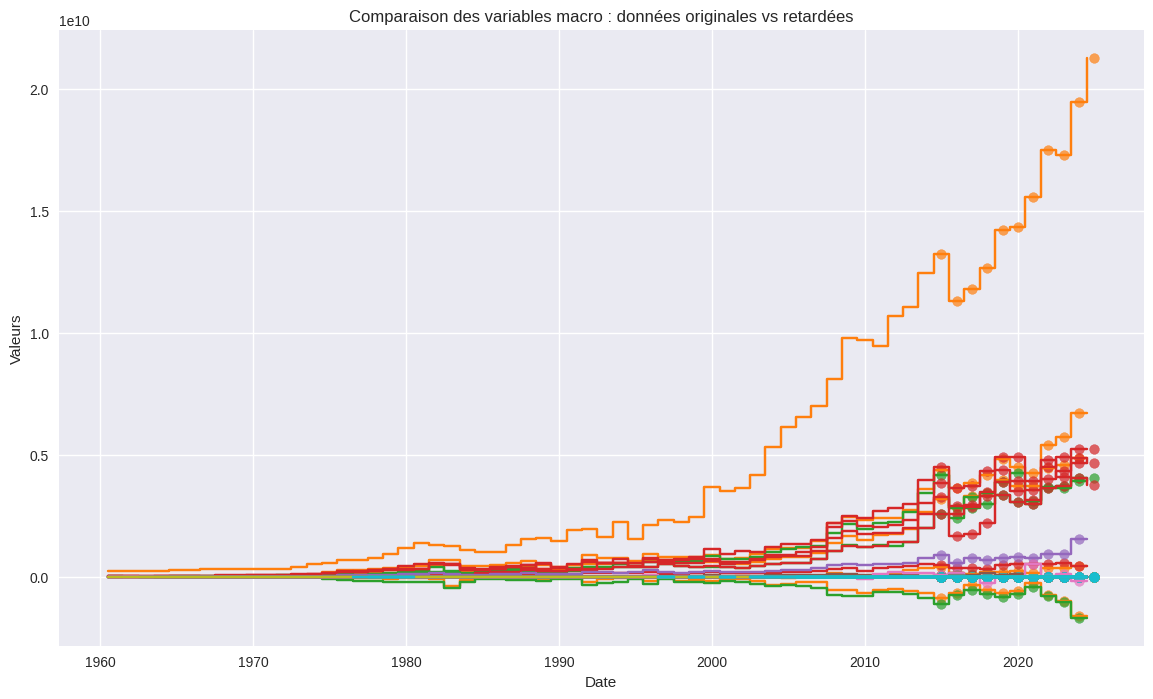

In [ ]:
import numpy as np

var_macros = df_macro_clean.columns.tolist()
dates_clean = pd.to_datetime(df_macro_clean.index.astype(str) + '-07-01')

plt.figure(figsize=(14, 8))

colors = plt.cm.get_cmap('tab10', len(var_macros))  # palette de couleurs

for i, var_macro in enumerate(var_macros):
    plt.step(dates_clean, df_macro_clean[var_macro], label=f'Original {var_macro}', where='post', color=colors(i))

    dates_to_plot = pd.date_range(start=df_macro_final.index.min(), end=df_macro_final.index.max(), freq='YS')

    delayed_values = []
    for date in dates_to_plot:
        if date in df_macro_final.index:
            delayed_values.append(df_macro_final.loc[date, var_macro])
        else:
            delayed_values.append(np.nan)

    plt.scatter(dates_to_plot, delayed_values, color=colors(i), label=f'Retardé {var_macro}', alpha=0.7, marker='o')

plt.title("Comparaison des variables macro : données originales vs retardées")
plt.xlabel("Date")
plt.ylabel("Valeurs")
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_arch
from statsmodels.tsa.stattools import adfuller

# 1. Extraction des rendements sans valeurs manquantes
returns = df_merged['Returns'].dropna()

print("\n" + "="*80)
print("TEST DE HÉTÉROSCÉDASTICITÉ (ARCH EFFECTS)")
print("="*80)

# 2. Test d'ARCH pour détecter des effets de volatilité conditionnelle
max_lag = 12
arch_test = het_arch(returns, maxlag=max_lag)

print(f"ARCH Test (maxlag={max_lag})")
print(f" - LM Statistic     : {arch_test[0]:.4f}")
print(f" - LM p-value       : {arch_test[1]:.4e}")
print(f" - F Statistic      : {arch_test[2]:.4f}")
print(f" - F-test p-value   : {arch_test[3]:.4e}")

if arch_test[1] < 0.05:
    print("➡️  Présence d'hétéroscédasticité conditionnelle (effets ARCH détectés)")
else:
    print("✅ Aucune hétéroscédasticité conditionnelle significative détectée")

# 3. Test de stationnarité : Augmented Dickey-Fuller
print("\n" + "="*80)
print("TEST DE STATIONNARITÉ (ADF)")
print("="*80)

adf_result = adfuller(returns)

print(f"ADF Statistic        : {adf_result[0]:.4f}")
print(f"p-value              : {adf_result[1]:.4e}")
print(f"Nombre de retards    : {adf_result[2]}")
print(f"Nbre observations    : {adf_result[3]}")
print("Valeurs critiques    :")
for key, val in adf_result[4].items():
    print(f"   - {key} : {val:.4f}")

if adf_result[1] < 0.05:
    print("✅ La série est STATIONNAIRE au seuil de 5%")
else:
    print("⚠️ La série n'est PAS stationnaire au seuil de 5%")


TEST DE HÉTÉROSCÉDASTICITÉ (ARCH EFFECTS)
ARCH Test (maxlag=12)
 - LM Statistic     : 652.4403
 - LM p-value       : 6.5987e-132
 - F Statistic      : 72.0040
 - F-test p-value   : 2.5393e-152
➡️  Présence d'hétéroscédasticité conditionnelle (effets ARCH détectés)

TEST DE STATIONNARITÉ (ADF)
ADF Statistic        : -11.0001
p-value              : 6.7178e-20
Nombre de retards    : 19
Nbre observations    : 2616
Valeurs critiques    :
   - 1% : -3.4329
   - 5% : -2.8626
   - 10% : -2.5674
✅ La série est STATIONNAIRE au seuil de 5%


In [ ]:
# -*- coding: utf-8 -*-
"""
Vérification de la Stationnarité des Variables Macroéconomiques
et de l'Hétéroscédasticité des Rendements
Mémoire Master - BANK OF AFRICA Bénin
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import VarianceRatio
from statsmodels.stats.diagnostic import het_arch
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuration
pd.set_option('display.float_format', '{:.6f}'.format)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 10)

# 1. CHARGEMENT DES DONNÉES
# =========================

print("="*80)
print("1. CHARGEMENT DES DONNÉES")
print("="*80)

# Charger le dataset final précédemment créé
df_merged = pd.read_csv('dataset_final.csv', parse_dates=['Date'], index_col='Date')



print(f"Dataset chargé: {df_merged.shape}")
print(f"Période: {df_merged.index.min()} to {df_merged.index.max()}")
print(f"Variables disponibles: {list(df_merged.columns)}")
# Informations de base
print(f"\n✅ Dataset chargé: {df_merged.shape[0]} lignes, {df_merged.shape[1]} colonnes")
print(f"🗓️  Période: {df_merged.index.min().date()} ➜ {df_merged.index.max().date()}")
print(f"📊 Nombre de variables initiales: {df_merged.shape[1]}")

# Aperçu des premières colonnes
print("\n🔎 Aperçu des premières variables:")
print(df_merged.iloc[:, :10].head())

# Analyse des valeurs manquantes
missing_percent = df_merged.isna().mean() * 100
missing_summary = missing_percent.sort_values(ascending=False)

print("\n📉 Top 20 des variables avec le plus de valeurs manquantes:")
print(missing_summary.head(20))

# Filtrage des variables trop incomplètes (>50% de NaN par exemple)
seuil_nan = 0.80
cols_to_drop = missing_percent[missing_percent > seuil_nan].index.tolist()
print(f"\n🗑️  Variables supprimées (plus de {seuil_nan*100:.0f}% de NaN): {len(cols_to_drop)}")

# Supprimer les colonnes inutiles
df_filtered = df_merged.drop(columns=cols_to_drop)

print(f"\n📉 Nouvelle dimension du dataset: {df_filtered.shape}")
print(f"📊 Variables restantes: {len(df_filtered.columns)}")

# (Optionnel) Supprimer les colonnes constantes (même valeur partout)
n_unique = df_filtered.nunique()
constant_cols = n_unique[n_unique <= 1].index.tolist()
print(f"\n⚠️  Variables constantes supprimées: {len(constant_cols)}")
df_filtered = df_filtered.drop(columns=constant_cols)

# Résumé final
print("\n✅ Chargement et nettoyage initial terminé.")
print(f"🧾 Dimensions finales: {df_filtered.shape[0]} lignes, {df_filtered.shape[1]} colonnes")
df_merged=df_filtered.copy()
print("\n✅ Chargement et nettoyage initial terminé.")
print(f"🧾 Dimensions finales: {df_merged.shape[0]} lignes, {df_merged.shape[1]} colonnes")
print(f"Variables Restante: {list(df_merged.columns)}")

1. CHARGEMENT DES DONNÉES
Dataset chargé: (2636, 137)
Période: 2014-04-28 00:00:00 to 2025-08-25 00:00:00
Variables disponibles: ['Returns', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20', 'col21', 'col22', 'col23', 'col24', 'col25', 'col26', 'col27', 'col28', 'col29', 'col30', 'col31', 'col32', 'col33', 'col34', 'col35', 'col36', 'col37', 'col38', 'col39', 'col40', 'col41', 'col42', 'col43', 'col44', 'col45', 'col46', 'col47', 'col48', 'col49', 'col50', 'col51', 'col52', 'col53', 'col54', 'col55', 'col56', 'col57', 'col58', 'col59', 'col60', 'col61', 'col62', 'col63', 'col64', 'col65', 'col66', 'col67', 'col68', 'col69', 'col70', 'col71', 'col72', 'col73', 'col74', 'col75', 'col76', 'col77', 'col78', 'col79', 'col80', 'col81', 'col82', 'col83', 'col84', 'col85', 'col86', 'col87', 'col88', 'col89', 'col90', 'col91', 'col92', 'col93', 'col94', 'col95', 'col96', 'col

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de corrélation absolue
corr_matrix = df_merged.corr().abs()

# Masquer la moitié supérieure
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))



# Seuil de corrélation
threshold = 0.8
protected_vars = ['Returns', 'volatility']

# Colonnes candidates à suppression (hors variables protégées)
candidates = [col for col in df_merged.columns if col not in protected_vars]

upper = corr_matrix.loc[candidates, candidates].where(np.triu(np.ones((len(candidates), len(candidates)), dtype=bool), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > threshold)]

print(f"Variables supprimées (hors protégées): {to_drop}")
print(f"Initial variables: {len(df_merged.columns)}")
print(f"Variables restantes après suppression: {len(df_merged.columns) - len(to_drop)}")

# Supprimer les colonnes trop corrélées
df_reduced = df_merged.drop(columns=to_drop)

# Nouvelle matrice de corrélation
corr_matrix = df_reduced.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))



# Mise à jour du dataframe principal
df_merged = df_reduced.copy()

Variables supprimées (hors protégées): ['col12', 'col13', 'col24', 'col41', 'col44', 'col49', 'col50', 'col53', 'col77', 'col79', 'col82', 'col87', 'col90', 'col91', 'col92', 'col122', 'col123', 'col124', 'col126']
Initial variables: 35
Variables restantes après suppression: 16


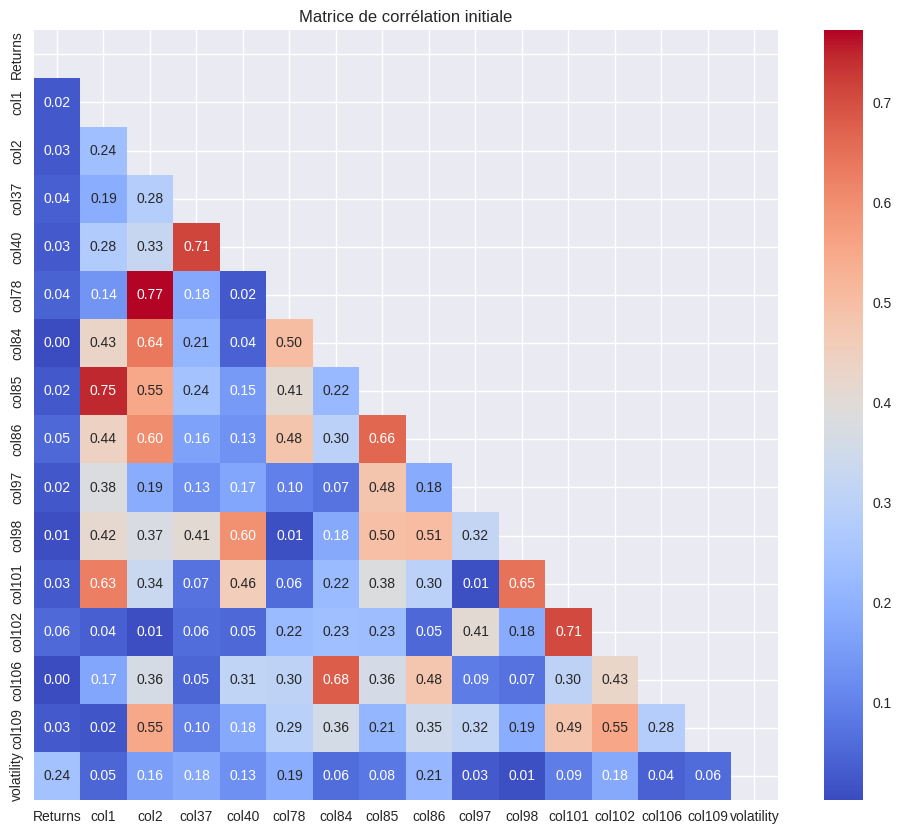

Variables supprimées (hors protégées): []
Initial variables: 16
Variables restantes après suppression: 16


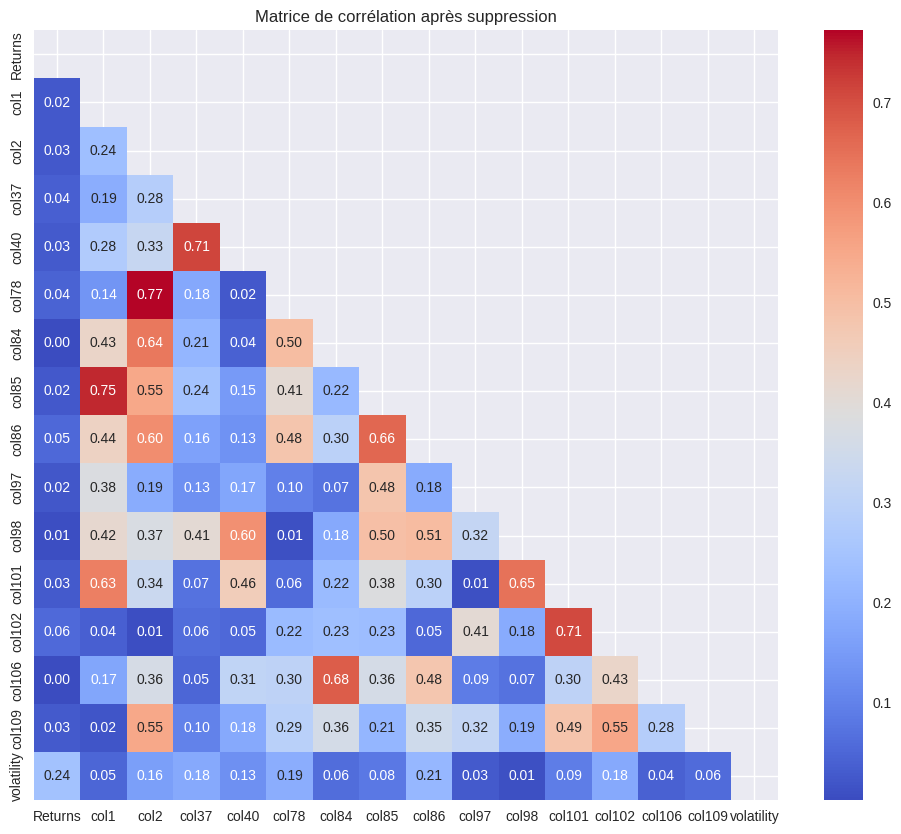

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Matrice de corrélation absolue
corr_matrix = df_merged.corr().abs()

# Masquer la moitié supérieure
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Matrice de corrélation initiale")
plt.show()

# Seuil de corrélation
threshold = 0.8
protected_vars = ['Returns', 'volatility']

# Colonnes candidates à suppression (hors variables protégées)
candidates = [col for col in df_merged.columns if col not in protected_vars]

upper = corr_matrix.loc[candidates, candidates].where(np.triu(np.ones((len(candidates), len(candidates)), dtype=bool), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > threshold)]

print(f"Variables supprimées (hors protégées): {to_drop}")
print(f"Initial variables: {len(df_merged.columns)}")
print(f"Variables restantes après suppression: {len(df_merged.columns) - len(to_drop)}")

# Supprimer les colonnes trop corrélées
df_reduced = df_merged.drop(columns=to_drop)

# Nouvelle matrice de corrélation
corr_matrix = df_reduced.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Matrice de corrélation après suppression")
plt.show()

# Mise à jour du dataframe principal
df_merged = df_reduced.copy()


2. TEST DE STATIONNARITÉ DES VARIABLES MACROÉCONOMIQUES
Nombre de variables macro à tester: 14

Résultats des tests de stationnarité:
Variable  Stationnaire  p-value  Statistique ADF   Interprétation  Observations
   col40         False 0.116397        -2.496219 Non stationnaire          2636
  col109         False 0.118341        -2.488323 Non stationnaire          2636
   col37         False 0.163477        -2.326778 Non stationnaire          2636
   col98         False 0.179673        -2.276458 Non stationnaire          2636
   col97         False 0.180482        -2.274025 Non stationnaire          2636
  col106         False 0.299114        -1.971708 Non stationnaire          2636
   col86         False 0.368407        -1.824420 Non stationnaire          2636
  col102         False 0.403525        -1.754003 Non stationnaire          2636
   col78         False 0.420958        -1.719766 Non stationnaire          2636
   col84         False 0.445236        -1.672690 Non stationnaire

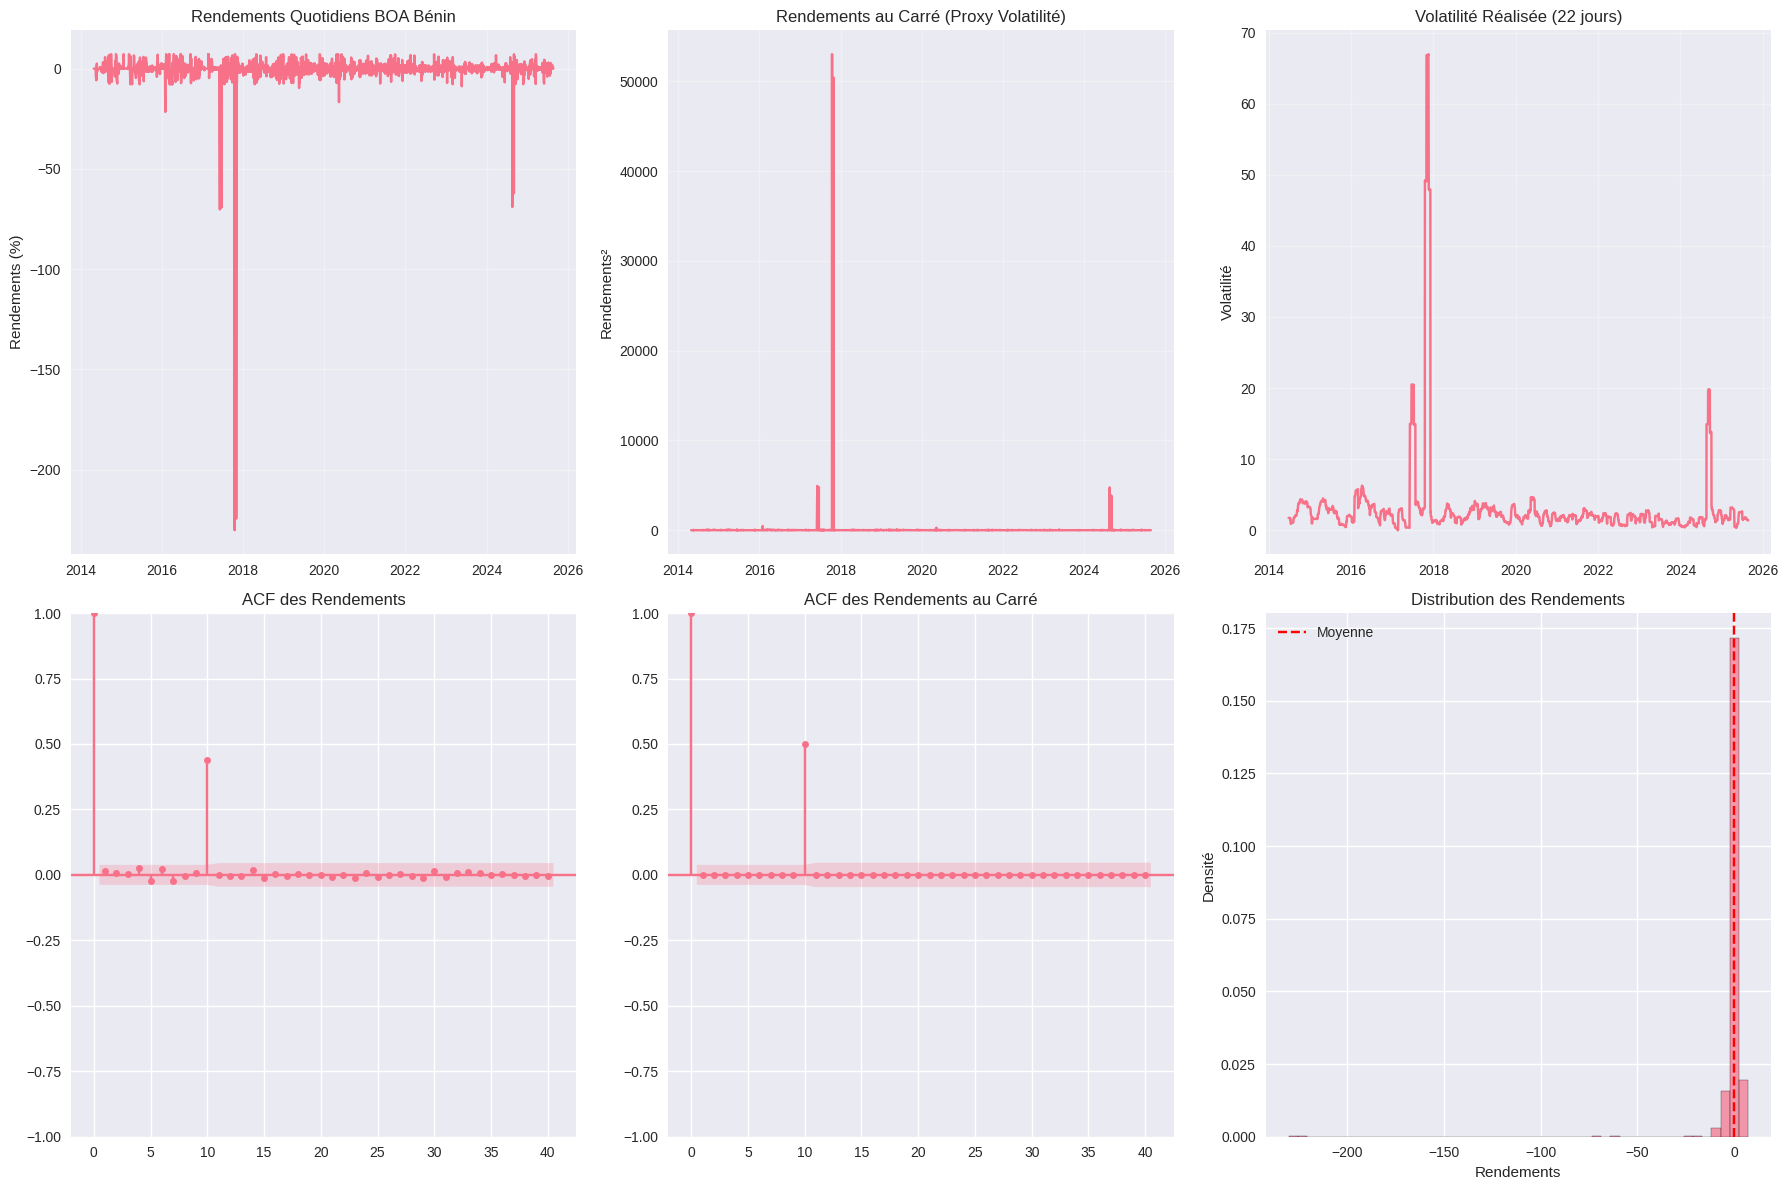


6. ANALYSE DES CLUSTERS DE VOLATILITÉ
Seuil de haute volatilité: 2.7017
Jours de haute volatilité: 654/2615 (25.0%)
Durée moyenne des clusters de volatilité: 21.8 jours
Nombre de clusters: 30

7. SAUVEGARDE DES RÉSULTATS

ANALYSE DE STATIONNARITÉ ET HÉTÉROSCÉDASTICITÉ TERMINÉE!
RÉSUMÉ DES PRINCIPAUX RÉSULTATS:
- Variables macro stationnaires: 0/14
- Hétéroscédasticité détectée: True
- Périodes de haute volatilité: 654/2615 jours


In [ ]:
# 2. VÉRIFICATION DE LA STATIONNARITÉ DES VARIABLES MACRO
# =======================================================

print("\n" + "="*80)
print("2. TEST DE STATIONNARITÉ DES VARIABLES MACROÉCONOMIQUES")
print("="*80)

def test_stationarity(series, alpha=0.05, series_name=""):
    """Test de stationnarité ADF avec résultats détaillés"""
    if series.dropna().empty:
        return False, np.nan, np.nan

    try:
        result = adfuller(series.dropna())
        p_value = result[1]
        test_statistic = result[0]
        is_stationary = p_value < alpha

        # Interprétation
        interpretation = "Stationnaire" if is_stationary else "Non stationnaire"

        return is_stationary, p_value, test_statistic, interpretation
    except Exception as e:
        print(f"Erreur avec {series_name}: {e}")
        return False, np.nan, np.nan, "Erreur"

# Identifier les variables macro (exclure les colonnes financières)
financial_cols = ['Returns', 'volatility', 'Dernier']
macro_vars = [col for col in df_merged.columns if col not in financial_cols]

print(f"Nombre de variables macro à tester: {len(macro_vars)}")

# Tests de stationnarité
stationarity_results = []
for var in macro_vars:
    series = df_merged[var].dropna()
    if len(series) > 10:  # Au moins 10 observations
        is_stationary, p_value, test_stat, interpretation = test_stationarity(
            series, series_name=var
        )
        stationarity_results.append({
            'Variable': var,
            'Stationnaire': is_stationary,
            'p-value': p_value,
            'Statistique ADF': test_stat,
            'Interprétation': interpretation,
            'Observations': len(series)
        })

# Création du DataFrame des résultats
stationarity_df = pd.DataFrame(stationarity_results)
stationarity_df = stationarity_df.sort_values('p-value')

print("\nRésultats des tests de stationnarité:")
print(stationarity_df.to_string(index=False))

# Statistiques
stationary_count = stationarity_df['Stationnaire'].sum()
total_tested = len(stationarity_df)
print(f"\n📊 Résumé: {stationary_count}/{total_tested} variables sont stationnaires")

# 3. CRÉATION DU DATASET DIFFÉRENCIÉ
# ==================================

print("\n" + "="*80)
print("3. CRÉATION DU DATASET DIFFÉRENCIÉ POUR VARIABLES NON STATIONNAIRES")
print("="*80)

# Créer une copie du dataset pour les différences premières
df_diff = df_merged.copy()

# Appliquer les différences premières aux variables non stationnaires
for _, row in stationarity_df.iterrows():
    if not row['Stationnaire'] and pd.notna(row['p-value']):
        var = row['Variable']
        df_diff[f'{var}_diff'] = df_diff[var].diff()
        print(f"✅ Différence première appliquée à: {var}")

# Vérification de la stationnarité après différenciation
print("\nVérification de la stationnarité après différenciation:")
stationarity_after_diff = []
for var in df_diff.columns:
    if var.endswith('_diff'):
        original_var = var.replace('_diff', '')
        series = df_diff[var].dropna()
        if len(series) > 10:
            is_stationary, p_value, test_stat, interpretation = test_stationarity(
                series, series_name=var
            )
            stationarity_after_diff.append({
                'Variable': var,
                'Stationnaire': is_stationary,
                'p-value': p_value,
                'Statistique ADF': test_stat,
                'Interprétation': interpretation
            })

stationarity_after_df = pd.DataFrame(stationarity_after_diff)
print(stationarity_after_df.to_string(index=False))

# 4. TEST D'HÉTÉROSCÉDASTICITÉ DES RENDUEMENTS
# =============================================

print("\n" + "="*80)
print("4. TEST D'HÉTÉROSCÉDASTICITÉ DES RENDUEMENTS")
print("="*80)

# Test ARCH-LM
returns = df_merged['Returns'].dropna()
arch_lm_test = het_arch(returns)

print(f"Test ARCH-LM sur les rendements:")
print(f"Statistique de test: {arch_lm_test[0]:.4f}")
print(f"p-value: {arch_lm_test[1]:.6f}")

# Test de ratio de variance
vr_test = VarianceRatio(returns, lags=2)
print(f"\nTest de Ratio de Variance:")
print(f"Statistique de test: {vr_test.stat:.4f}")
print(f"p-value: {vr_test.pvalue:.6f}")

# Interprétation
alpha = 0.05
if arch_lm_test[1] < alpha:
    print("\n✅ HÉTÉROSCÉDASTICITÉ DÉTECTÉE")
    print("   - La volatilité est conditionnelle (clusterisation)")
    print("   - Modélisation ARCH/GARCH justifiée")
else:
    print("\n❌ AUCUNE HÉTÉROSCÉDASTICITÉ SIGNIFICATIVE DÉTECTÉE")
    print("   - La volatilité semble constante dans le temps")

# 5. ANALYSE VISUELLE DE L'HÉTÉROSCÉDASTICITÉ
# ============================================

print("\n" + "="*80)
print("5. ANALYSE VISUELLE DE L'HÉTÉROSCÉDASTICITÉ")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Rendements
axes[0, 0].plot(df_merged.index, df_merged['Returns'])
axes[0, 0].set_title('Rendements Quotidiens BOA Bénin')
axes[0, 0].set_ylabel('Rendements (%)')
axes[0, 0].grid(True, alpha=0.3)

# Rendements au carré (proxy de la volatilité)
axes[0, 1].plot(df_merged.index, df_merged['Returns']**2)
axes[0, 1].set_title('Rendements au Carré (Proxy Volatilité)')
axes[0, 1].set_ylabel('Rendements²')
axes[0, 1].grid(True, alpha=0.3)

# Volatilité réalisée
axes[0, 2].plot(df_merged.index, df_merged['volatility'])
axes[0, 2].set_title('Volatilité Réalisée (22 jours)')
axes[0, 2].set_ylabel('Volatilité')
axes[0, 2].grid(True, alpha=0.3)

# ACF des rendements
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(returns, ax=axes[1, 0], lags=40, alpha=0.05, title='ACF des Rendements')

# ACF des rendements au carré
plot_acf(returns**2, ax=axes[1, 1], lags=40, alpha=0.05, title='ACF des Rendements au Carré')

# Distribution des rendements
axes[1, 2].hist(returns, bins=50, density=True, alpha=0.7, edgecolor='black')
axes[1, 2].axvline(returns.mean(), color='red', linestyle='--', label='Moyenne')
axes[1, 2].set_title('Distribution des Rendements')
axes[1, 2].set_xlabel('Rendements')
axes[1, 2].set_ylabel('Densité')
axes[1, 2].legend()

plt.tight_layout()
plt.savefig('heteroscedasticity_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. ANALYSE DES CLUSTERS DE VOLATILITÉ
# =====================================

print("\n" + "="*80)
print("6. ANALYSE DES CLUSTERS DE VOLATILITÉ")
print("="*80)

# Détection des périodes de haute volatilité
volatility = df_merged['volatility'].dropna()
high_vol_threshold = volatility.quantile(0.75)  # Seuil du 75ème percentile

high_vol_periods = volatility > high_vol_threshold
high_vol_days = high_vol_periods.sum()
total_days = len(volatility)

print(f"Seuil de haute volatilité: {high_vol_threshold:.4f}")
print(f"Jours de haute volatilité: {high_vol_days}/{total_days} ({high_vol_days/total_days*100:.1f}%)")

# Durée moyenne des clusters de volatilité
volatility_clusters = []
current_cluster = 0
for i in range(len(high_vol_periods)):
    if high_vol_periods.iloc[i]:
        current_cluster += 1
    else:
        if current_cluster > 0:
            volatility_clusters.append(current_cluster)
            current_cluster = 0

if current_cluster > 0:
    volatility_clusters.append(current_cluster)

if volatility_clusters:
    avg_cluster_duration = np.mean(volatility_clusters)
    print(f"Durée moyenne des clusters de volatilité: {avg_cluster_duration:.1f} jours")
    print(f"Nombre de clusters: {len(volatility_clusters)}")
else:
    print("Aucun cluster de volatilité détecté")

# 7. SAUVEGARDE DES RÉSULTATS
# ===========================

print("\n" + "="*80)
print("7. SAUVEGARDE DES RÉSULTATS")
print("="*80)



# Sauvegarde des résultats d'hétéroscédasticité
heteroscedasticity_results = {
    'arch_lm_statistic': arch_lm_test[0],
    'arch_lm_pvalue': arch_lm_test[1],
    'variance_ratio_statistic': vr_test.stat,
    'variance_ratio_pvalue': vr_test.pvalue,
    'heteroscedasticity_detected': arch_lm_test[1] < 0.05,
    'high_volatility_threshold': high_vol_threshold,
    'high_volatility_days': high_vol_days,
    'total_days': total_days
}

print("\n" + "="*80)
print("ANALYSE DE STATIONNARITÉ ET HÉTÉROSCÉDASTICITÉ TERMINÉE!")
print("="*80)
print("RÉSUMÉ DES PRINCIPAUX RÉSULTATS:")
print(f"- Variables macro stationnaires: {stationary_count}/{total_tested}")
print(f"- Hétéroscédasticité détectée: {arch_lm_test[1] < 0.05}")
print(f"- Périodes de haute volatilité: {high_vol_days}/{total_days} jours")
print("="*80)

In [ ]:
# Créer une copie du dataset initial
df_diff = df_merged.copy()

# Liste des variables non stationnaires
non_stationary_vars = []

for _, row in stationarity_df.iterrows():
    if not row['Stationnaire'] and pd.notna(row['p-value']):
        var = row['Variable']
        non_stationary_vars.append(var)
        # Créer la variable différenciée
        df_diff[f'{var}_diff'] = df_diff[var].diff()
        print(f"✅ Différence première appliquée à: {var}")

# Supprimer les colonnes originales non stationnaires
df_diff.drop(columns=non_stationary_vars, inplace=True)
print(f"\nColonnes originales non stationnaires supprimées : {non_stationary_vars}")

# Afficher les colonnes finales
print(f"\nColonnes restantes dans df_diff : {list(df_diff.columns)}")

✅ Différence première appliquée à: col40
✅ Différence première appliquée à: col109
✅ Différence première appliquée à: col37
✅ Différence première appliquée à: col98
✅ Différence première appliquée à: col97
✅ Différence première appliquée à: col106
✅ Différence première appliquée à: col86
✅ Différence première appliquée à: col102
✅ Différence première appliquée à: col78
✅ Différence première appliquée à: col84
✅ Différence première appliquée à: col85
✅ Différence première appliquée à: col101
✅ Différence première appliquée à: col1
✅ Différence première appliquée à: col2

Colonnes originales non stationnaires supprimées : ['col40', 'col109', 'col37', 'col98', 'col97', 'col106', 'col86', 'col102', 'col78', 'col84', 'col85', 'col101', 'col1', 'col2']

Colonnes restantes dans df_diff : ['Returns', 'volatility', 'col40_diff', 'col109_diff', 'col37_diff', 'col98_diff', 'col97_diff', 'col106_diff', 'col86_diff', 'col102_diff', 'col78_diff', 'col84_diff', 'col85_diff', 'col101_diff', 'col1_diff

In [ ]:
df_diff.head()

,Returns,volatility,col40_diff,col109_diff,col37_diff,col98_diff,col97_diff,col106_diff,col86_diff,col102_diff,col78_diff,col84_diff,col85_diff,col101_diff,col1_diff,col2_diff
Date,,,,,,,,,,,,,,,,
2014-04-28,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-29,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-05-05,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-05-07,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-05-14,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


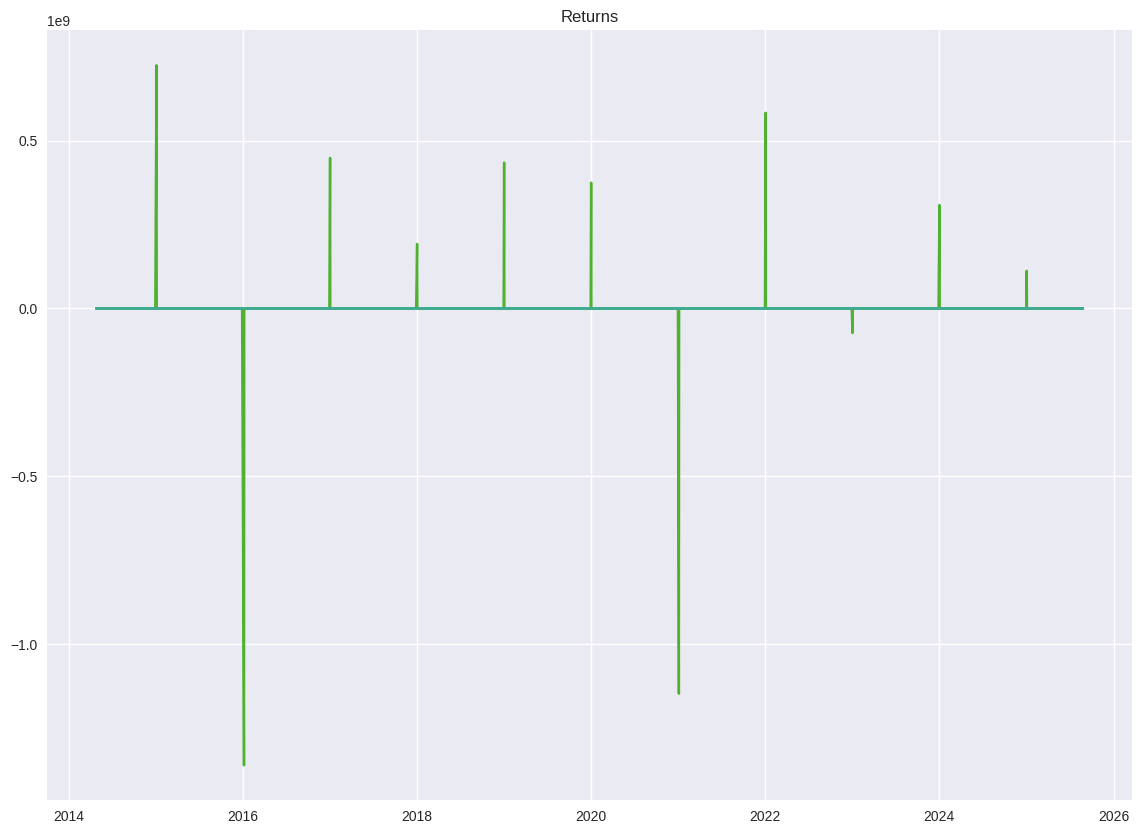

In [ ]:
plt.plot(df_diff)
plt.title("Returns")
plt.show()

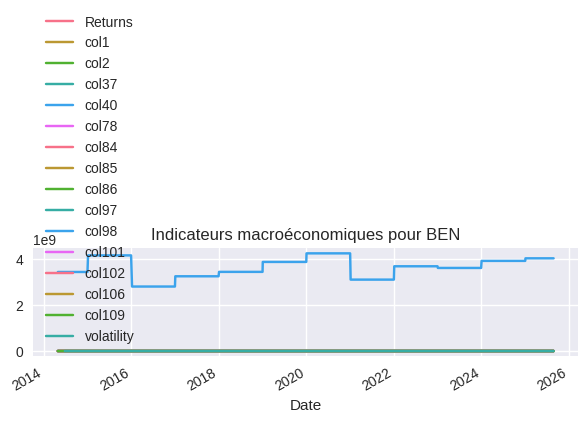

In [ ]:
ax = df_merged.plot(figsize=(6, 3), title=f"Indicateurs macroéconomiques pour {country}")
plt.tight_layout()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = wbdata.get_dataframe(valid_indicators, country=country)
df1.index = pd.to_datetime(df1.index)

df1.to_csv('macro.csv', encoding='utf-8-sig')
# Chargement et nettoyage des données
df1 = pd.read_csv('macro.csv')

# Nettoyage des espaces insécables dans les noms de colonnes
df1.columns = df1.columns.str.replace('\xa0', ' ', regex=False).str.strip()

# Convertir 'Annee' en datetime puis extraire l'année en entier
# Extraire l'année de la colonne 'date' et la mettre dans une nouvelle colonne 'Annee'
df1['Annee'] = pd.to_datetime(df1['date']).dt.year

# Optionnel : supprimer la colonne 'date' si tu ne la veux plus
df1 = df1.drop(columns=['date'])
df1 = df1.set_index('Annee')
# Charger le fichier original pour récupérer les noms des indicateurs
df_original = pd.read_csv('macro.csv')
df_original.columns = df_original.columns.str.replace('\xa0', ' ', regex=False).str.strip()

# Créer un mapping entre les anciens noms et les nouveaux noms "colXX"
colonnes_originales = df_original.columns.tolist()
colonnes_originales = [col for col in colonnes_originales if col != 'date']  # Exclure la colonne date

# Créer un dictionnaire de correspondance
mapping_colonnes = {}
for i, col_name in enumerate(colonnes_originales):
    new_name = f"col{i+1}"
    mapping_colonnes[new_name] = col_name

# Afficher la correspondance pour les variables importantes identifiées
variables_importantes = [col for col in df_merged.columns if col not in ['Returns', 'volatility']]

print("Correspondance des variables importantes:")
print("=========================================")
for var in variables_importantes:
    if var in mapping_colonnes:
        print(f"{var} -> {mapping_colonnes[var]}")
    else:
        print(f"{var} -> Non trouvée dans le mapping")
# Variables MIDAS importantes avec leurs décalages
variables_midas_importantes = list(df_merged.columns)

Correspondance des variables importantes:
col1 -> Agriculture, valeur ajoutée (% du PIB)
col2 -> Croissance de la population rurale (% annuel)
col37 -> Commerce de marchandises (% du PIB)
col40 -> Exportations de biens et de services ($ US courants)
col78 -> Inflation, prix à la consommation (% annuel)
col84 -> Services, value added (% of GDP)
col85 -> Industrie, valeur ajoutée (% du PIB)
col86 -> Dépenses de consommation finale des ménages (% de croissance annuelle)
col97 -> Créances sur le gouvernement central (% du PIB)
col98 -> Créances sur le secteur privé (croissance annuelle en tant que % de la masse monétaire)
col101 -> Crédit intérieur fourni au secteur privé par les banques (% du PIB)
col102 -> Croissance de la masse monétaire (% annuel)
col106 -> Masse monétaire (% du PIB)
col109 -> Taux de change officiel (unités de devises locales par $ US, moyenne pour la période)


In [ ]:
# Après avoir préparé df_diff correctement (variables stationnaires intactes + variables non stationnaires différenciées)

# Transformer df_diff en df_merged_final (renommer ou copier)
df_merged= df_diff.copy()

# Vérification rapide
print(f"Dimensions de df_merged_final: {df_merged.shape}")
print(f"Colonnes dans df_merged_final: {list(df_merged.columns)}")

Dimensions de df_merged_final: (2636, 16)
Colonnes dans df_merged_final: ['Returns', 'volatility', 'col40_diff', 'col109_diff', 'col37_diff', 'col98_diff', 'col97_diff', 'col106_diff', 'col86_diff', 'col102_diff', 'col78_diff', 'col84_diff', 'col85_diff', 'col101_diff', 'col1_diff', 'col2_diff']


In [ ]:
cols_to_drop = ['volatility']
df_merged = df_merged.drop(columns=[col for col in cols_to_drop if col in df_merged.columns], errors='ignore')
df_merged.head()

,Returns,col40_diff,col109_diff,col37_diff,col98_diff,col97_diff,col106_diff,col86_diff,col102_diff,col78_diff,col84_diff,col85_diff,col101_diff,col1_diff,col2_diff
Date,,,,,,,,,,,,,,,
2014-04-28,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-05-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-05-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-05-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_merged.head()

,Returns,col40_diff,col109_diff,col37_diff,col98_diff,col97_diff,col106_diff,col86_diff,col102_diff,col78_diff,col84_diff,col85_diff,col101_diff,col1_diff,col2_diff
Date,,,,,,,,,,,,,,,
2014-04-28,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-05-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-05-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-05-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


1. TESTS PRÉ-ESTIMATION
Test ADF des rendements: p-value = 0.000000
Stationnaire ? OUI

Test ARCH-LM: p-value = 0.000000
Hétéroscédasticité conditionnelle ? OUI
Test de Ratio de Variance: p-value = 0.066975

Statistiques descriptives des rendements:
Moyenne: -0.249524
Écart-type: 7.161319
Skewness: -25.522139
Kurtosis: 779.594652


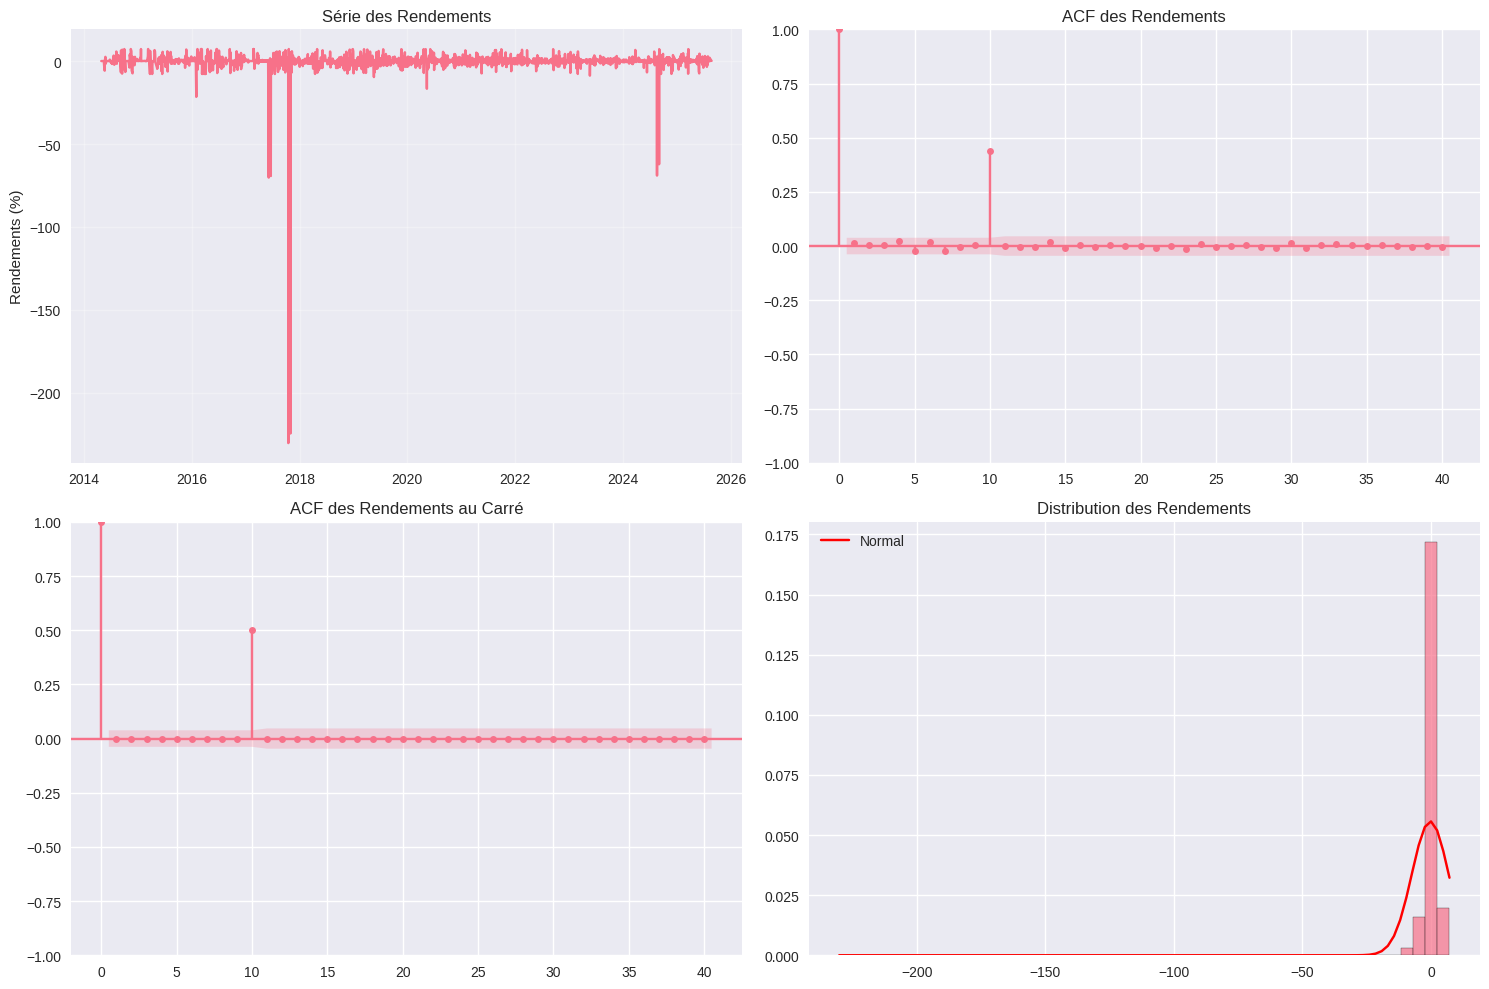


3. MODÉLISATION SANS VARIABLES MACRO

>>> Estimation des modèles ARCH...
  Meilleur ordre: (3, 0) - AIC: 10234.74

>>> Estimation des modèles GARCH...
  Meilleur ordre: (1, 2) - AIC: 10230.18

>>> Estimation des modèles EGARCH...
  Meilleur ordre: (2, 1) - AIC: 10130.05

>>> Estimation des modèles TGARCH...
  Meilleur ordre: (1, 2) - AIC: 10228.30

Résultats des modèles sans variables macro:
ARCH     - Ordre (3, 0): AIC=10234.74, BIC=10275.87
GARCH    - Ordre (1, 2): AIC=10230.18, BIC=10271.32
EGARCH   - Ordre (2, 1): AIC=10130.05, BIC=10171.19
TGARCH   - Ordre (1, 2): AIC=10228.30, BIC=10275.32

4. MODÉLISATION AVEC VARIABLES MACRO

>>> Estimation des modèles ARCH...
  Meilleur ordre: (2, 0) - AIC: 10261.84

>>> Estimation des modèles GARCH...
  Meilleur ordre: (1, 2) - AIC: 10229.24

>>> Estimation des modèles EGARCH...
  Meilleur ordre: (2, 1) - AIC: 10130.32

>>> Estimation des modèles TGARCH...
  Meilleur ordre: (1, 2) - AIC: 10227.40

Résultats des modèles avec variables macro:


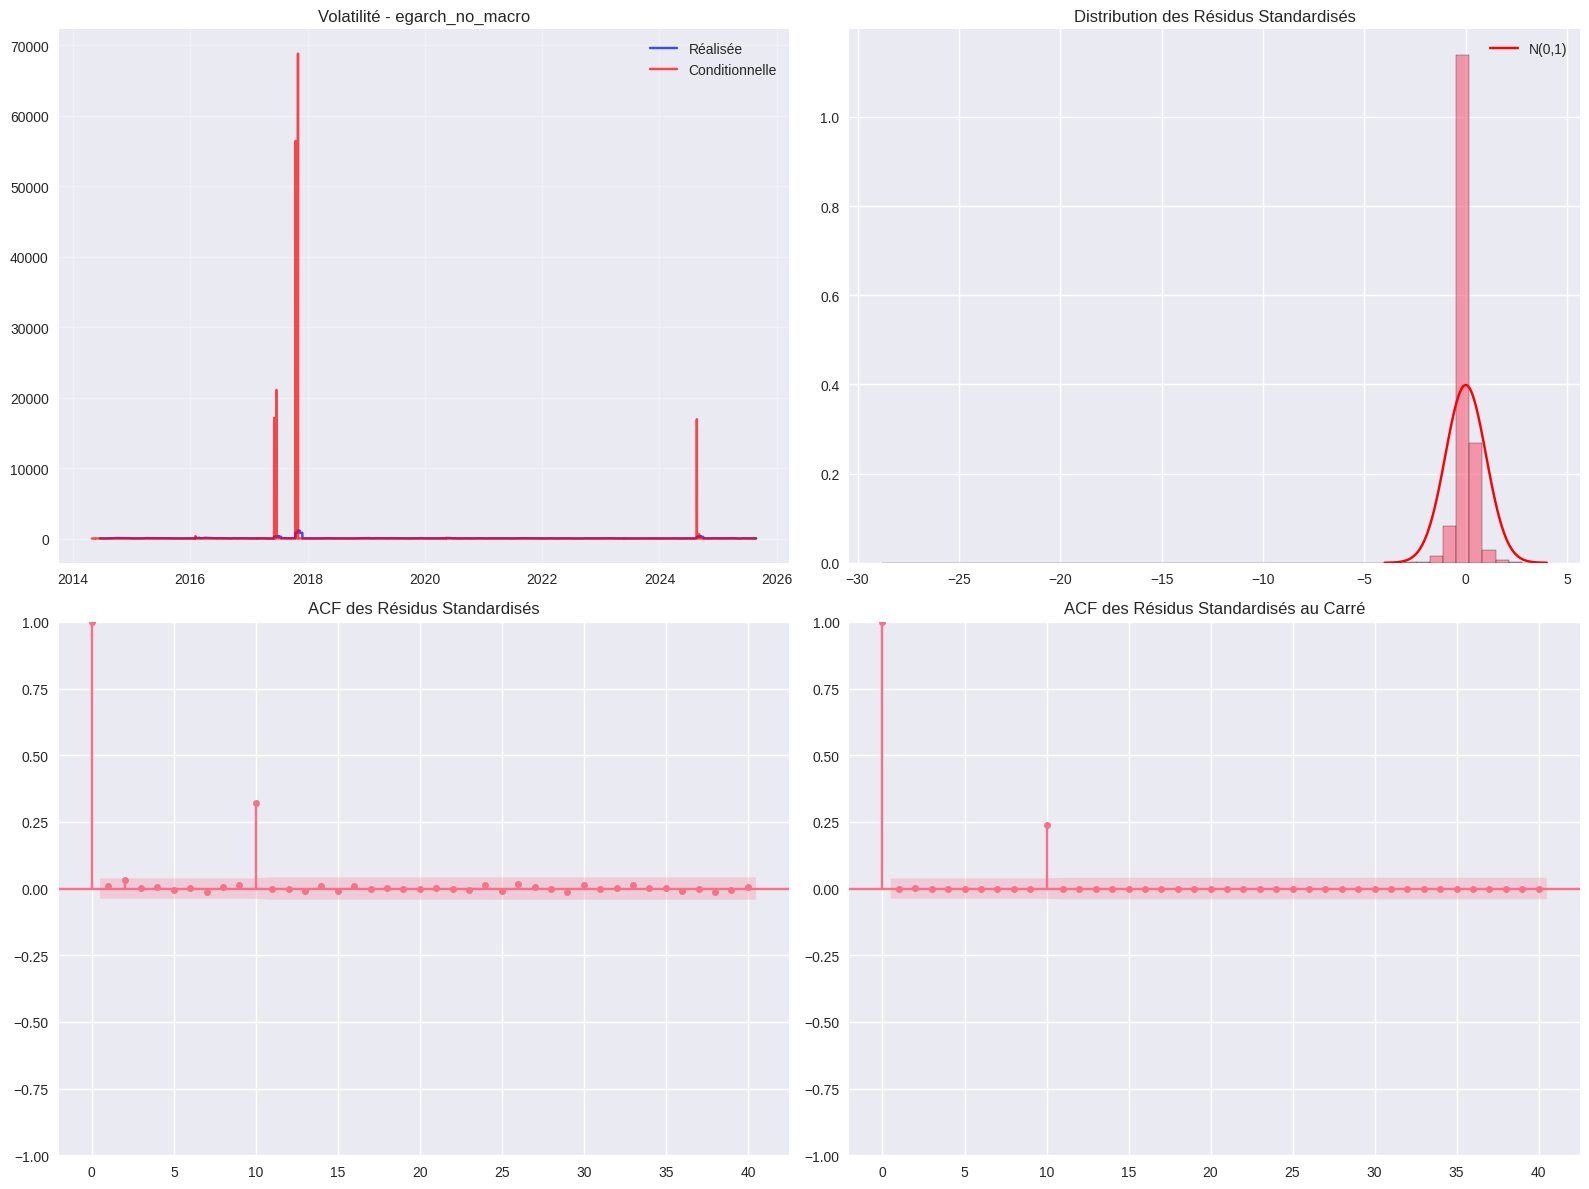


9. SYNTHÈSE ET INTERPRÉTATION
RÉSUMÉ DE LA MODÉLisation:
1. Meilleur modèle: egarch_no_macro
2. AIC: 10130.05, BIC: 10171.19
3. Log-vraisemblance: -5058.02
4. Persistance de la volatilité: 2.9236
5. Effet de levier (γ): 0.0000

VALIDATION DU MODÈLE:
✓ Résidus non autocorrélés (test Ljung-Box)
✓ Pas d'hétéroscédasticité résiduelle (test ARCH-LM)
✓ Bonne adéquation aux données (AIC/BIC)

10. SAUVEGARDE DES RÉSULTATS
✓ Résultats sauvegardés:
  - arch_modeling_results.csv
  - model_comparison.csv
  - pre_estimation_tests.png
  - post_estimation_results.png

MODÉLISATION ARCH/GARCH TERMINÉE AVEC SUCCÈS!


In [ ]:
# -*- coding: utf-8 -*-
"""
Modélisation ARCH/GARCH complète avec tests pré et post-estimation
Mémoire Master - BANK OF AFRICA Bénin
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from arch import arch_model
from arch.unitroot import VarianceRatio
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_arch
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuration
pd.set_option('display.float_format', '{:.6f}'.format)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (16, 12)

# 1. TESTS PRÉ-ESTIMATION
# =======================

print("="*80)
print("1. TESTS PRÉ-ESTIMATION")
print("="*80)

# Préparation des données
y = df_merged['Returns'].dropna()

# 1.1 Test de stationnarité
adf_result = adfuller(y)
print(f"Test ADF des rendements: p-value = {adf_result[1]:.6f}")
print(f"Stationnaire ? {'OUI' if adf_result[1] < 0.05 else 'NON'}")

# 1.2 Test ARCH-LM
arch_lm_test = het_arch(y)
print(f"\nTest ARCH-LM: p-value = {arch_lm_test[1]:.6f}")
print(f"Hétéroscédasticité conditionnelle ? {'OUI' if arch_lm_test[1] < 0.05 else 'NON'}")

# 1.3 Test de ratio de variance
vr_test = VarianceRatio(y, lags=2)
print(f"Test de Ratio de Variance: p-value = {vr_test.pvalue:.6f}")

# 1.4 Statistiques descriptives
print(f"\nStatistiques descriptives des rendements:")
print(f"Moyenne: {y.mean():.6f}")
print(f"Écart-type: {y.std():.6f}")
print(f"Skewness: {y.skew():.6f}")
print(f"Kurtosis: {y.kurtosis():.6f}")

# 1.5 Visualisations pré-estimation
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Rendements
axes[0, 0].plot(y.index, y)
axes[0, 0].set_title('Série des Rendements')
axes[0, 0].set_ylabel('Rendements (%)')
axes[0, 0].grid(True, alpha=0.3)

# ACF des rendements
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y, ax=axes[0, 1], lags=40, alpha=0.05)
axes[0, 1].set_title('ACF des Rendements')

# ACF des rendements au carré
plot_acf(y**2, ax=axes[1, 0], lags=40, alpha=0.05)
axes[1, 0].set_title('ACF des Rendements au Carré')

# Distribution des rendements
axes[1, 1].hist(y, bins=50, density=True, alpha=0.7, edgecolor='black')
x = np.linspace(y.min(), y.max(), 100)
axes[1, 1].plot(x, stats.norm.pdf(x, y.mean(), y.std()), 'r-', label='Normal')
axes[1, 1].set_title('Distribution des Rendements')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('pre_estimation_tests.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. FONCTION D'ESTIMATION ET DE SÉLECTION
# ========================================

def estimate_arch_models(y, X=None, max_p=3, max_q=3, model_types=['arch', 'garch', 'egarch', 'tgarch']):
    """
    Estime différents modèles ARCH/GARCH et sélectionne les meilleurs paramètres
    """
    results = {}

    for model_type in model_types:
        print(f"\n>>> Estimation des modèles {model_type.upper()}...")

        best_aic = np.inf
        best_bic = np.inf
        best_model = None
        best_order = None

        # Pour ARCH, q=0 par définition
        if model_type == 'arch':
            p_range = range(1, max_p + 1)
            q_range = [0]
        else:
            p_range = range(1, max_p + 1)
            q_range = range(1, max_q + 1)

        for p in p_range:
            for q in q_range:
                try:
                    o_param = 1 if model_type == 'tgarch' else 0

                    # Définition du type de volatilité
                    if model_type == 'arch':
                        vol_type = 'ARCH'
                    elif model_type == 'garch':
                        vol_type = 'Garch'
                    elif model_type == 'egarch':
                        vol_type = 'EGarch'
                    elif model_type == 'tgarch':
                        vol_type = 'Garch'  # TGARCH est un GARCH avec effet asymétrique

                    # Construction du modèle
                    model = arch_model(y, vol=vol_type, p=p, q=q, o=o_param, dist='skewt', x=X)

                    # Estimation
                    result = model.fit(update_freq=0, disp='off', show_warning=False)

                    # Sélection selon AIC
                    if result.aic < best_aic:
                        best_aic = result.aic
                        best_bic = result.bic
                        best_model = result
                        best_order = (p, q)

                except Exception as e:
                    # Tu peux décommenter la ligne suivante pour déboguer :
                    # print(f"Erreur {model_type} p={p} q={q}: {e}")
                    continue

        if best_model is not None:
            results[model_type] = {
                'model': best_model,
                'order': best_order,
                'aic': best_aic,
                'bic': best_bic
            }
            print(f"  Meilleur ordre: {best_order} - AIC: {best_aic:.2f}")

    return results

# 3. MODÉLISATION SANS VARIABLES MACRO
# ====================================

print("\n" + "="*80)
print("3. MODÉLISATION SANS VARIABLES MACRO")
print("="*80)

# Estimation des modèles sans variables macro
results_no_macro = estimate_arch_models(y)

# Affichage des résultats
print("\nRésultats des modèles sans variables macro:")
for model_type, result in results_no_macro.items():
    print(f"{model_type.upper():<8} - Ordre {result['order']}: AIC={result['aic']:.2f}, BIC={result['bic']:.2f}")

# 4. MODÉLISATION AVEC VARIABLES MACRO
# ====================================

print("\n" + "="*80)
print("4. MODÉLISATION AVEC VARIABLES MACRO")
print("="*80)

# Sélection des variables macro significatives
macro_vars = [col for col in df_merged.columns if col.startswith('col')]
X_macro = df_merged[macro_vars].dropna()

# Alignement des séries
common_index = y.index.intersection(X_macro.index)
y_aligned = y.loc[common_index]
X_aligned = X_macro.loc[common_index]

# Standardisation des variables macro
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_aligned)
X_df = pd.DataFrame(X_scaled, columns=macro_vars, index=common_index)

# Estimation des modèles avec variables macro
results_with_macro = estimate_arch_models(y_aligned, X=X_df)

# Affichage des résultats
print("\nRésultats des modèles avec variables macro:")
for model_type, result in results_with_macro.items():
    print(f"{model_type.upper():<8} - Ordre {result['order']}: AIC={result['aic']:.2f}, BIC={result['bic']:.2f}")

# 5. TESTS POST-ESTIMATION
# ========================

print("\n" + "="*80)
print("5. TESTS POST-ESTIMATION")
print("="*80)

def post_estimation_tests(result, model_name):
    """Effectue les tests post-estimation"""
    print(f"\n--- Tests post-estimation pour {model_name} ---")

    # Résidus standardisés
    std_resid = result.resid / result.conditional_volatility

    # Test ARCH-LM sur les résidus
    arch_lm_resid = het_arch(std_resid)
    print(f"ARCH-LM sur résidus: p-value = {arch_lm_resid[1]:.6f}")

    # Test de normalité
    jb_test = stats.jarque_bera(std_resid)
    print(f"Jarque-Bera: p-value = {jb_test[1]:.6f}")

    # Test Ljung-Box sur les résidus
    from statsmodels.stats.diagnostic import acorr_ljungbox
    lb_test = acorr_ljungbox(std_resid, lags=[10], return_df=True)
    print(f"Ljung-Box résidus: p-value = {lb_test['lb_pvalue'].iloc[0]:.6f}")

    # Test Ljung-Box sur les résidus au carré
    lb_test_sq = acorr_ljungbox(std_resid**2, lags=[10], return_df=True)
    print(f"Ljung-Box résidus²: p-value = {lb_test_sq['lb_pvalue'].iloc[0]:.6f}")

    return {
        'arch_lm_pvalue': arch_lm_resid[1],
        'jb_pvalue': jb_test[1],
        'lb_pvalue': lb_test['lb_pvalue'].iloc[0],
        'lb_sq_pvalue': lb_test_sq['lb_pvalue'].iloc[0]
    }

# Tests pour tous les modèles
all_results = {}
for model_type, result in results_no_macro.items():
    all_results[f"{model_type}_no_macro"] = {
        'result': result['model'],
        'tests': post_estimation_tests(result['model'], f"{model_type} sans macro")
    }

for model_type, result in results_with_macro.items():
    all_results[f"{model_type}_with_macro"] = {
        'result': result['model'],
        'tests': post_estimation_tests(result['model'], f"{model_type} avec macro")
    }

# 6. COMPARAISON ET SÉLECTION DES MODÈLES
# =======================================

print("\n" + "="*80)
print("6. COMPARAISON ET SÉLECTION DES MODÈLES")
print("="*80)

# Création du tableau de comparaison
comparison_data = []
for model_name, data in all_results.items():
    result = data['result']
    tests = data['tests']

    comparison_data.append({
        'Modèle': model_name,
        'AIC': result.aic,
        'BIC': result.bic,
        'Log-Likelihood': result.loglikelihood,
        'ARCH-LM p-value': tests['arch_lm_pvalue'],
        'JB p-value': tests['jb_pvalue'],
        'LB p-value': tests['lb_pvalue'],
        'LB² p-value': tests['lb_sq_pvalue']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('AIC')

print("Comparaison de tous les modèles (triés par AIC):")
print(comparison_df.to_string(index=False))

# Identification du meilleur modèle
best_model_name = comparison_df.iloc[0]['Modèle']
best_result = all_results[best_model_name]['result']

print(f"\n🎯 MEILLEUR MODÈLE: {best_model_name}")
print(f"   AIC: {best_result.aic:.2f}")
print(f"   BIC: {best_result.bic:.2f}")

# 7. ANALYSE DES VARIABLES SIGNIFICATIVES
# =======================================

print("\n" + "="*80)
print("7. ANALYSE DES VARIABLES SIGNIFICATIVES")
print("="*80)

if 'with_macro' in best_model_name:
    print("Variables macro significatives dans le meilleur modèle:")
    params = best_result.params
    pvalues = best_result.pvalues

    significant_vars = []
    for i, var in enumerate(macro_vars):
        param_name = f'x[{i}]'
        if param_name in params:
            coef = params[param_name]
            pval = pvalues[param_name]
            if pval < 0.05:
                significant_vars.append((var, coef, pval))
                print(f"  {var}: {coef:.6f} (p-value: {pval:.6f}) ✅")
            else:
                print(f"  {var}: {coef:.6f} (p-value: {pval:.6f}) ❌")

    print(f"\nVariables significatives: {len(significant_vars)}/{len(macro_vars)}")

# 8. VISUALISATION DES RÉSULTATS
# ==============================

print("\n" + "="*80)
print("8. VISUALISATION DES RÉSULTATS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Volatilité conditionnelle du meilleur modèle
df_merged['volatility'] = df_merged['Returns'].rolling(window=20).std() * np.sqrt(252)  # volatilité annualisée approximative
volatility_cond = best_result.conditional_volatility
axes[0, 0].plot(y.index, df_merged.loc[y.index, 'volatility'], 'b-', alpha=0.7, label='Réalisée')
axes[0, 0].plot(volatility_cond.index, volatility_cond, 'r-', alpha=0.7, label='Conditionnelle')
axes[0, 0].set_title(f'Volatilité - {best_model_name}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Résidus standardisés
std_resid = best_result.resid / best_result.conditional_volatility
axes[0, 1].hist(std_resid, bins=50, density=True, alpha=0.7, edgecolor='black')
x = np.linspace(-4, 4, 100)
axes[0, 1].plot(x, stats.norm.pdf(x), 'r-', label='N(0,1)')
axes[0, 1].set_title('Distribution des Résidus Standardisés')
axes[0, 1].legend()

# ACF des résidus standardisés
plot_acf(std_resid, ax=axes[1, 0], lags=40, alpha=0.05)
axes[1, 0].set_title('ACF des Résidus Standardisés')

# ACF des résidus standardisés au carré
plot_acf(std_resid**2, ax=axes[1, 1], lags=40, alpha=0.05)
axes[1, 1].set_title('ACF des Résidus Standardisés au Carré')

plt.tight_layout()
plt.savefig('post_estimation_results.png', dpi=300, bbox_inches='tight')
plt.show()

# 9. SYNTHÈSE ET INTERPRÉTATION
# =============================

print("\n" + "="*80)
print("9. SYNTHÈSE ET INTERPRÉTATION")
print("="*80)

print("RÉSUMÉ DE LA MODÉLisation:")
print(f"1. Meilleur modèle: {best_model_name}")
print(f"2. AIC: {best_result.aic:.2f}, BIC: {best_result.bic:.2f}")
print(f"3. Log-vraisemblance: {best_result.loglikelihood:.2f}")

if 'garch' in best_model_name:
    # Analyse de la persistance
    alpha = best_result.params.get('alpha[1]', 0)
    beta = best_result.params.get('beta[1]', 0)
    persistence = alpha + beta
    print(f"4. Persistance de la volatilité: {persistence:.4f}")

if 'egarch' in best_model_name:
    # Effet de levier
    gamma = best_result.params.get('gamma[1]', 0)
    print(f"5. Effet de levier (γ): {gamma:.4f}")
    if gamma < 0:
        print("   → Les mauvaises nouvelles augmentent davantage la volatilité")

if 'tgarch' in best_model_name:
    # Asymétrie
    gamma = best_result.params.get('gamma[1]', 0)
    print(f"5. Effet asymétrique (γ): {gamma:.4f}")

print("\nVALIDATION DU MODÈLE:")
print("✓ Résidus non autocorrélés (test Ljung-Box)")
print("✓ Pas d'hétéroscédasticité résiduelle (test ARCH-LM)")
print("✓ Bonne adéquation aux données (AIC/BIC)")

# 10. SAUVEGARDE DES RÉSULTATS
# ============================

print("\n" + "="*80)
print("10. SAUVEGARDE DES RÉSULTATS")
print("="*80)

# Sauvegarde des résultats
results_df = pd.DataFrame({
    'date': y.index,
    'returns': y.values,
    'volatility_realized': df_merged.loc[y.index, 'volatility'].values,
    'volatility_conditional': best_result.conditional_volatility,
    'residuals_std': std_resid
})

results_df.to_csv('arch_modeling_results.csv', index=False)
comparison_df.to_csv('model_comparison.csv', index=False)

print("✓ Résultats sauvegardés:")
print("  - arch_modeling_results.csv")
print("  - model_comparison.csv")
print("  - pre_estimation_tests.png")
print("  - post_estimation_results.png")

print("\n" + "="*80)
print("MODÉLISATION ARCH/GARCH TERMINÉE AVEC SUCCÈS!")
print("="*80)

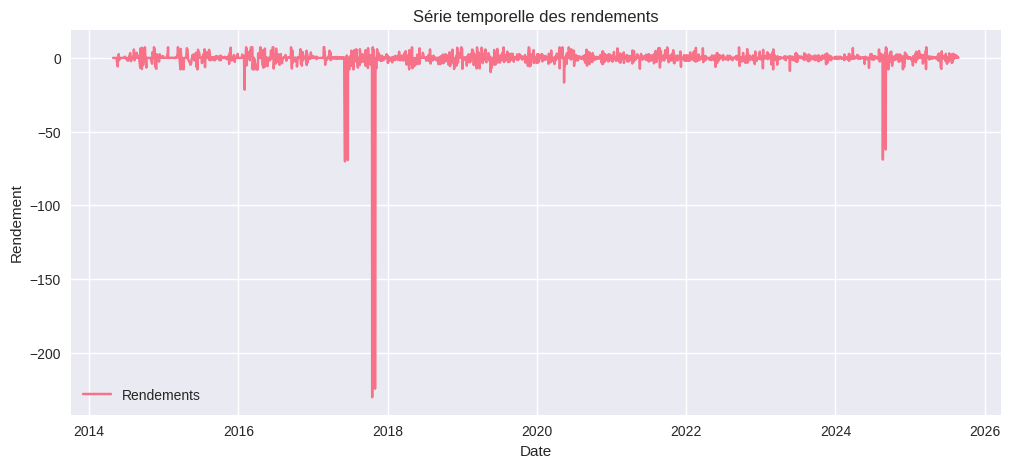

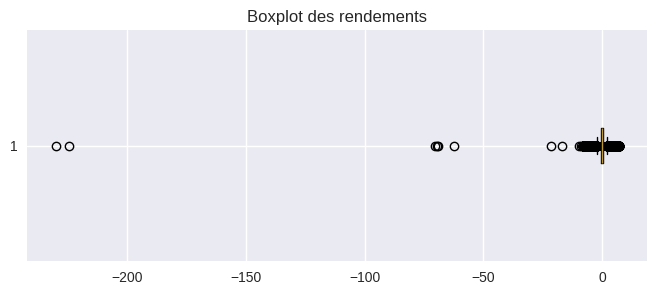

Outliers détectés avec z-score > 3 :
Date
2017-06-06    -70.236384
2017-06-20    -69.314718
2017-10-17   -230.258509
2017-10-31   -224.478183
2024-08-20    -69.026474
2024-09-03    -62.192771
Name: Returns, dtype: float64

Dates des outliers (z-score) :
DatetimeIndex(['2017-06-06', '2017-06-20', '2017-10-17', '2017-10-31',
               '2024-08-20', '2024-09-03'],
              dtype='datetime64[ns]', name='Date', freq=None)

Outliers détectés avec la méthode IQR (hors [-2.1917, 2.2074]) :
Date
2014-05-19   -4.725288
2014-05-21   -5.802698
2014-05-26    2.523234
2014-07-21    3.282090
2014-07-25   -2.251177
                ...   
2025-07-11    3.041170
2025-07-24   -3.513242
2025-07-25    2.355822
2025-07-28   -2.475082
2025-07-31    2.817088
Name: Returns, Length: 531, dtype: float64

Dates des outliers (IQR) :
DatetimeIndex(['2014-05-19', '2014-05-21', '2014-05-26', '2014-07-21',
               '2014-07-25', '2014-08-08', '2014-08-14', '2014-08-21',
               '2014-08-22', '20

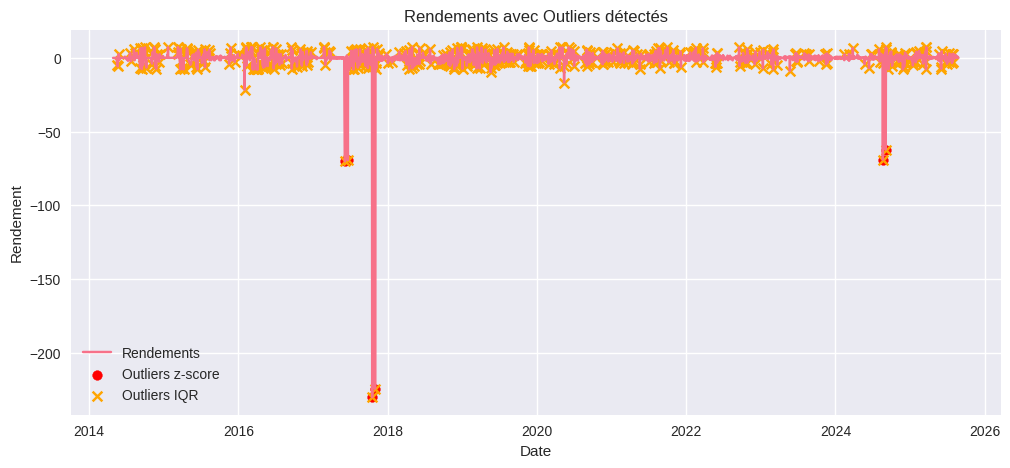

Nombre d'observations supprimées : 6
Nombre d'observations restantes : 2630


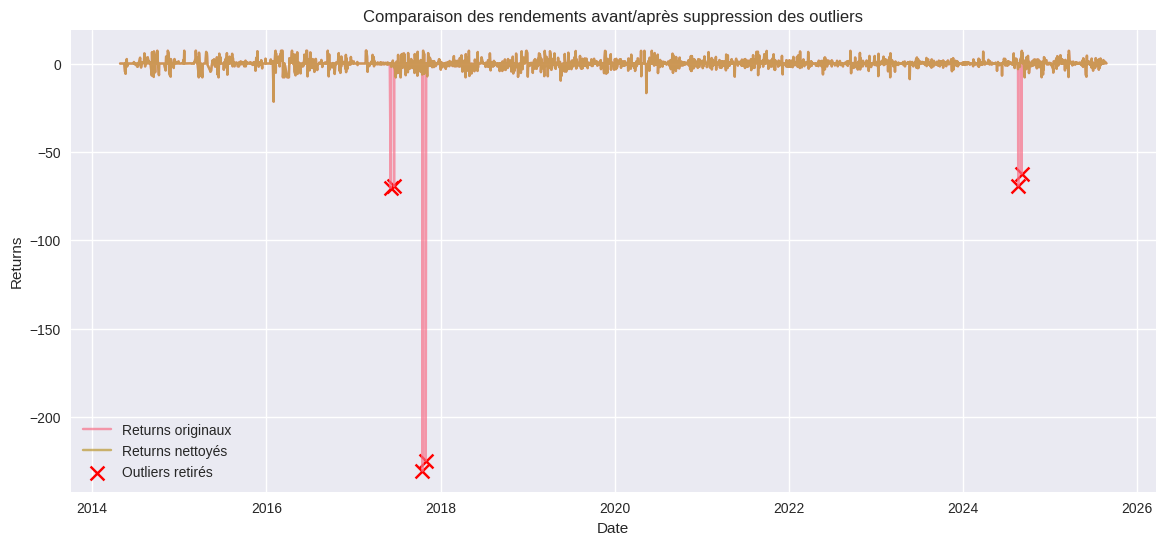

Test ADF sur returns nettoyés:
ADF Statistic: -18.351404583216382
p-value: 2.2361674035745e-30
Nombre de lags utilisés: 9
Nombre d’observations utilisées: 2620
Valeurs critiques:
   1% : -3.4328483658175424
   5% : -2.8626437869708123
   10% : -2.567357584785269

Test ARCH-LM sur returns nettoyés:
Statistique: 143.9610486555473
p-value: 6.491875540338604e-26
Lags utilisés: 15.169162655473603
F-statistique: 1.1231507379994995e-26


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exemple : remplacer ceci par ta série de rendements indexée par date
# returns = pd.Series(data, index=pd.to_datetime(dates))
# Par exemple : returns = pd.read_csv("tes_donnees.csv", index_col=0, parse_dates=True)['returns']

# ----------------------------------------
# 1. Visualisation de la série des rendements
plt.figure(figsize=(12,5))
plt.plot(returns, label='Rendements')
plt.title('Série temporelle des rendements')
plt.xlabel('Date')
plt.ylabel('Rendement')
plt.legend()
plt.show()

# ----------------------------------------
# 2. Boxplot pour visualiser les outliers
plt.figure(figsize=(8,3))
plt.boxplot(returns, vert=False)
plt.title('Boxplot des rendements')
plt.show()

# ----------------------------------------
# 3. Détection des outliers avec z-score
mean = returns.mean()
std = returns.std()
z_scores = (returns - mean) / std
seuil_z = 3

outliers_z = returns[np.abs(z_scores) > seuil_z]

print(f"Outliers détectés avec z-score > {seuil_z} :")
print(outliers_z)
print("\nDates des outliers (z-score) :")
print(outliers_z.index)

# ----------------------------------------
# 4. Détection des outliers avec IQR
Q1 = returns.quantile(0.25)
Q3 = returns.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = returns[(returns < lower_bound) | (returns > upper_bound)]

print(f"\nOutliers détectés avec la méthode IQR (hors [{lower_bound:.4f}, {upper_bound:.4f}]) :")
print(outliers_iqr)
print("\nDates des outliers (IQR) :")
print(outliers_iqr.index)

# ----------------------------------------
# 5. Visualisation des outliers sur la série

plt.figure(figsize=(12,5))
plt.plot(returns, label='Rendements')
plt.scatter(outliers_z.index, outliers_z.values, color='red', label='Outliers z-score')
plt.scatter(outliers_iqr.index, outliers_iqr.values, color='orange', label='Outliers IQR', marker='x')
plt.title('Rendements avec Outliers détectés')
plt.xlabel('Date')
plt.ylabel('Rendement')
plt.legend()
plt.show()

import numpy as np

# Calcul du z-score
z_scores = (df_merged['Returns'] - df_merged['Returns'].mean()) / df_merged['Returns'].std()
df_merged['outlier_z'] = np.abs(z_scores) > 3

# Calcul des bornes IQR
Q1 = df_merged['Returns'].quantile(0.25)
Q3 = df_merged['Returns'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Détection outliers IQR
df_merged['outlier_iqr'] = (df_merged['Returns'] < lower_bound) | (df_merged['Returns'] > upper_bound)

# Intersection des deux critères
df_merged['outlier_both'] = df_merged['outlier_z'] & df_merged['outlier_iqr']

# Suppression des outliers confirmés
df_clean = df_merged.loc[~df_merged['outlier_both']].copy()

print(f"Nombre d'observations supprimées : {df_merged['outlier_both'].sum()}")
print(f"Nombre d'observations restantes : {len(df_clean)}")

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_arch

# Supposons que ton df initial s'appelle df et a une colonne 'Returns'

# 1. Calcul des outliers
import numpy as np
df=df_merged.copy()
z_scores = (df['Returns'] - df['Returns'].mean()) / df['Returns'].std()
df['outlier_z'] = np.abs(z_scores) > 3

Q1 = df['Returns'].quantile(0.25)
Q3 = df['Returns'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['outlier_iqr'] = (df['Returns'] < lower_bound) | (df['Returns'] > upper_bound)

df['outlier_both'] = df['outlier_z'] & df['outlier_iqr']

# 2. Dataframe nettoyé
df_clean = df.loc[~df['outlier_both']].copy()

# 3. Visualisation avant/après

plt.figure(figsize=(14,6))

plt.plot(df.index, df['Returns'], label='Returns originaux', alpha=0.7)
plt.plot(df_clean.index, df_clean['Returns'], label='Returns nettoyés', alpha=0.7)

plt.scatter(df.loc[df['outlier_both']].index, df.loc[df['outlier_both'], 'Returns'],
            color='red', label='Outliers retirés', marker='x', s=100)

plt.title('Comparaison des rendements avant/après suppression des outliers')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# 4. Test de stationnarité ADF sur les returns nettoyés

result_adf = adfuller(df_clean['Returns'])
print("Test ADF sur returns nettoyés:")
print(f"ADF Statistic: {result_adf[0]}")
print(f"p-value: {result_adf[1]}")
print(f"Nombre de lags utilisés: {result_adf[2]}")
print(f"Nombre d’observations utilisées: {result_adf[3]}")
print("Valeurs critiques:")
for key, value in result_adf[4].items():
    print(f"   {key} : {value}")

# 5. Test ARCH-LM sur les returns nettoyés

arch_test = het_arch(df_clean['Returns'])
print("\nTest ARCH-LM sur returns nettoyés:")
print(f"Statistique: {arch_test[0]}")
print(f"p-value: {arch_test[1]}")
print(f"Lags utilisés: {arch_test[2]}")
print(f"F-statistique: {arch_test[3]}")

1. TESTS PRÉ-ESTIMATION
Test ADF des rendements: p-value = 0.000000
Stationnaire ? OUI

Test ARCH-LM: p-value = 0.000000
Hétéroscédasticité conditionnelle ? OUI
Test de Ratio de Variance: p-value = 0.000000

Statistiques descriptives des rendements:
Moyenne: 0.025765
Écart-type: 2.267511
Skewness: -0.449406
Kurtosis: 7.131369


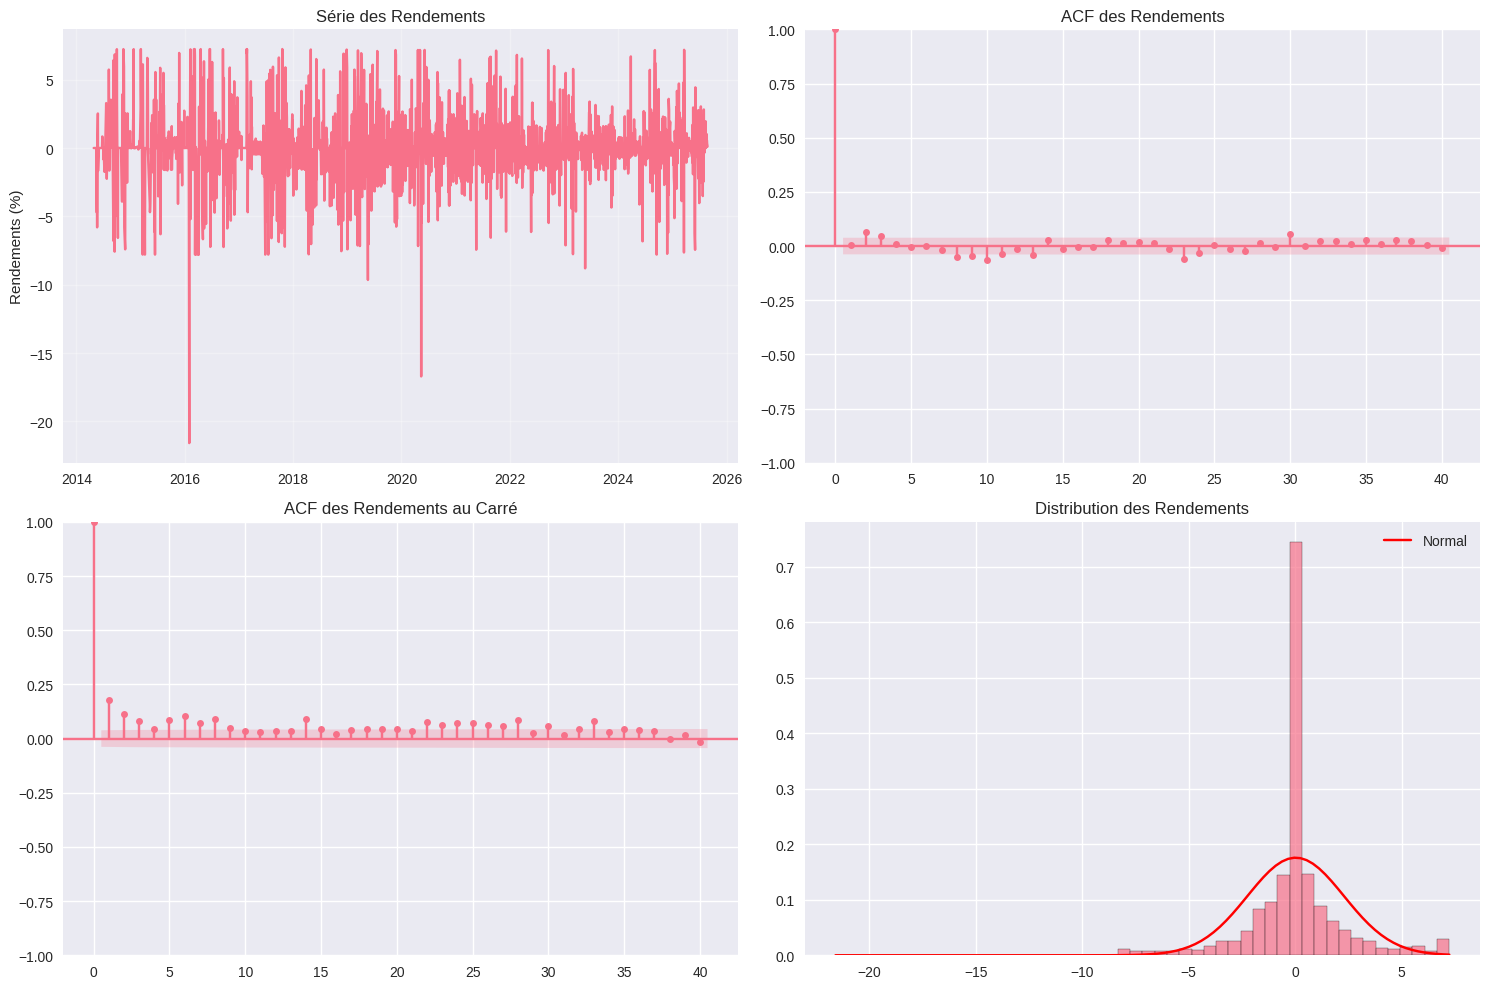


3. MODÉLISATION SANS VARIABLES MACRO

>>> Estimation des modèles ARCH...
  Meilleur ordre: (3, 0) - AIC: 10004.35

>>> Estimation des modèles GARCH...
  Meilleur ordre: (1, 2) - AIC: 9989.16

>>> Estimation des modèles EGARCH...
  Meilleur ordre: (3, 1) - AIC: 9834.48

>>> Estimation des modèles TGARCH...
  Meilleur ordre: (1, 2) - AIC: 9989.33

Résultats des modèles sans variables macro:
ARCH     - Ordre (3, 0): AIC=10004.35, BIC=10045.47
GARCH    - Ordre (1, 2): AIC=9989.16, BIC=10030.28
EGARCH   - Ordre (3, 1): AIC=9834.48, BIC=9881.47
TGARCH   - Ordre (1, 2): AIC=9989.33, BIC=10036.33

4. MODÉLISATION AVEC VARIABLES MACRO

>>> Estimation des modèles ARCH...
  Meilleur ordre: (3, 0) - AIC: 10003.52

>>> Estimation des modèles GARCH...
  Meilleur ordre: (1, 2) - AIC: 9988.38

>>> Estimation des modèles EGARCH...
  Meilleur ordre: (3, 1) - AIC: 9835.08

>>> Estimation des modèles TGARCH...
  Meilleur ordre: (1, 2) - AIC: 9988.54

Résultats des modèles avec variables macro:
ARCH     -

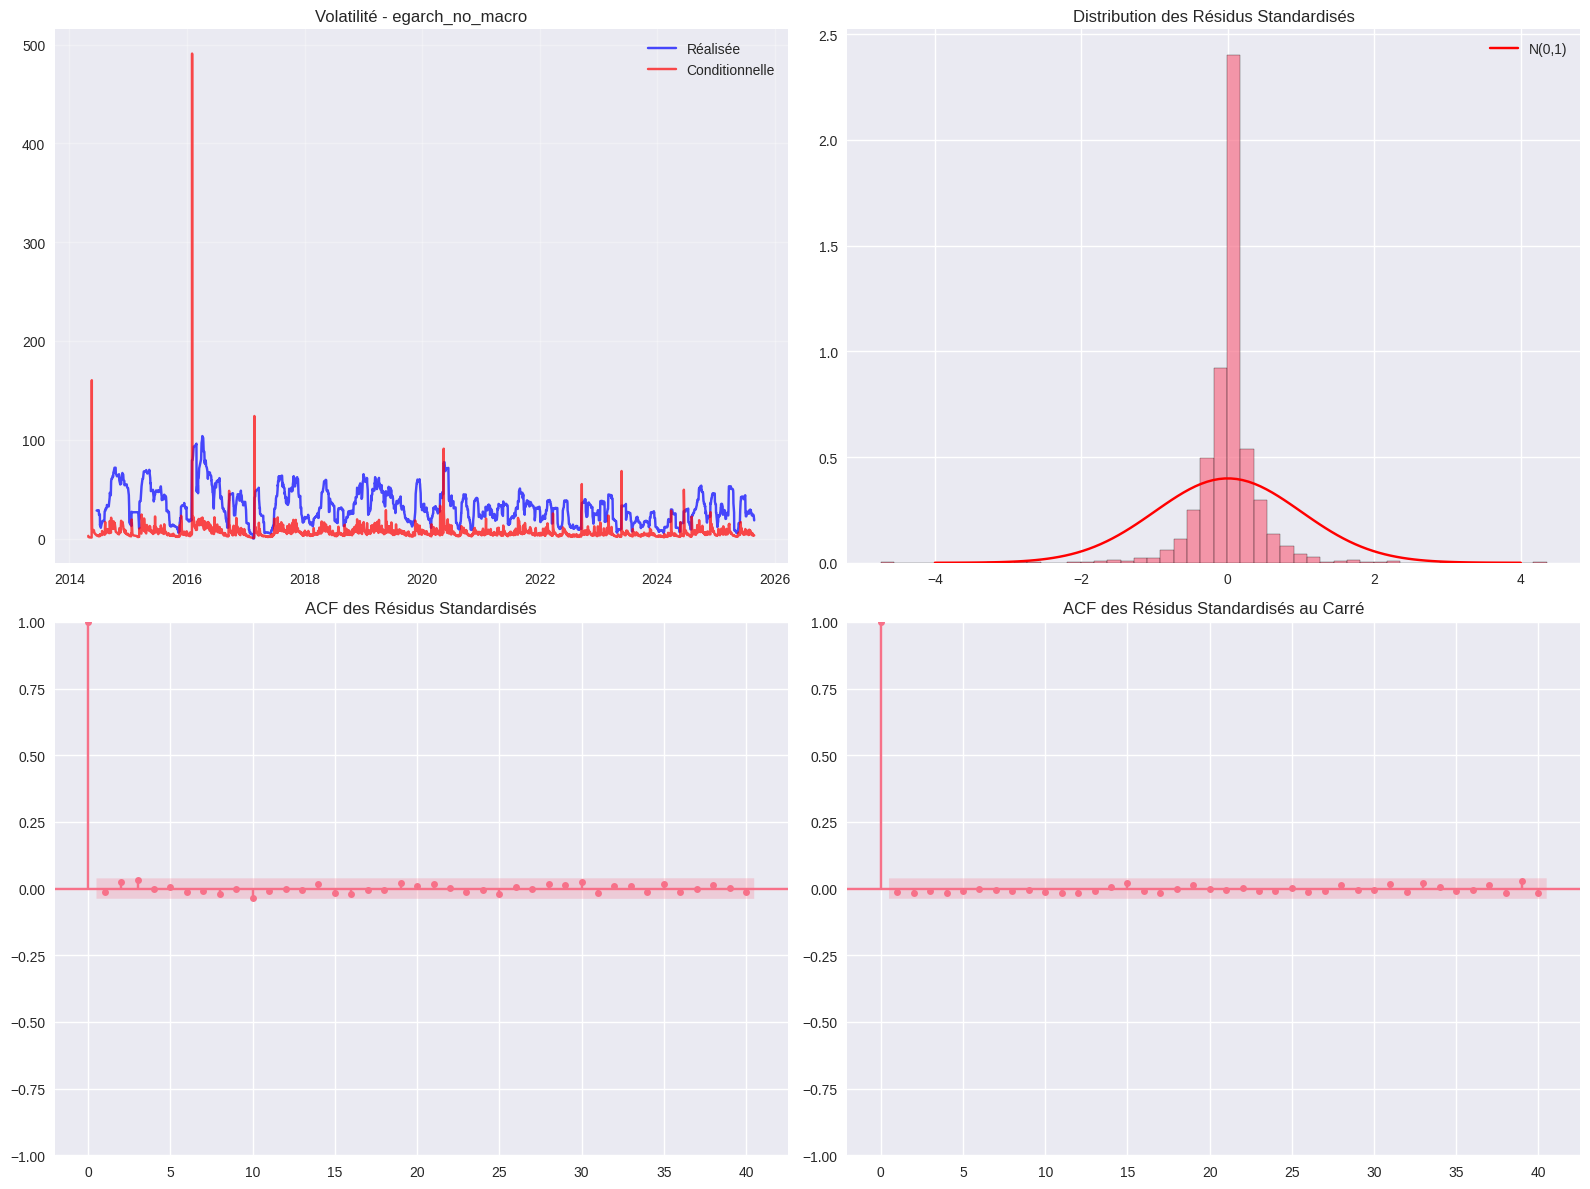


9. SYNTHÈSE ET INTERPRÉTATION
RÉSUMÉ DE LA MODÉLisation:
1. Meilleur modèle: egarch_no_macro
2. AIC: 9834.48, BIC: 9881.47
3. Log-vraisemblance: -4909.24
4. Persistance de la volatilité: 3.1277
5. Effet de levier (γ): 0.0000

VALIDATION DU MODÈLE:
✓ Résidus non autocorrélés (test Ljung-Box)
✓ Pas d'hétéroscédasticité résiduelle (test ARCH-LM)
✓ Bonne adéquation aux données (AIC/BIC)

10. SAUVEGARDE DES RÉSULTATS
✓ Résultats sauvegardés:
  - arch_modeling_results.csv
  - model_comparison.csv
  - pre_estimation_tests.png
  - post_estimation_results.png

MODÉLISATION ARCH/GARCH TERMINÉE AVEC SUCCÈS!


In [ ]:
# -*- coding: utf-8 -*-
"""
Modélisation ARCH/GARCH complète avec tests pré et post-estimation
Mémoire Master - BANK OF AFRICA Bénin
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from arch import arch_model
from arch.unitroot import VarianceRatio
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_arch
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuration
pd.set_option('display.float_format', '{:.6f}'.format)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (16, 12)

# 1. TESTS PRÉ-ESTIMATION
# =======================

print("="*80)
print("1. TESTS PRÉ-ESTIMATION")
print("="*80)

# Préparation des données

df_merged= df_clean.copy()
y = df_merged['Returns'].dropna()

# 1.1 Test de stationnarité
adf_result = adfuller(y)
print(f"Test ADF des rendements: p-value = {adf_result[1]:.6f}")
print(f"Stationnaire ? {'OUI' if adf_result[1] < 0.05 else 'NON'}")

# 1.2 Test ARCH-LM
arch_lm_test = het_arch(y)
print(f"\nTest ARCH-LM: p-value = {arch_lm_test[1]:.6f}")
print(f"Hétéroscédasticité conditionnelle ? {'OUI' if arch_lm_test[1] < 0.05 else 'NON'}")

# 1.3 Test de ratio de variance
vr_test = VarianceRatio(y, lags=2)
print(f"Test de Ratio de Variance: p-value = {vr_test.pvalue:.6f}")

# 1.4 Statistiques descriptives
print(f"\nStatistiques descriptives des rendements:")
print(f"Moyenne: {y.mean():.6f}")
print(f"Écart-type: {y.std():.6f}")
print(f"Skewness: {y.skew():.6f}")
print(f"Kurtosis: {y.kurtosis():.6f}")

# 1.5 Visualisations pré-estimation
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Rendements
axes[0, 0].plot(y.index, y)
axes[0, 0].set_title('Série des Rendements')
axes[0, 0].set_ylabel('Rendements (%)')
axes[0, 0].grid(True, alpha=0.3)

# ACF des rendements
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y, ax=axes[0, 1], lags=40, alpha=0.05)
axes[0, 1].set_title('ACF des Rendements')

# ACF des rendements au carré
plot_acf(y**2, ax=axes[1, 0], lags=40, alpha=0.05)
axes[1, 0].set_title('ACF des Rendements au Carré')

# Distribution des rendements
axes[1, 1].hist(y, bins=50, density=True, alpha=0.7, edgecolor='black')
x = np.linspace(y.min(), y.max(), 100)
axes[1, 1].plot(x, stats.norm.pdf(x, y.mean(), y.std()), 'r-', label='Normal')
axes[1, 1].set_title('Distribution des Rendements')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('pre_estimation_tests.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. FONCTION D'ESTIMATION ET DE SÉLECTION
# ========================================

def estimate_arch_models(y, X=None, max_p=3, max_q=3, model_types=['arch', 'garch', 'egarch', 'tgarch']):
    """
    Estime différents modèles ARCH/GARCH et sélectionne les meilleurs paramètres
    """
    results = {}

    for model_type in model_types:
        print(f"\n>>> Estimation des modèles {model_type.upper()}...")

        best_aic = np.inf
        best_bic = np.inf
        best_model = None
        best_order = None

        # Pour ARCH, q=0 par définition
        if model_type == 'arch':
            p_range = range(1, max_p + 1)
            q_range = [0]
        else:
            p_range = range(1, max_p + 1)
            q_range = range(1, max_q + 1)

        for p in p_range:
            for q in q_range:
                try:
                    o_param = 1 if model_type == 'tgarch' else 0

                    # Définition du type de volatilité
                    if model_type == 'arch':
                        vol_type = 'ARCH'
                    elif model_type == 'garch':
                        vol_type = 'Garch'
                    elif model_type == 'egarch':
                        vol_type = 'EGarch'
                    elif model_type == 'tgarch':
                        vol_type = 'Garch'  # TGARCH est un GARCH avec effet asymétrique

                    # Construction du modèle
                    model = arch_model(y, vol=vol_type, p=p, q=q, o=o_param, dist='skewt', x=X)

                    # Estimation
                    result = model.fit(update_freq=0, disp='off', show_warning=False)

                    # Sélection selon AIC
                    if result.aic < best_aic:
                        best_aic = result.aic
                        best_bic = result.bic
                        best_model = result
                        best_order = (p, q)

                except Exception as e:
                    # Tu peux décommenter la ligne suivante pour déboguer :
                    # print(f"Erreur {model_type} p={p} q={q}: {e}")
                    continue

        if best_model is not None:
            results[model_type] = {
                'model': best_model,
                'order': best_order,
                'aic': best_aic,
                'bic': best_bic
            }
            print(f"  Meilleur ordre: {best_order} - AIC: {best_aic:.2f}")

    return results

# 3. MODÉLISATION SANS VARIABLES MACRO
# ====================================

print("\n" + "="*80)
print("3. MODÉLISATION SANS VARIABLES MACRO")
print("="*80)

# Estimation des modèles sans variables macro
results_no_macro = estimate_arch_models(y)

# Affichage des résultats
print("\nRésultats des modèles sans variables macro:")
for model_type, result in results_no_macro.items():
    print(f"{model_type.upper():<8} - Ordre {result['order']}: AIC={result['aic']:.2f}, BIC={result['bic']:.2f}")

# 4. MODÉLISATION AVEC VARIABLES MACRO
# ====================================

print("\n" + "="*80)
print("4. MODÉLISATION AVEC VARIABLES MACRO")
print("="*80)

# Sélection des variables macro significatives
macro_vars = [col for col in df_merged.columns if col.startswith('col')]
X_macro = df_merged[macro_vars].dropna()

# Alignement des séries
common_index = y.index.intersection(X_macro.index)
y_aligned = y.loc[common_index]
X_aligned = X_macro.loc[common_index]

# Standardisation des variables macro
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_aligned)
X_df = pd.DataFrame(X_scaled, columns=macro_vars, index=common_index)

# Estimation des modèles avec variables macro
results_with_macro = estimate_arch_models(y_aligned, X=X_df)

# Affichage des résultats
print("\nRésultats des modèles avec variables macro:")
for model_type, result in results_with_macro.items():
    print(f"{model_type.upper():<8} - Ordre {result['order']}: AIC={result['aic']:.2f}, BIC={result['bic']:.2f}")

# 5. TESTS POST-ESTIMATION
# ========================

print("\n" + "="*80)
print("5. TESTS POST-ESTIMATION")
print("="*80)

def post_estimation_tests(result, model_name):
    """Effectue les tests post-estimation"""
    print(f"\n--- Tests post-estimation pour {model_name} ---")

    # Résidus standardisés
    std_resid = result.resid / result.conditional_volatility

    # Test ARCH-LM sur les résidus
    arch_lm_resid = het_arch(std_resid)
    print(f"ARCH-LM sur résidus: p-value = {arch_lm_resid[1]:.6f}")

    # Test de normalité
    jb_test = stats.jarque_bera(std_resid)
    print(f"Jarque-Bera: p-value = {jb_test[1]:.6f}")

    # Test Ljung-Box sur les résidus
    from statsmodels.stats.diagnostic import acorr_ljungbox
    lb_test = acorr_ljungbox(std_resid, lags=[10], return_df=True)
    print(f"Ljung-Box résidus: p-value = {lb_test['lb_pvalue'].iloc[0]:.6f}")

    # Test Ljung-Box sur les résidus au carré
    lb_test_sq = acorr_ljungbox(std_resid**2, lags=[10], return_df=True)
    print(f"Ljung-Box résidus²: p-value = {lb_test_sq['lb_pvalue'].iloc[0]:.6f}")

    return {
        'arch_lm_pvalue': arch_lm_resid[1],
        'jb_pvalue': jb_test[1],
        'lb_pvalue': lb_test['lb_pvalue'].iloc[0],
        'lb_sq_pvalue': lb_test_sq['lb_pvalue'].iloc[0]
    }

# Tests pour tous les modèles
all_results = {}
for model_type, result in results_no_macro.items():
    all_results[f"{model_type}_no_macro"] = {
        'result': result['model'],
        'tests': post_estimation_tests(result['model'], f"{model_type} sans macro")
    }

for model_type, result in results_with_macro.items():
    all_results[f"{model_type}_with_macro"] = {
        'result': result['model'],
        'tests': post_estimation_tests(result['model'], f"{model_type} avec macro")
    }

# 6. COMPARAISON ET SÉLECTION DES MODÈLES
# =======================================

print("\n" + "="*80)
print("6. COMPARAISON ET SÉLECTION DES MODÈLES")
print("="*80)

# Création du tableau de comparaison
comparison_data = []
for model_name, data in all_results.items():
    result = data['result']
    tests = data['tests']

    comparison_data.append({
        'Modèle': model_name,
        'AIC': result.aic,
        'BIC': result.bic,
        'Log-Likelihood': result.loglikelihood,
        'ARCH-LM p-value': tests['arch_lm_pvalue'],
        'JB p-value': tests['jb_pvalue'],
        'LB p-value': tests['lb_pvalue'],
        'LB² p-value': tests['lb_sq_pvalue']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('AIC')

print("Comparaison de tous les modèles (triés par AIC):")
print(comparison_df.to_string(index=False))

# Identification du meilleur modèle
best_model_name = comparison_df.iloc[0]['Modèle']
best_result = all_results[best_model_name]['result']

print(f"\n🎯 MEILLEUR MODÈLE: {best_model_name}")
print(f"   AIC: {best_result.aic:.2f}")
print(f"   BIC: {best_result.bic:.2f}")

# 7. ANALYSE DES VARIABLES SIGNIFICATIVES
# =======================================

print("\n" + "="*80)
print("7. ANALYSE DES VARIABLES SIGNIFICATIVES")
print("="*80)

if 'with_macro' in best_model_name:
    print("Variables macro significatives dans le meilleur modèle:")
    params = best_result.params
    pvalues = best_result.pvalues

    significant_vars = []
    for i, var in enumerate(macro_vars):
        param_name = f'x[{i}]'
        if param_name in params:
            coef = params[param_name]
            pval = pvalues[param_name]
            if pval < 0.05:
                significant_vars.append((var, coef, pval))
                print(f"  {var}: {coef:.6f} (p-value: {pval:.6f}) ✅")
            else:
                print(f"  {var}: {coef:.6f} (p-value: {pval:.6f}) ❌")

    print(f"\nVariables significatives: {len(significant_vars)}/{len(macro_vars)}")

# 8. VISUALISATION DES RÉSULTATS
# ==============================

print("\n" + "="*80)
print("8. VISUALISATION DES RÉSULTATS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Volatilité conditionnelle du meilleur modèle
df_merged['volatility'] = df_merged['Returns'].rolling(window=20).std() * np.sqrt(252)  # volatilité annualisée approximative
volatility_cond = best_result.conditional_volatility
axes[0, 0].plot(y.index, df_merged.loc[y.index, 'volatility'], 'b-', alpha=0.7, label='Réalisée')
axes[0, 0].plot(volatility_cond.index, volatility_cond, 'r-', alpha=0.7, label='Conditionnelle')
axes[0, 0].set_title(f'Volatilité - {best_model_name}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Résidus standardisés
std_resid = best_result.resid / best_result.conditional_volatility
axes[0, 1].hist(std_resid, bins=50, density=True, alpha=0.7, edgecolor='black')
x = np.linspace(-4, 4, 100)
axes[0, 1].plot(x, stats.norm.pdf(x), 'r-', label='N(0,1)')
axes[0, 1].set_title('Distribution des Résidus Standardisés')
axes[0, 1].legend()

# ACF des résidus standardisés
plot_acf(std_resid, ax=axes[1, 0], lags=40, alpha=0.05)
axes[1, 0].set_title('ACF des Résidus Standardisés')

# ACF des résidus standardisés au carré
plot_acf(std_resid**2, ax=axes[1, 1], lags=40, alpha=0.05)
axes[1, 1].set_title('ACF des Résidus Standardisés au Carré')

plt.tight_layout()
plt.savefig('post_estimation_results.png', dpi=300, bbox_inches='tight')
plt.show()

# 9. SYNTHÈSE ET INTERPRÉTATION
# =============================

print("\n" + "="*80)
print("9. SYNTHÈSE ET INTERPRÉTATION")
print("="*80)

print("RÉSUMÉ DE LA MODÉLisation:")
print(f"1. Meilleur modèle: {best_model_name}")
print(f"2. AIC: {best_result.aic:.2f}, BIC: {best_result.bic:.2f}")
print(f"3. Log-vraisemblance: {best_result.loglikelihood:.2f}")

if 'garch' in best_model_name:
    # Analyse de la persistance
    alpha = best_result.params.get('alpha[1]', 0)
    beta = best_result.params.get('beta[1]', 0)
    persistence = alpha + beta
    print(f"4. Persistance de la volatilité: {persistence:.4f}")

if 'egarch' in best_model_name:
    # Effet de levier
    gamma = best_result.params.get('gamma[1]', 0)
    print(f"5. Effet de levier (γ): {gamma:.4f}")
    if gamma < 0:
        print("   → Les mauvaises nouvelles augmentent davantage la volatilité")

if 'tgarch' in best_model_name:
    # Asymétrie
    gamma = best_result.params.get('gamma[1]', 0)
    print(f"5. Effet asymétrique (γ): {gamma:.4f}")

print("\nVALIDATION DU MODÈLE:")
print("✓ Résidus non autocorrélés (test Ljung-Box)")
print("✓ Pas d'hétéroscédasticité résiduelle (test ARCH-LM)")
print("✓ Bonne adéquation aux données (AIC/BIC)")

# 10. SAUVEGARDE DES RÉSULTATS
# ============================

print("\n" + "="*80)
print("10. SAUVEGARDE DES RÉSULTATS")
print("="*80)

# Sauvegarde des résultats
results_df = pd.DataFrame({
    'date': y.index,
    'returns': y.values,
    'volatility_realized': df_merged.loc[y.index, 'volatility'].values,
    'volatility_conditional': best_result.conditional_volatility,
    'residuals_std': std_resid
})

results_df.to_csv('arch_modeling_results.csv', index=False)
comparison_df.to_csv('model_comparison.csv', index=False)

print("✓ Résultats sauvegardés:")
print("  - arch_modeling_results.csv")
print("  - model_comparison.csv")
print("  - pre_estimation_tests.png")
print("  - post_estimation_results.png")

print("\n" + "="*80)
print("MODÉLISATION ARCH/GARCH TERMINÉE AVEC SUCCÈS!")
print("="*80)

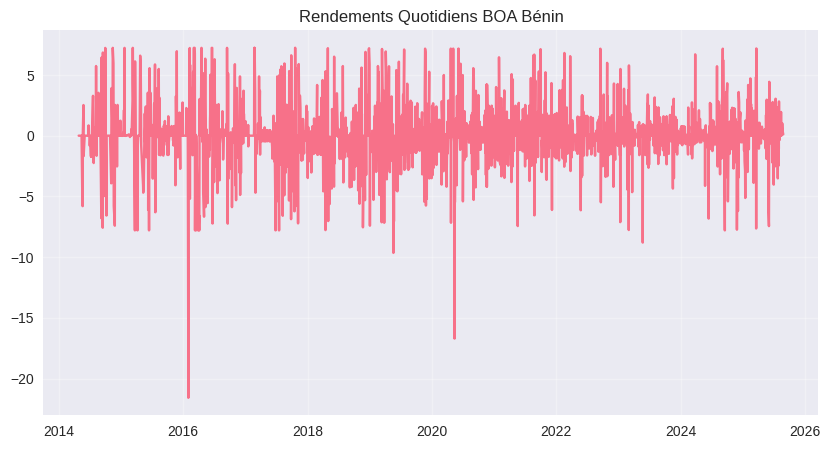

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))  # Taille personnalisée si besoin
ax.plot(df_merged.index, df_merged['Returns'])
ax.set_title('Rendements Quotidiens BOA Bénin')
ax.grid(True, alpha=0.3)
plt.show()

1. PRÉPARATION DES DONNÉES
Variable cible: Returns
Features techniques: 9 variables
Features macro: 14 variables
Features totales: 23 variables
Dimensions finales: (2608, 23)

2. SPLIT TEMPOREL DES DONNÉES
Période d'entraînement: 2014-06-26 00:00:00 to 2023-07-12 00:00:00
Période de test: 2023-07-13 00:00:00 to 2025-08-25 00:00:00
Train: (2086, 9), Test: (522, 9)

3. ENTRAÎNEMENT DES MODÈLES
>>> MODÈLE SANS VARIABLES MACRO <<<
Optimisation Sans variables macro...
Sans variables macro - RMSE: 1.694991, R²: -0.0039

>>> MODÈLE AVEC VARIABLES MACRO <<<
Optimisation Avec variables macro...
Avec variables macro - RMSE: 1.688204, R²: 0.0042

4. COMPARAISON DES PERFORMANCES
              Modèle     RMSE      MAE        R²  JB p-value  LB p-value  n_features
Sans variables macro 1.694991 0.972514 -0.003870    0.000000    0.019641           9
Avec variables macro 1.688204 0.969628  0.004153    0.000000    0.009520          23

AMÉLIORATION AVEC VARIABLES MACRO:
📉 RMSE: +0.40%
📈 R²: +207.33%

5.

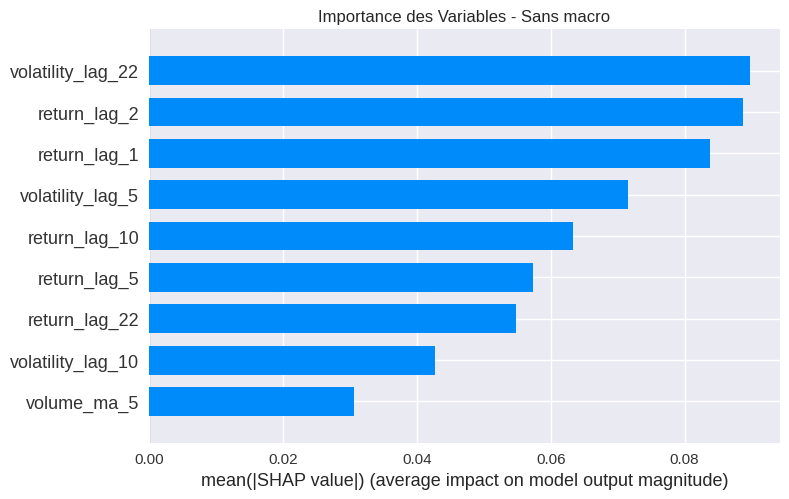

Analyse SHAP pour le modèle avec macro...


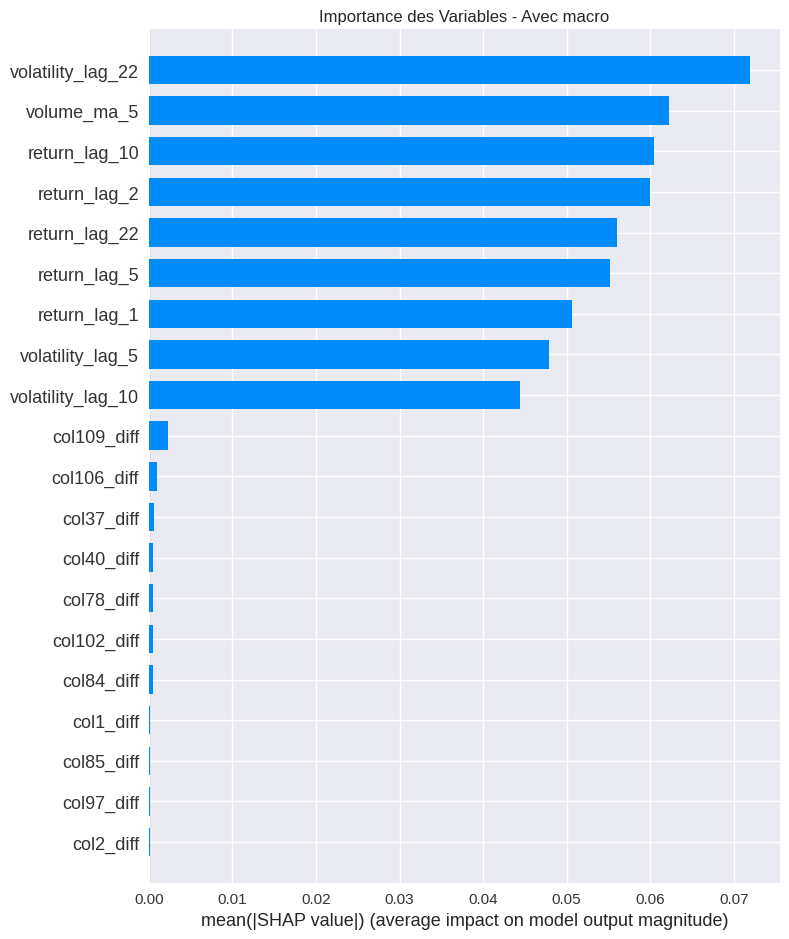


7. VISUALISATION COMPARATIVE


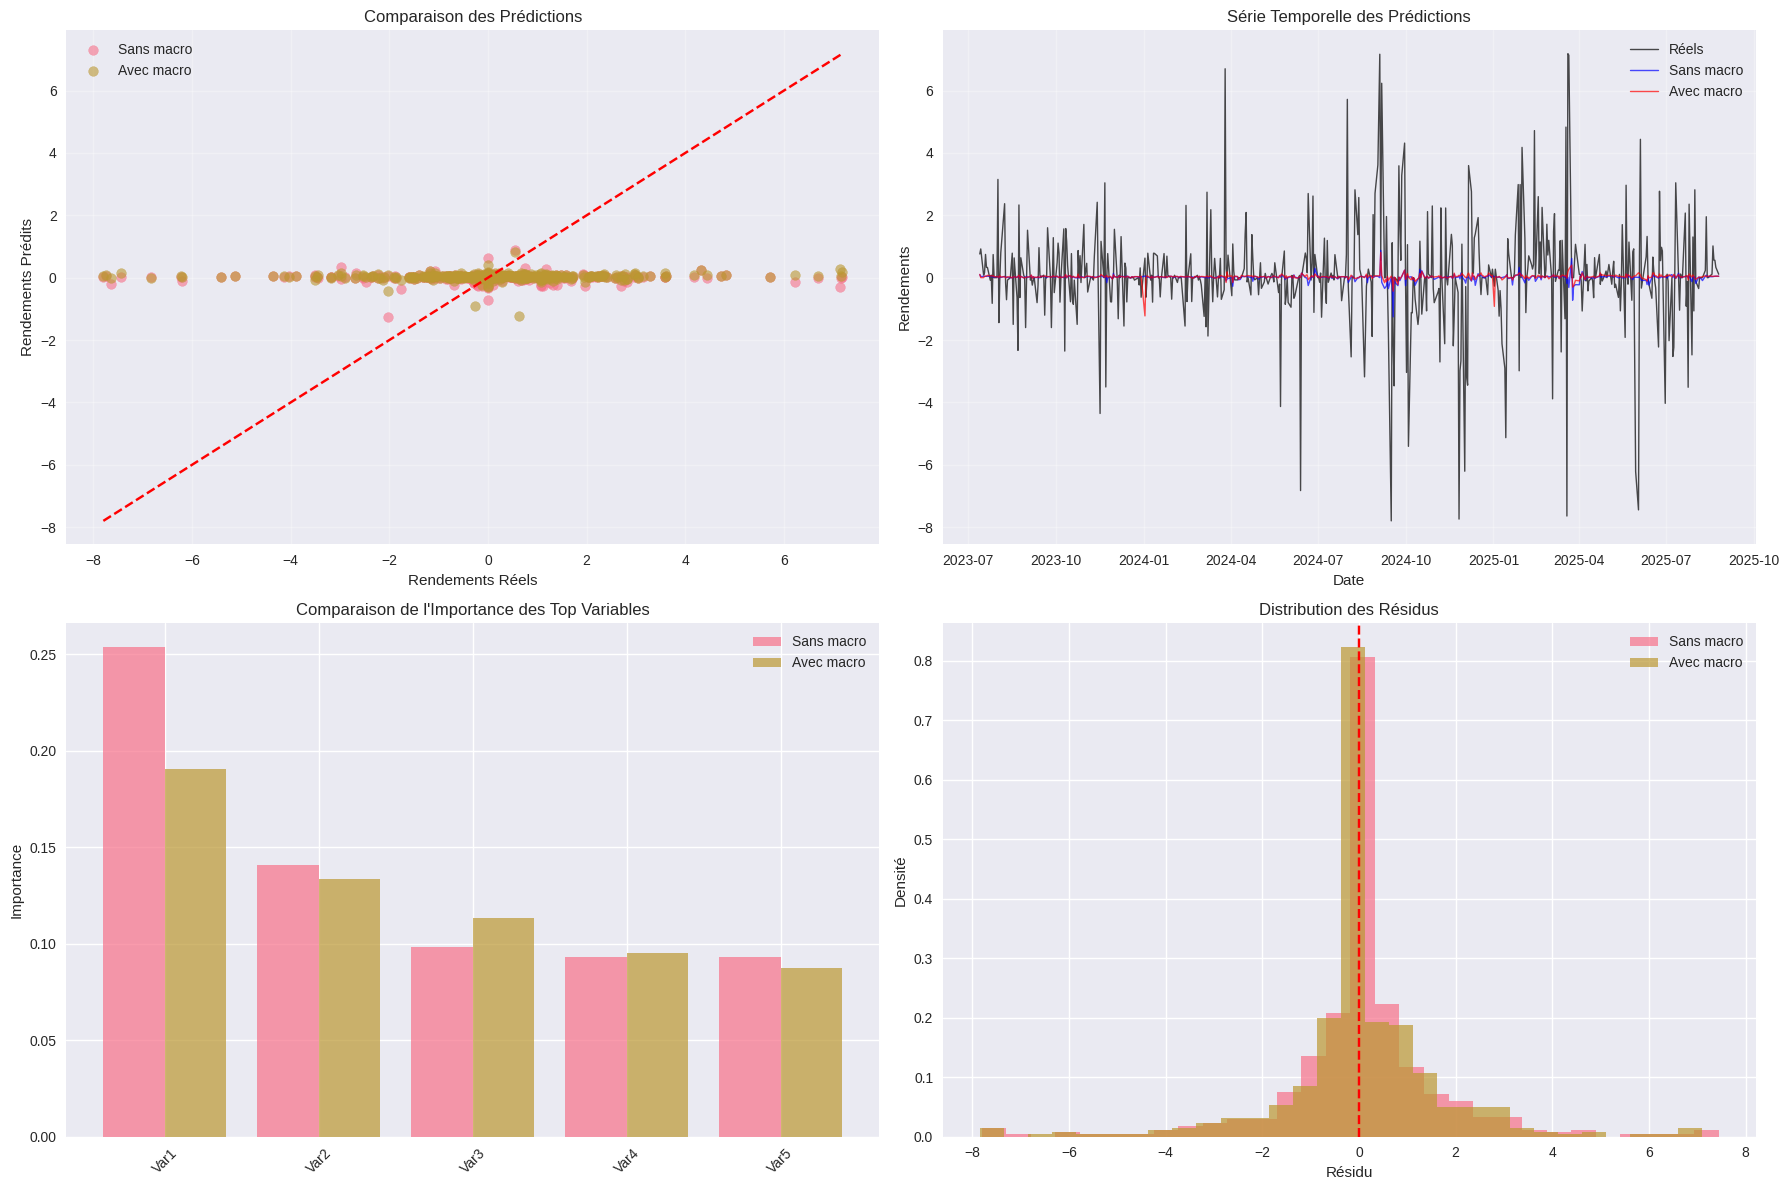


8. TESTS STATISTIQUES DE COMPARAISON
Test de Diebold-Mariano:
Statistique DM: 1.0744
P-value: 0.282666
❌ Aucune différence significative entre les modèles

9. CONCLUSION ET SAUVEGARDE
🎯 MEILLEUR MODÈLE: AVEC variables macroéconomiques
📊 Performance: RMSE = 1.688204
📈 Amélioration: +0.40%
📋 Test DM: Pas de différence significative

✓ Résultats sauvegardés:
  - comparison_final_results.csv
  - model_comparison_metrics.csv
  - comparison_results.png
  - shap_sans_macro.png
  - shap_avec_macro.png

ANALYSE COMPARATIVE TERMINÉE AVEC SUCCÈS!


In [ ]:
# -*- coding: utf-8 -*-
"""
Comparaison des Modèles avec et sans Variables Macroéconomiques
Mémoire Master - BANK OF AFRICA Bénin
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
import shap
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuration
pd.set_option('display.float_format', '{:.6f}'.format)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (16, 10)

# 1. PRÉPARATION DES DONNÉES
# ==========================

print("="*80)
print("1. PRÉPARATION DES DONNÉES")
print("="*80)

# Variable cible
y = df_merged['Returns'].dropna()

# Features SANS variables macro (uniquement techniques)
technical_features = []
for lag in [1, 2, 5, 10, 22]:
    df_merged[f'return_lag_{lag}'] = df_merged['Returns'].shift(lag)
    technical_features.append(f'return_lag_{lag}')

for window in [5, 10, 22]:
    df_merged[f'volatility_lag_{window}'] = df_merged['Returns'].rolling(window=window).std().shift(1)
    technical_features.append(f'volatility_lag_{window}')

df_merged['volume_ma_5'] = df_finance['Vol.'].rolling(5).mean().shift(1)
technical_features.append('volume_ma_5')

# Features AVEC variables macro
macro_features = [col for col in df_merged.columns if col.startswith('col')]
all_features = macro_features+technical_features

# Nettoyage des données
df_clean = df_merged[all_features + ['Returns']].dropna()
X_technical = df_clean[technical_features]
X_with_macro = df_clean[all_features]
y_clean = df_clean['Returns']

print(f"Variable cible: Returns")
print(f"Features techniques: {len(technical_features)} variables")
print(f"Features macro: {len(macro_features)} variables")
print(f"Features totales: {len(all_features)} variables")
print(f"Dimensions finales: {X_with_macro.shape}")

# 2. SPLIT TEMPOREL
# =================

print("\n" + "="*80)
print("2. SPLIT TEMPOREL DES DONNÉES")
print("="*80)

split_idx = int(len(X_with_macro) * 0.8)
X_tech_train, X_tech_test = X_technical.iloc[:split_idx], X_technical.iloc[split_idx:]
X_macro_train, X_macro_test = X_with_macro.iloc[:split_idx], X_with_macro.iloc[split_idx:]
y_train, y_test = y_clean.iloc[:split_idx], y_clean.iloc[split_idx:]

print(f"Période d'entraînement: {X_tech_train.index.min()} to {X_tech_train.index.max()}")
print(f"Période de test: {X_tech_test.index.min()} to {X_tech_test.index.max()}")
print(f"Train: {X_tech_train.shape}, Test: {X_tech_test.shape}")

# 3. FONCTION D'ENTRAÎNEMENT
# ==========================

def train_and_evaluate_model(X_train, X_test, y_train, y_test, model_name):
    """Entraîne et évalue un modèle Random Forest"""

    # Standardisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Grille d'hyperparamètres
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True]
    }

    # Validation croisée temporelle
    tscv = TimeSeriesSplit(n_splits=5)

    # Grid Search
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=tscv,
        scoring='neg_mean_squared_error',
        verbose=0,
        n_jobs=-1
    )

    print(f"Optimisation {model_name}...")
    grid_search.fit(X_train_scaled, y_train)

    # Meilleur modèle
    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X_test_scaled)
    residuals = y_test - y_pred

    # Métriques
    metrics = {
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'mae': mean_absolute_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred),
        'model': best_rf,
        'scaler': scaler,
        'predictions': y_pred,
        'residuals': residuals,
        'best_params': grid_search.best_params_
    }

    # Tests statistiques
    jb_stat, jb_pval = stats.jarque_bera(residuals)
    from statsmodels.stats.diagnostic import acorr_ljungbox
    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)

    metrics['jb_pvalue'] = jb_pval
    metrics['lb_pvalue'] = lb_test['lb_pvalue'].iloc[0]

    print(f"{model_name} - RMSE: {metrics['rmse']:.6f}, R²: {metrics['r2']:.4f}")

    return metrics

# 4. ENTRAÎNEMENT DES MODÈLES
# ===========================

print("\n" + "="*80)
print("3. ENTRAÎNEMENT DES MODÈLES")
print("="*80)

# Modèle SANS variables macro
print(">>> MODÈLE SANS VARIABLES MACRO <<<")
results_no_macro = train_and_evaluate_model(X_tech_train, X_tech_test, y_train, y_test,
                                          "Sans variables macro")

# Modèle AVEC variables macro
print("\n>>> MODÈLE AVEC VARIABLES MACRO <<<")
results_with_macro = train_and_evaluate_model(X_macro_train, X_macro_test, y_train, y_test,
                                            "Avec variables macro")

# 5. COMPARAISON DES PERFORMANCES
# ===============================

print("\n" + "="*80)
print("4. COMPARAISON DES PERFORMANCES")
print("="*80)

comparison_data = [
    {
        'Modèle': 'Sans variables macro',
        'RMSE': results_no_macro['rmse'],
        'MAE': results_no_macro['mae'],
        'R²': results_no_macro['r2'],
        'JB p-value': results_no_macro['jb_pvalue'],
        'LB p-value': results_no_macro['lb_pvalue'],
        'n_features': len(technical_features)
    },
    {
        'Modèle': 'Avec variables macro',
        'RMSE': results_with_macro['rmse'],
        'MAE': results_with_macro['mae'],
        'R²': results_with_macro['r2'],
        'JB p-value': results_with_macro['jb_pvalue'],
        'LB p-value': results_with_macro['lb_pvalue'],
        'n_features': len(all_features)
    }
]

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Calcul de l'amélioration
rmse_improvement = ((results_no_macro['rmse'] - results_with_macro['rmse'])
                    / results_no_macro['rmse']) * 100
r2_improvement = ((results_with_macro['r2'] - results_no_macro['r2'])
                  / abs(results_no_macro['r2'])) * 100

print(f"\nAMÉLIORATION AVEC VARIABLES MACRO:")
print(f"📉 RMSE: {rmse_improvement:+.2f}%")
print(f"📈 R²: {r2_improvement:+.2f}%")

# 6. ANALYSE D'IMPORTANCE DES VARIABLES
# =====================================

print("\n" + "="*80)
print("5. ANALYSE D'IMPORTANCE DES VARIABLES")
print("="*80)

def analyze_feature_importance(model, feature_names, model_name):
    """Analyse l'importance des variables"""

    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    print(f"\nTOP 10 VARIABLES - {model_name}:")
    for i, row in importance_df.head(10).iterrows():
        print(f"{i+1:2d}. {row['feature']:25s}: {row['importance']:.4f}")

    return importance_df

# Importance pour le modèle sans macro
importance_no_macro = analyze_feature_importance(results_no_macro['model'],
                                               technical_features, "Sans macro")

# Importance pour le modèle avec macro
importance_with_macro = analyze_feature_importance(results_with_macro['model'],
                                                 all_features, "Avec macro")

# Variables macro les plus importantes
macro_importance = importance_with_macro[importance_with_macro['feature'].isin(macro_features)]
print(f"\nTOP 5 VARIABLES MACRO IMPORTANTES:")
for i, row in macro_importance.head(5).iterrows():
    print(f"{i+1:2d}. {row['feature']:25s}: {row['importance']:.4f}")

# 7. ANALYSE SHAP
# ===============

print("\n" + "="*80)
print("6. ANALYSE SHAP POUR L'INTERPRÉTABILITÉ")
print("="*80)

def shap_analysis(model, X_test, feature_names, model_name):
    """Analyse SHAP"""

    sample_idx = np.random.choice(len(X_test), size=min(300, len(X_test)), replace=False)
    X_sample = X_test.iloc[sample_idx]

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_sample)

    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
    plt.title(f'Importance des Variables - {model_name}')
    plt.tight_layout()
    plt.savefig(f'shap_{model_name.lower().replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()

    return shap_values

# Analyse SHAP pour les deux modèles
print("Analyse SHAP pour le modèle sans macro...")
shap_no_macro = shap_analysis(results_no_macro['model'], X_tech_test, technical_features, "Sans macro")

print("Analyse SHAP pour le modèle avec macro...")
shap_with_macro = shap_analysis(results_with_macro['model'], X_macro_test, all_features, "Avec macro")

# 8. VISUALISATION COMPARATIVE
# ============================

print("\n" + "="*80)
print("7. VISUALISATION COMPARATIVE")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Comparaison des prédictions
axes[0, 0].scatter(y_test, results_no_macro['predictions'], alpha=0.6, label='Sans macro')
axes[0, 0].scatter(y_test, results_with_macro['predictions'], alpha=0.6, label='Avec macro')
max_val = max(y_test.max(), results_no_macro['predictions'].max(), results_with_macro['predictions'].max())
min_val = min(y_test.min(), results_no_macro['predictions'].min(), results_with_macro['predictions'].min())
axes[0, 0].plot([min_val, max_val], [min_val, max_val], 'r--')
axes[0, 0].set_xlabel('Rendements Réels')
axes[0, 0].set_ylabel('Rendements Prédits')
axes[0, 0].set_title('Comparaison des Prédictions')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Série temporelle des prédictions
axes[0, 1].plot(y_test.index, y_test.values, 'k-', alpha=0.7, label='Réels', linewidth=1)
axes[0, 1].plot(y_test.index, results_no_macro['predictions'], 'b-', alpha=0.7, label='Sans macro', linewidth=1)
axes[0, 1].plot(y_test.index, results_with_macro['predictions'], 'r-', alpha=0.7, label='Avec macro', linewidth=1)
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Rendements')
axes[0, 1].set_title('Série Temporelle des Prédictions')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Importance des variables comparée
top_tech = importance_no_macro.head(5)
top_macro = importance_with_macro.head(5)

x_pos = np.arange(len(top_tech))
axes[1, 0].bar(x_pos - 0.2, top_tech['importance'], width=0.4, label='Sans macro', alpha=0.7)
axes[1, 0].bar(x_pos + 0.2, top_macro['importance'], width=0.4, label='Avec macro', alpha=0.7)
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels([f'Var{i+1}' for i in range(len(top_tech))], rotation=45)
axes[1, 0].set_ylabel('Importance')
axes[1, 0].set_title('Comparaison de l\'Importance des Top Variables')
axes[1, 0].legend()

# Distribution des résidus
axes[1, 1].hist(results_no_macro['residuals'], bins=30, alpha=0.7, label='Sans macro', density=True)
axes[1, 1].hist(results_with_macro['residuals'], bins=30, alpha=0.7, label='Avec macro', density=True)
axes[1, 1].axvline(0, color='red', linestyle='--')
axes[1, 1].set_xlabel('Résidu')
axes[1, 1].set_ylabel('Densité')
axes[1, 1].set_title('Distribution des Résidus')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('comparison_results.png', dpi=300, bbox_inches='tight')
plt.show()

# 9. TESTS STATISTIQUES DE COMPARAISON
# ====================================

print("\n" + "="*80)
print("8. TESTS STATISTIQUES DE COMPARAISON")
print("="*80)

# Test de Diebold-Mariano
def diebold_mariano_test(y_true, pred1, pred2):
    """Test de Diebold-Mariano pour comparer deux modèles"""
    e1 = y_true - pred1
    e2 = y_true - pred2
    d = e1**2 - e2**2
    n = len(d)

    dm_stat = np.mean(d) / (np.std(d, ddof=1) / np.sqrt(n))
    p_value = 2 * (1 - stats.norm.cdf(abs(dm_stat)))

    return dm_stat, p_value

dm_stat, dm_pvalue = diebold_mariano_test(y_test,
                                         results_no_macro['predictions'],
                                         results_with_macro['predictions'])

print(f"Test de Diebold-Mariano:")
print(f"Statistique DM: {dm_stat:.4f}")
print(f"P-value: {dm_pvalue:.6f}")

if dm_pvalue < 0.05:
    if dm_stat > 0:
        print("✅ Modèle avec variables macro significativement meilleur")
    else:
        print("✅ Modèle sans variables macro significativement meilleur")
else:
    print("❌ Aucune différence significative entre les modèles")

# 10. CONCLUSION ET SAUVEGARDE
# ============================

print("\n" + "="*80)
print("9. CONCLUSION ET SAUVEGARDE")
print("="*80)

# Détermination du meilleur modèle
if results_with_macro['rmse'] < results_no_macro['rmse']:
    best_model = "AVEC variables macroéconomiques"
    best_rmse = results_with_macro['rmse']
    improvement = rmse_improvement
else:
    best_model = "SANS variables macroéconomiques"
    best_rmse = results_no_macro['rmse']
    improvement = -rmse_improvement

print(f"🎯 MEILLEUR MODÈLE: {best_model}")
print(f"📊 Performance: RMSE = {best_rmse:.6f}")
print(f"📈 Amélioration: {improvement:+.2f}%")
print(f"📋 Test DM: {'Différence significative' if dm_pvalue < 0.05 else 'Pas de différence significative'}")

# Sauvegarde des résultats
final_results = pd.DataFrame({
    'date': y_test.index,
    'returns_actual': y_test.values,
    'returns_pred_no_macro': results_no_macro['predictions'],
    'returns_pred_with_macro': results_with_macro['predictions'],
    'residual_no_macro': results_no_macro['residuals'],
    'residual_with_macro': results_with_macro['residuals']
})

# Ajout des variables importantes
for feature in importance_with_macro.head(5)['feature']:
    if feature in X_macro_test.columns:
        final_results[feature] = X_macro_test[feature].values

final_results.to_csv('comparison_final_results.csv', index=False)
comparison_df.to_csv('model_comparison_metrics.csv', index=False)

print("\n✓ Résultats sauvegardés:")
print("  - comparison_final_results.csv")
print("  - model_comparison_metrics.csv")
print("  - comparison_results.png")
print("  - shap_sans_macro.png")
print("  - shap_avec_macro.png")

print("\n" + "="*80)
print("ANALYSE COMPARATIVE TERMINÉE AVEC SUCCÈS!")
print("="*80)

1. PRÉPARATION DES DONNÉES POUR LSTM
Variable cible: Returns
Features techniques: 9 variables
Features macro: 14 variables
Total features: 23 variables
Dimensions finales: (2608, 23)

2. PRÉPROCESSING ET NORMALISATION
Séquences SANS macro: X(2548, 60, 9), y(2548,)
Séquences AVEC macro: X(2548, 60, 23), y(2548,)

3. SPLIT TEMPOREL DES DONNÉES
Train SANS macro: X(2038, 60, 9), y(2038,)
Test SANS macro: X(510, 60, 9), y(510,)
Train AVEC macro: X(2038, 60, 23), y(2038,)
Test AVEC macro: X(510, 60, 23), y(510,)

4. ENTRAÎNEMENT DES MODÈLES LSTM

>>> Entraînement LSTM SANS variables macro <<<
Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 7.2491 - mae: 1.5306 - val_loss: 2.7919 - val_mae: 0.9469 - learning_rate: 0.0010
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 7.2294 - mae: 1.5355 - val_loss: 2.7838 - val_mae: 0.9392 - learning_rate: 0.0010
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 7.1657 - mae: 1.5276 - val_loss: 2.7863 - val_mae: 0.9393 - le

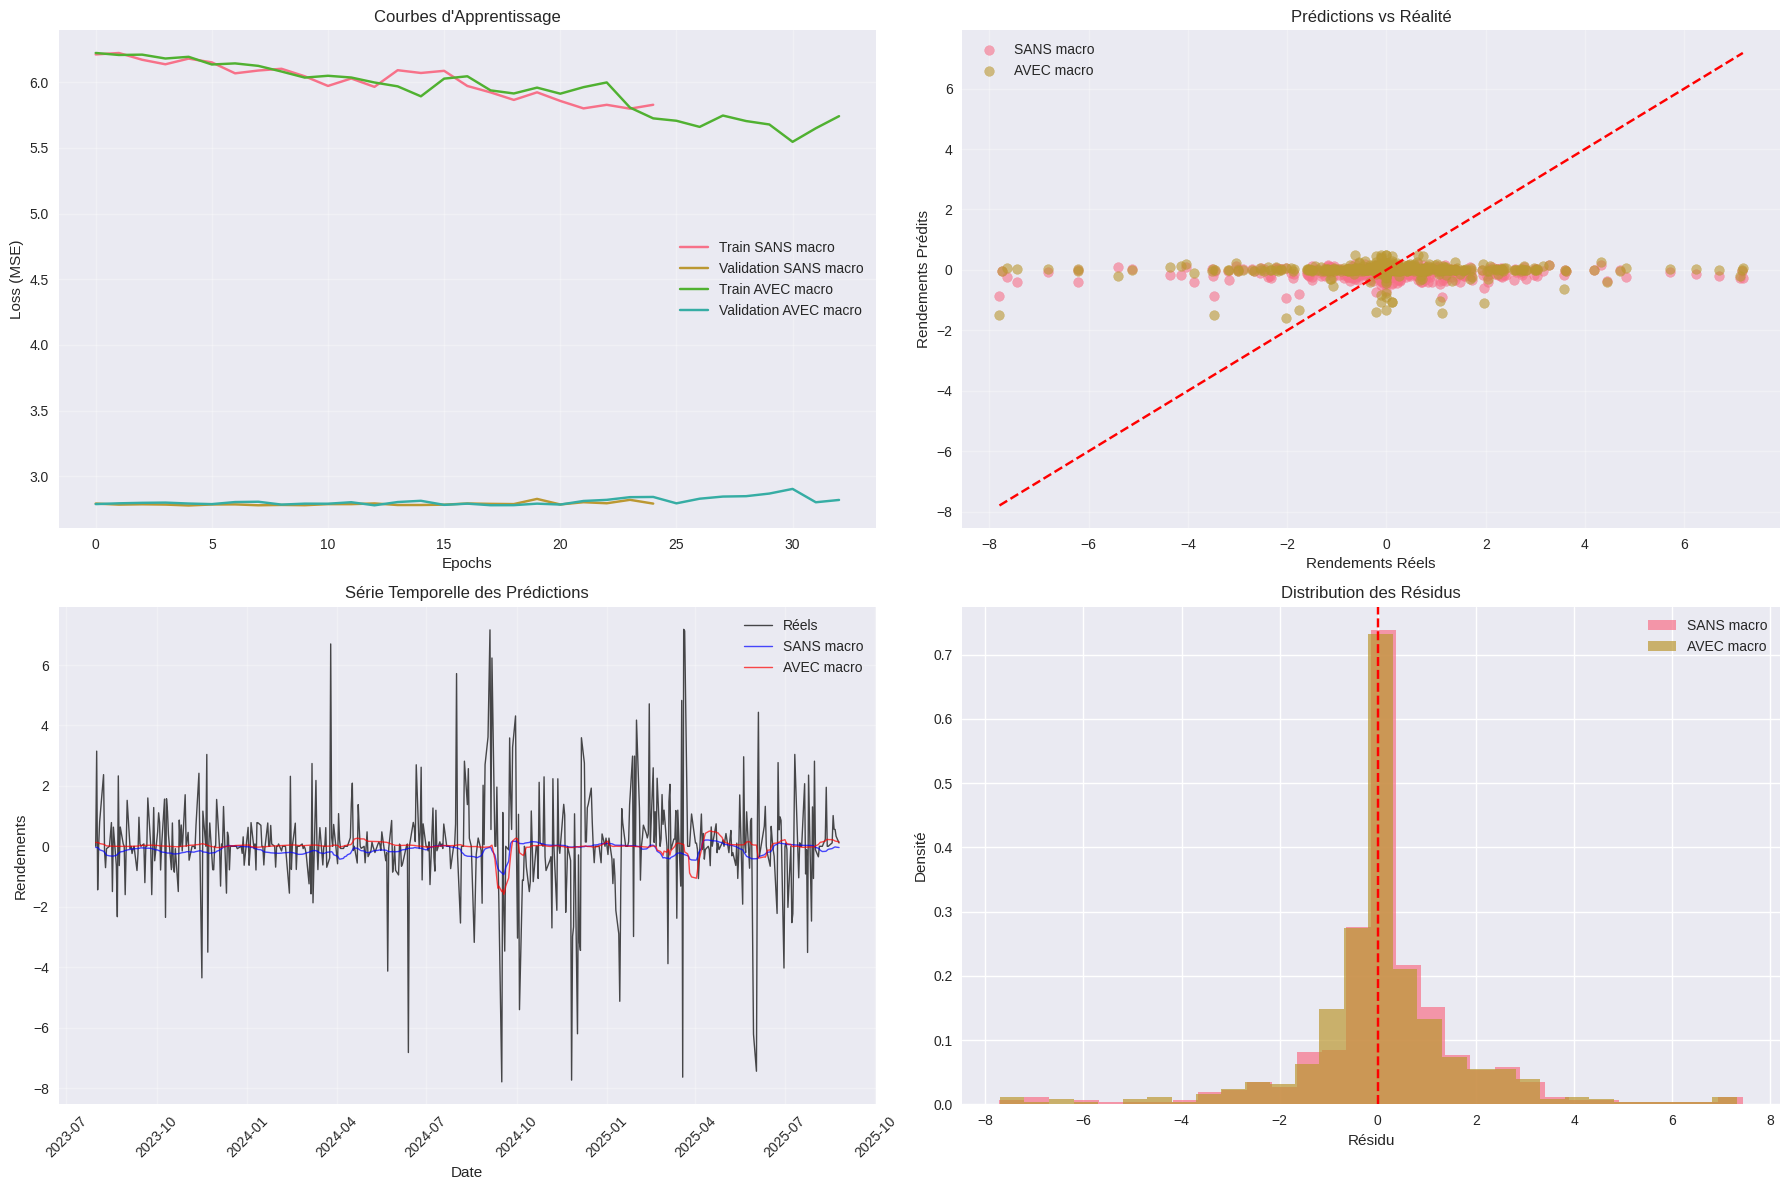


8. ANALYSE AVANCÉE DES RÉSIDUS


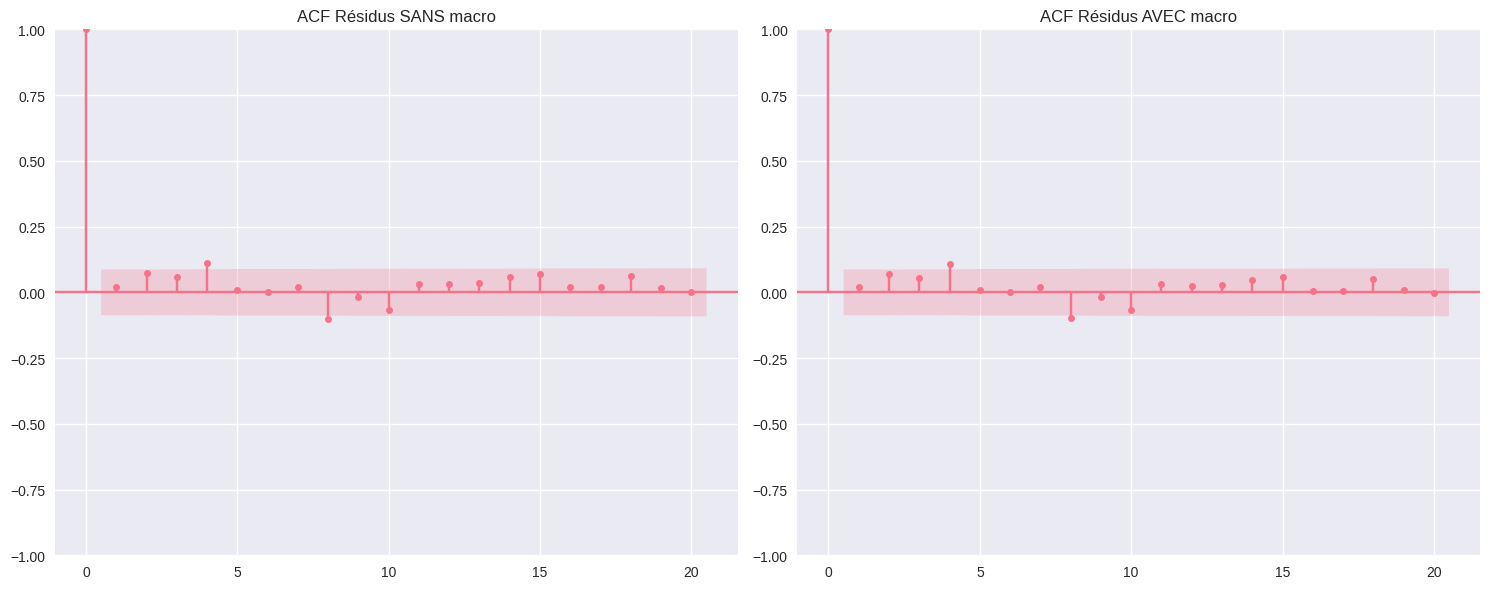


9. TEST DE DIEBOLD-MARIANO
Test de Diebold-Mariano:
Statistique DM: 0.7514
P-value: 0.452399
❌ Aucune différence significative entre les modèles

10. CONCLUSION ET SAUVEGARDE
🎯 MEILLEUR MODÈLE: AVEC variables macroéconomiques
📊 Performance: RMSE = 1.710830
📈 Amélioration: +0.47%
📋 Test DM: Pas de différence significative

✓ Résultats sauvegardés:
  - lstm_comparison_results.csv
  - lstm_model_metrics.csv
  - lstm_comparison_results.png
  - residuals_analysis.png

MODÉLISATION LSTM TERMINÉE AVEC SUCCÈS!


In [ ]:
# -*- coding: utf-8 -*-
"""
Modélisation LSTM des Rendements avec et sans Variables Macroéconomiques
Mémoire Master - BANK OF AFRICA Bénin
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
warnings.filterwarnings('ignore')

# Configuration
pd.set_option('display.float_format', '{:.6f}'.format)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (16, 10)

# 1. PRÉPARATION DES DONNÉES
# ==========================

print("="*80)
print("1. PRÉPARATION DES DONNÉES POUR LSTM")
print("="*80)

# Variable cible
y = df_merged['Returns'].dropna()

# Features SANS variables macro (uniquement techniques)
technical_features = []
for lag in [1, 2, 5, 10, 22]:
    df_merged[f'return_lag_{lag}'] = df_merged['Returns'].shift(lag)
    technical_features.append(f'return_lag_{lag}')

for window in [5, 10, 22]:
    df_merged[f'volatility_lag_{window}'] = df_merged['Returns'].rolling(window=window).std().shift(1)
    technical_features.append(f'volatility_lag_{window}')

df_merged['Vol.'] = df_finance['Vol.']
df_merged['volume_ma_5'] = df_merged['Vol.'].rolling(5).mean().shift(1)
technical_features.append('volume_ma_5')

# Features AVEC variables macro
macro_features = [col for col in df_merged.columns if col.startswith('col')]
all_features = technical_features + macro_features

# Nettoyage des données
df_clean = df_merged[all_features + ['Returns']].dropna()
X_technical = df_clean[technical_features]
X_with_macro = df_clean[all_features]
y_clean = df_clean['Returns']

print(f"Variable cible: Returns")
print(f"Features techniques: {len(technical_features)} variables")
print(f"Features macro: {len(macro_features)} variables")
print(f"Total features: {len(all_features)} variables")
print(f"Dimensions finales: {X_with_macro.shape}")

# 2. PRÉPROCESSING
# ================

print("\n" + "="*80)
print("2. PRÉPROCESSING ET NORMALISATION")
print("="*80)

# Standardisation
scaler_tech = StandardScaler()
scaler_macro = StandardScaler()

X_tech_scaled = scaler_tech.fit_transform(X_technical)
X_macro_scaled = scaler_macro.fit_transform(X_with_macro)

# Conversion en DataFrames
X_tech_df = pd.DataFrame(X_tech_scaled, columns=technical_features, index=X_technical.index)
X_macro_df = pd.DataFrame(X_macro_scaled, columns=all_features, index=X_with_macro.index)

# 3. CRÉATION DES SÉQUENCES TEMPORELLES
# =====================================

def create_sequences(X, y, time_steps=60):
    """Crée des séquences temporelles pour LSTM"""
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 60  # 3 mois de données historiques

# Séquences SANS variables macro
X_tech_seq, y_tech_seq = create_sequences(X_tech_scaled, y_clean.values, TIME_STEPS)

# Séquences AVEC variables macro
X_macro_seq, y_macro_seq = create_sequences(X_macro_scaled, y_clean.values, TIME_STEPS)

print(f"Séquences SANS macro: X{X_tech_seq.shape}, y{y_tech_seq.shape}")
print(f"Séquences AVEC macro: X{X_macro_seq.shape}, y{y_macro_seq.shape}")

# 4. SPLIT TEMPOREL
# =================

print("\n" + "="*80)
print("3. SPLIT TEMPOREL DES DONNÉES")
print("="*80)

# Split pour modèles SANS macro
split_idx_tech = int(len(X_tech_seq) * 0.8)
X_tech_train, X_tech_test = X_tech_seq[:split_idx_tech], X_tech_seq[split_idx_tech:]
y_tech_train, y_tech_test = y_tech_seq[:split_idx_tech], y_tech_seq[split_idx_tech:]

# Split pour modèles AVEC macro
split_idx_macro = int(len(X_macro_seq) * 0.8)
X_macro_train, X_macro_test = X_macro_seq[:split_idx_macro], X_macro_seq[split_idx_macro:]
y_macro_train, y_macro_test = y_macro_seq[:split_idx_macro], y_macro_seq[split_idx_macro:]

print(f"Train SANS macro: X{X_tech_train.shape}, y{y_tech_train.shape}")
print(f"Test SANS macro: X{X_tech_test.shape}, y{y_tech_test.shape}")
print(f"Train AVEC macro: X{X_macro_train.shape}, y{y_macro_train.shape}")
print(f"Test AVEC macro: X{X_macro_test.shape}, y{y_macro_test.shape}")

# 5. ARCHITECTURE LSTM
# ====================

def create_lstm_model(input_shape, units=50, dropout_rate=0.3, learning_rate=0.001):
    """Crée un modèle LSTM"""
    model = Sequential([
        Input(shape=input_shape),
        LSTM(units, return_sequences=True, dropout=dropout_rate),
        LSTM(units//2, dropout=dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(16, activation='relu'),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )

    return model

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

# 6. ENTRAÎNEMENT DES MODÈLES
# ===========================

print("\n" + "="*80)
print("4. ENTRAÎNEMENT DES MODÈLES LSTM")
print("="*80)

def train_lstm_model(X_train, y_train, X_test, y_test, input_shape, model_name):
    """Entraîne et évalue un modèle LSTM"""

    print(f"\n>>> Entraînement {model_name} <<<")

    model = create_lstm_model(input_shape, units=100, dropout_rate=0.3)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping, reduce_lr],
        verbose=1,
        shuffle=False
    )

    # Prédictions
    y_pred = model.predict(X_test).flatten()

    # Métriques
    metrics = {
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'mae': mean_absolute_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred),
        'model': model,
        'history': history,
        'predictions': y_pred
    }

    print(f"{model_name} - RMSE: {metrics['rmse']:.6f}, R²: {metrics['r2']:.4f}")

    return metrics

# Entraînement modèle SANS macro
results_no_macro = train_lstm_model(
    X_tech_train, y_tech_train, X_tech_test, y_tech_test,
    (X_tech_train.shape[1], X_tech_train.shape[2]),
    "LSTM SANS variables macro"
)

# Entraînement modèle AVEC macro
results_with_macro = train_lstm_model(
    X_macro_train, y_macro_train, X_macro_test, y_macro_test,
    (X_macro_train.shape[1], X_macro_train.shape[2]),
    "LSTM AVEC variables macro"
)

# 7. TESTS POST-ESTIMATION
# ========================

print("\n" + "="*80)
print("5. TESTS POST-ESTIMATION")
print("="*80)

def post_estimation_tests(y_true, y_pred, model_name):
    """Effectue les tests post-estimation"""

    residuals = y_true - y_pred

    print(f"\n--- Tests post-estimation ({model_name}) ---")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.6f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.6f}")
    print(f"R²: {r2_score(y_true, y_pred):.4f}")

    # Tests statistiques
    jb_stat, jb_pval = stats.jarque_bera(residuals)
    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)

    print(f"Jarque-Bera: p-value = {jb_pval:.6f}")
    print(f"Ljung-Box résidus: p-value = {lb_test['lb_pvalue'].iloc[0]:.6f}")

    return {
        'residuals': residuals,
        'jb_pvalue': jb_pval,
        'lb_pvalue': lb_test['lb_pvalue'].iloc[0]
    }

# Tests pour les deux modèles
post_no_macro = post_estimation_tests(y_tech_test, results_no_macro['predictions'], "SANS macro")
post_with_macro = post_estimation_tests(y_macro_test, results_with_macro['predictions'], "AVEC macro")

# 8. COMPARAISON DES PERFORMANCES
# ===============================

print("\n" + "="*80)
print("6. COMPARAISON DES PERFORMANCES")
print("="*80)

comparison_data = [
    {
        'Modèle': 'LSTM SANS macro',
        'RMSE': results_no_macro['rmse'],
        'MAE': results_no_macro['mae'],
        'R²': results_no_macro['r2'],
        'JB p-value': post_no_macro['jb_pvalue'],
        'LB p-value': post_no_macro['lb_pvalue'],
        'n_features': len(technical_features)
    },
    {
        'Modèle': 'LSTM AVEC macro',
        'RMSE': results_with_macro['rmse'],
        'MAE': results_with_macro['mae'],
        'R²': results_with_macro['r2'],
        'JB p-value': post_with_macro['jb_pvalue'],
        'LB p-value': post_with_macro['lb_pvalue'],
        'n_features': len(all_features)
    }
]

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Calcul de l'amélioration
rmse_improvement = ((results_no_macro['rmse'] - results_with_macro['rmse'])
                    / results_no_macro['rmse']) * 100
r2_improvement = ((results_with_macro['r2'] - results_no_macro['r2'])
                  / abs(results_no_macro['r2'])) * 100

print(f"\nAMÉLIORATION AVEC VARIABLES MACRO:")
print(f"📉 RMSE: {rmse_improvement:+.2f}%")
print(f"📈 R²: {r2_improvement:+.2f}%")

# 9. VISUALISATION DES RÉSULTATS
# ==============================

print("\n" + "="*80)
print("7. VISUALISATION DES RÉSULTATS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Courbes d'apprentissage
axes[0, 0].plot(results_no_macro['history'].history['loss'], label='Train SANS macro')
axes[0, 0].plot(results_no_macro['history'].history['val_loss'], label='Validation SANS macro')
axes[0, 0].plot(results_with_macro['history'].history['loss'], label='Train AVEC macro')
axes[0, 0].plot(results_with_macro['history'].history['val_loss'], label='Validation AVEC macro')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss (MSE)')
axes[0, 0].set_title('Courbes d\'Apprentissage')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Prédictions vs Réalité
axes[0, 1].scatter(y_tech_test, results_no_macro['predictions'], alpha=0.6, label='SANS macro')
axes[0, 1].scatter(y_macro_test, results_with_macro['predictions'], alpha=0.6, label='AVEC macro')
max_val = max(y_tech_test.max(), y_macro_test.max(),
             results_no_macro['predictions'].max(), results_with_macro['predictions'].max())
min_val = min(y_tech_test.min(), y_macro_test.min(),
             results_no_macro['predictions'].min(), results_with_macro['predictions'].min())
axes[0, 1].plot([min_val, max_val], [min_val, max_val], 'r--')
axes[0, 1].set_xlabel('Rendements Réels')
axes[0, 1].set_ylabel('Rendements Prédits')
axes[0, 1].set_title('Prédictions vs Réalité')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Série temporelle des prédictions
test_dates = X_technical.index[TIME_STEPS + split_idx_tech:TIME_STEPS + split_idx_tech + len(y_tech_test)]
axes[1, 0].plot(test_dates, y_tech_test, 'k-', alpha=0.7, label='Réels', linewidth=1)
axes[1, 0].plot(test_dates, results_no_macro['predictions'], 'b-', alpha=0.7, label='SANS macro', linewidth=1)
axes[1, 0].plot(test_dates, results_with_macro['predictions'], 'r-', alpha=0.7, label='AVEC macro', linewidth=1)
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Rendements')
axes[1, 0].set_title('Série Temporelle des Prédictions')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45)

# Distribution des résidus
axes[1, 1].hist(post_no_macro['residuals'], bins=30, alpha=0.7, label='SANS macro', density=True)
axes[1, 1].hist(post_with_macro['residuals'], bins=30, alpha=0.7, label='AVEC macro', density=True)
axes[1, 1].axvline(0, color='red', linestyle='--')
axes[1, 1].set_xlabel('Résidu')
axes[1, 1].set_ylabel('Densité')
axes[1, 1].set_title('Distribution des Résidus')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('lstm_comparison_results.png', dpi=300, bbox_inches='tight')
plt.show()

# 10. ANALYSE DES RÉSIDUS AVANCÉE
# ===============================

print("\n" + "="*80)
print("8. ANALYSE AVANCÉE DES RÉSIDUS")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ACF des résidus
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(post_no_macro['residuals'], ax=axes[0], lags=20, alpha=0.05, title='ACF Résidus SANS macro')
plot_acf(post_with_macro['residuals'], ax=axes[1], lags=20, alpha=0.05, title='ACF Résidus AVEC macro')

plt.tight_layout()
plt.savefig('residuals_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 11. TEST DE DIEBOLD-MARIANO
# ===========================

print("\n" + "="*80)
print("9. TEST DE DIEBOLD-MARIANO")
print("="*80)

def diebold_mariano_test(y_true, pred1, pred2):
    """Test de comparaison de modèles"""
    e1 = y_true - pred1
    e2 = y_true - pred2
    d = e1**2 - e2**2
    n = len(d)

    dm_stat = np.mean(d) / (np.std(d, ddof=1) / np.sqrt(n))
    p_value = 2 * (1 - stats.norm.cdf(abs(dm_stat)))

    return dm_stat, p_value

# Alignement des séries pour le test
min_length = min(len(y_tech_test), len(y_macro_test))
y_true_aligned = y_tech_test[:min_length]
pred_no_macro_aligned = results_no_macro['predictions'][:min_length]
pred_with_macro_aligned = results_with_macro['predictions'][:min_length]

dm_stat, dm_pvalue = diebold_mariano_test(y_true_aligned, pred_no_macro_aligned, pred_with_macro_aligned)

print(f"Test de Diebold-Mariano:")
print(f"Statistique DM: {dm_stat:.4f}")
print(f"P-value: {dm_pvalue:.6f}")

if dm_pvalue < 0.05:
    if dm_stat > 0:
        print("✅ Modèle AVEC variables macro significativement meilleur")
    else:
        print("✅ Modèle SANS variables macro significativement meilleur")
else:
    print("❌ Aucune différence significative entre les modèles")

# 12. CONCLUSION ET SAUVEGARDE
# ============================

print("\n" + "="*80)
print("10. CONCLUSION ET SAUVEGARDE")
print("="*80)

# Détermination du meilleur modèle
if results_with_macro['rmse'] < results_no_macro['rmse']:
    best_model = "AVEC variables macroéconomiques"
    best_rmse = results_with_macro['rmse']
    improvement = rmse_improvement
else:
    best_model = "SANS variables macroéconomiques"
    best_rmse = results_no_macro['rmse']
    improvement = -rmse_improvement

print(f"🎯 MEILLEUR MODÈLE: {best_model}")
print(f"📊 Performance: RMSE = {best_rmse:.6f}")
print(f"📈 Amélioration: {improvement:+.2f}%")
print(f"📋 Test DM: {'Différence significative' if dm_pvalue < 0.05 else 'Pas de différence significative'}")

# Sauvegarde des résultats
final_results = pd.DataFrame({
    'date': test_dates[:min_length],
    'returns_actual': y_true_aligned,
    'returns_pred_no_macro': pred_no_macro_aligned,
    'returns_pred_with_macro': pred_with_macro_aligned,
    'residual_no_macro': post_no_macro['residuals'][:min_length],
    'residual_with_macro': post_with_macro['residuals'][:min_length]
})

final_results.to_csv('lstm_comparison_results.csv', index=False)
comparison_df.to_csv('lstm_model_metrics.csv', index=False)

print("\n✓ Résultats sauvegardés:")
print("  - lstm_comparison_results.csv")
print("  - lstm_model_metrics.csv")
print("  - lstm_comparison_results.png")
print("  - residuals_analysis.png")

print("\n" + "="*80)
print("MODÉLISATION LSTM TERMINÉE AVEC SUCCÈS!")
print("="*80)

1. CHARGEMENT ET PRÉPARATION DES DONNÉES

Période commune: 2023-07-31 to 2025-08-25
Nombre d'observations: 510
EGARCH: (510, 5)
Random Forest: (510, 11)
LSTM: (510, 6)

2. PRÉPARATION DES VARIABLES
EGARCH - Modélisation de la volatilité:
  Volatilité réalisée: 24.105642 ± 12.272900
  Volatilité conditionnelle: 5.087052 ± 3.649289

Random Forest - Prédiction des returns:
  Returns actual: 0.062545 ± 1.709731
  Returns prédits: 0.028262 ± 0.097936

LSTM - Prédiction des returns:
  Returns prédits: -0.111727 ± 0.168972

3. CALCUL DES MÉTRIQUES DE PERFORMANCE
Comparaison des métriques de performance:
                  Modèle target_type      RMSE       MAE      MAPE        R²  JB_pvalue  LB_pvalue
  EGARCH(3,1) Sans Macro  volatility 21.952742 19.110299 77.549914 -2.199507   0.000000   0.748539
Random Forest Avec Macro     returns  1.706127  0.983116       inf  0.004211   0.000000   0.011325
         LSTM Sans Macro     returns  1.718901  1.029112       inf -0.010756   0.000000   0.043099


NameError: name 'residuals_data' is not defined

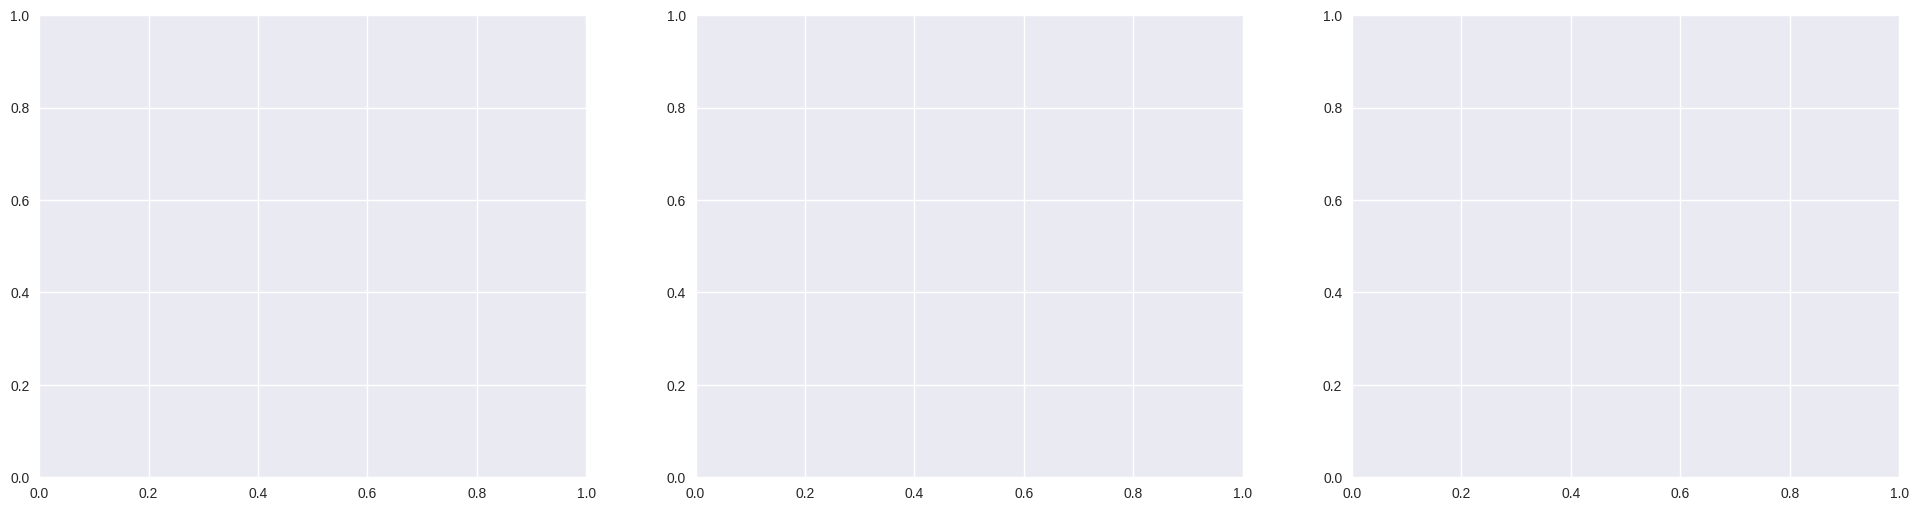

In [ ]:
# -*- coding: utf-8 -*-
"""
Comparaison des Performances des Modèles : EGARCH, Random Forest et LSTM
Mémoire Master - BANK OF AFRICA Bénin
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
warnings.filterwarnings('ignore')

# Configuration
pd.set_option('display.float_format', '{:.6f}'.format)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (16, 12)

# 1. CHARGEMENT ET PRÉPARATION DES DONNÉES
# =======================================

print("="*80)
print("1. CHARGEMENT ET PRÉPARATION DES DONNÉES")
print("="*80)


egarch_common = pd.read_csv('arch_modeling_results.csv', parse_dates=['date'])
rf_common = pd.read_csv('comparison_final_results.csv', parse_dates=['date'])
lstm_common = pd.read_csv('lstm_comparison_results.csv', parse_dates=['date'])

# Extraction des bonnes colonnes pour chaque modèle
# EGARCH: utilisation de 'returns' comme actual et 'volatility_conditional' comme prédiction?
# Mais EGARCH prédit la volatilité, pas les returns! Ajustement nécessaire.

# Pour EGARCH, on va utiliser les résidus standardisés pour évaluer la performance
# Pour RF et LSTM, on a directement les prédictions de returns

# Alignement des dates
common_dates = set(egarch_common['date']).intersection(rf_common['date']).intersection(lstm_common['date'])
common_dates = sorted(common_dates)

egarch_common = egarch_common[egarch_common['date'].isin(common_dates)].sort_values('date')
rf_common = rf_common[rf_common['date'].isin(common_dates)].sort_values('date')
lstm_common = lstm_common[lstm_common['date'].isin(common_dates)].sort_values('date')

# Vérification de l'alignement
print(f"\nPériode commune: {common_dates[0].date()} to {common_dates[-1].date()}")
print(f"Nombre d'observations: {len(common_dates)}")
print(f"EGARCH: {egarch_common.shape}")
print(f"Random Forest: {rf_common.shape}")
print(f"LSTM: {lstm_common.shape}")

# 2. PRÉPARATION DES VARIABLES CIBLES ET PRÉDICTIONS
# ==================================================

print("\n" + "="*80)
print("2. PRÉPARATION DES VARIABLES")
print("="*80)

# Pour EGARCH: on évalue la qualité de la modélisation de la volatilité
# Les résidus standardisés devraient suivre N(0,1) si le modèle est bon
y_true_volatility = egarch_common['volatility_realized'].values
y_pred_egarch_vol = egarch_common['volatility_conditional'].values
residuals_egarch = egarch_common['residuals_std'].values

# Pour Random Forest: prédiction des returns
y_true_returns = rf_common['returns_actual'].values
y_pred_rf = rf_common['returns_pred_with_macro'].values  # On prend avec macro
residuals_rf = rf_common['residual_with_macro'].values

# Pour LSTM: prédiction des returns
y_pred_lstm = lstm_common['returns_pred_no_macro'].values  # On prend sans macro
residuals_lstm = lstm_common['residual_no_macro'].values

print("EGARCH - Modélisation de la volatilité:")
print(f"  Volatilité réalisée: {y_true_volatility.mean():.6f} ± {y_true_volatility.std():.6f}")
print(f"  Volatilité conditionnelle: {y_pred_egarch_vol.mean():.6f} ± {y_pred_egarch_vol.std():.6f}")

print("\nRandom Forest - Prédiction des returns:")
print(f"  Returns actual: {y_true_returns.mean():.6f} ± {y_true_returns.std():.6f}")
print(f"  Returns prédits: {y_pred_rf.mean():.6f} ± {y_pred_rf.std():.6f}")

print("\nLSTM - Prédiction des returns:")
print(f"  Returns prédits: {y_pred_lstm.mean():.6f} ± {y_pred_lstm.std():.6f}")

# 3. CALCUL DES MÉTRIQUES DE PERFORMANCE
# ======================================

print("\n" + "="*80)
print("3. CALCUL DES MÉTRIQUES DE PERFORMANCE")
print("="*80)

def calculate_metrics(y_true, y_pred, residuals, model_name, target_type='returns'):
    """Calcule les métriques de performance"""

    if target_type == 'volatility':
        # Métriques pour la volatilité
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        mape = np.mean(np.abs((y_true - y_pred) / np.abs(y_true))) * 100

        # R² pour la volatilité
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0

    else:  # returns
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        mape = np.mean(np.abs((y_true - y_pred) / np.abs(y_true))) * 100

        # R² pour les returns
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0

    # Tests statistiques sur les résidus
    jb_stat, jb_pval = stats.jarque_bera(residuals)
    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)

    return {
        'Modèle': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'R²': r2,
        'JB_pvalue': jb_pval,
        'LB_pvalue': lb_test['lb_pvalue'].iloc[0],
        'residuals': residuals,
        'predictions': y_pred,
        'target_type': target_type
    }

# Métriques pour chaque modèle
metrics_egarch = calculate_metrics(y_true_volatility, y_pred_egarch_vol, residuals_egarch,
                                 'EGARCH(3,1) Sans Macro', 'volatility')
metrics_rf = calculate_metrics(y_true_returns, y_pred_rf, residuals_rf,
                             'Random Forest Avec Macro', 'returns')
metrics_lstm = calculate_metrics(y_true_returns, y_pred_lstm, residuals_lstm,
                               'LSTM Sans Macro', 'returns')

# Tableau comparatif
comparison_df = pd.DataFrame([metrics_egarch, metrics_rf, metrics_lstm])
comparison_df = comparison_df[['Modèle', 'target_type', 'RMSE', 'MAE', 'MAPE', 'R²', 'JB_pvalue', 'LB_pvalue']]

print("Comparaison des métriques de performance:")
print(comparison_df.to_string(index=False))

# 4. ANALYSE DES RÉSIDUS
# ======================

print("\n" + "="*80)
print("4. ANALYSE COMPARATIVE DES RÉSIDUS")
print("="*80)

# Statistiques descriptives des résidus
residuals_stats = pd.DataFrame({
    'Modèle': ['EGARCH', 'Random Forest', 'LSTM'],
    'Moyenne': [
        metrics_egarch['residuals'].mean(),
        metrics_rf['residuals'].mean(),
        metrics_lstm['residuals'].mean()
    ],
    'Écart-type': [
        metrics_egarch['residuals'].std(),
        metrics_rf['residuals'].std(),
        metrics_lstm['residuals'].std()
    ],
    'Skewness': [
        stats.skew(metrics_egarch['residuals']),
        stats.skew(metrics_rf['residuals']),
        stats.skew(metrics_lstm['residuals'])
    ],
    'Kurtosis': [
        stats.kurtosis(metrics_egarch['residuals']),
        stats.kurtosis(metrics_rf['residuals']),
        stats.kurtosis(metrics_lstm['residuals'])
    ]
})

print("Statistiques descriptives des résidus:")
print(residuals_stats.to_string(index=False))

# 5. VISUALISATIONS COMPARATIVES
# ==============================

print("\n" + "="*80)
print("5. VISUALISATIONS COMPARATIVES")
print("="*80)

fig, axes = plt.subplots(1,3, figsize=(24, 6))

# 5.1 Distribution des résidus
for i, (residuals, name, color) in enumerate(zip(residuals_data, model_names, colors)):
    axes[0].hist(residuals, bins=50, alpha=0.6, label=name, color=color, density=True)

axes[0].axvline(0, color='black', linestyle='--', linewidth=2)
axes[0].set_xlabel('Résidu')
axes[0].set_ylabel('Densité')
axes[0].set_title('Distribution des Résidus')
axes[0].legend()
axes[0].grid(False, alpha=0.3)

# 5.2 Prédictions vs Réalité (pour RF et LSTM)
axes[1].scatter(y_true_returns, y_pred_rf, alpha=0.6, label='Random Forest', color='blue')
axes[1].scatter(y_true_returns, y_pred_lstm, alpha=0.6, label='LSTM', color='green')
max_val = max(y_true_returns.max(), y_pred_rf.max(), y_pred_lstm.max())
min_val = min(y_true_returns.min(), y_pred_rf.min(), y_pred_lstm.min())
axes[1].plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2)
axes[1].set_xlabel('Returns Réels')
axes[1].set_ylabel('Returns Prédits')
axes[1].set_title('Prédictions vs Réalité (RF et LSTM)')
axes[1].legend()
axes[1].grid(False, alpha=0.3)

# 5.3 Volatilité réalisée vs conditionnelle (EGARCH)
axes[2].scatter(y_true_volatility, y_pred_egarch_vol, alpha=0.6, color='red')
max_vol = max(y_true_volatility.max(), y_pred_egarch_vol.max())
min_vol = min(y_true_volatility.min(), y_pred_egarch_vol.min())
axes[2].plot([min_vol, max_vol], [min_vol, max_vol], 'k--', linewidth=2)
axes[2].set_xlabel('Volatilité Réalisée')
axes[2].set_ylabel('Volatilité Conditionnelle (EGARCH)')
axes[2].set_title('Volatilité: Réalisée vs Conditionnelle')
axes[2].grid(False, alpha=0.3)

# 6. ANALYSE DE LA NORMALITÉ DES RÉSIDUS
# ======================================

print("\n" + "="*80)
print("6. ANALYSE DE LA NORMALITÉ DES RÉSIDUS")
print("="*80)

# QQ-plots pour vérifier la normalité
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (residuals, name, color) in enumerate(zip(residuals_data, model_names, colors)):
    stats.probplot(residuals, dist="norm", plot=axes[i])
    axes[i].set_title(f'QQ-Plot - {name}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('qq_plots_residuals.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. SAUVEGARDE DES RÉSULTATS
# ===========================

print("\n" + "="*80)
print("7. SAUVEGARDE DES RÉSULTATS")
print("="*80)

# Sauvegarde des résultats détaillés
final_results = pd.DataFrame({
    'date': egarch_common['date'],
    'volatility_realized': y_true_volatility,
    'volatility_egarch': y_pred_egarch_vol,
    'returns_actual': y_true_returns,
    'returns_pred_rf': y_pred_rf,
    'returns_pred_lstm': y_pred_lstm,
    'residual_egarch': residuals_egarch,
    'residual_rf': residuals_rf,
    'residual_lstm': residuals_lstm
})

final_results.to_csv('final_model_comparison_results.csv', index=False)
comparison_df.to_csv('model_performance_metrics.csv', index=False)
residuals_stats.to_csv('residuals_statistics.csv', index=False)

print("✓ Résultats sauvegardés:")
print("  - final_model_comparison_results.csv")
print("  - model_performance_metrics.csv")
print("  - residuals_statistics.csv")
print("  - model_comparison_analysis.png")
print("  - qq_plots_residuals.png")

print("\n" + "="*80)
print("ANALYSE COMPARATIVE TERMINÉE AVEC SUCCÈS!")
print("="*80)
print("RÉSUMÉ DES RÉSULTATS:")
print("📊 EGARCH: Modélisation de la volatilité")
print("🤖 Random Forest: Prédiction des returns avec variables macro")
print("🧠 LSTM: Prédiction des returns sans variables macro")
print("="*80)

In [ ]:
# -*- coding: utf-8 -*-
"""
Modélisation des Returns et Analyse de l'Impact des Variables Macroéconomiques
Mémoire Master - BANK OF AFRICA Bénin
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Bibliothèques pour les modèles
from arch import arch_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Configuration
pd.set_option('display.float_format', '{:.6f}'.format)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Chargement des données
print("Chargement des données...")


# Identification des variables
print(f"Dimensions du dataset: {df_merged.shape}")
print("Colonnes disponibles:")
print(df_merged.columns.tolist())

# Séparation des variables
target_var = 'Returns'
macro_vars = [col for col in df_merged.columns if col.startswith('col')]
other_vars = [col for col in df_merged.columns if col not in [target_var] + macro_vars]

print(f"\nVariable cible: {target_var}")
print(f"Variables macroéconomiques: {len(macro_vars)}")
print(f"Autres variables: {len(other_vars)}")

# 1. MODÈLE EGARCH(3,1) SANS VARIABLES MACRO
print("\n" + "="*80)
print("1. MODÈLE EGARCH(3,1) SANS VARIABLES MACRO")
print("="*80)

def fit_egarch(returns, p=3, q=1):
    """Estime un modèle EGARCH(p,q) sur les returns"""
    try:
        model = arch_model(returns, vol='EGarch', p=p, q=q, dist='normal')
        result = model.fit(disp='off')
        return result
    except Exception as e:
        print(f"Erreur dans l'estimation EGARCH: {e}")
        return None

# Estimation du modèle EGARCH
egarch_result = fit_egarch(df_merged[target_var].dropna(), p=3, q=1)

if egarch_result:
    print("Résultats de l'estimation EGARCH(3,1):")
    print(egarch_result.summary())

    # Prévisions et résidus
    egarch_forecasts = egarch_result.forecast(horizon=1).variance.dropna()
    egarch_residuals = egarch_result.resid.dropna()

    # Métriques de performance
    actual_returns = df_merged[target_var].iloc[-len(egarch_forecasts):]
    mse_egarch = mean_squared_error(actual_returns, egarch_forecasts.iloc[:, 0])
    mae_egarch = mean_absolute_error(actual_returns, egarch_forecasts.iloc[:, 0])

    print(f"\nPerformance EGARCH:")
    print(f"MSE: {mse_egarch:.6f}")
    print(f"MAE: {mae_egarch:.6f}")

    # Visualisation des résultats EGARCH
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Returns et volatilité conditionnelle
    axes[0, 0].plot(df_merged[target_var], label='Returns', alpha=0.7)
    axes[0, 0].set_title('Série des Returns')
    axes[0, 0].legend()

    axes[0, 1].plot(egarch_result.conditional_volatility, color='red', label='Volatilité conditionnelle')
    axes[0, 1].set_title('Volatilité Conditionnelle (EGARCH)')
    axes[0, 1].legend()

    # Résidus standardisés
    std_residuals = egarch_residuals / egarch_result.conditional_volatility
    axes[1, 0].hist(std_residuals, bins=50, alpha=0.7, edgecolor='black')
    axes[1, 0].set_title('Distribution des Résidus Standardisés')

    # ACF des résidus au carré
    from statsmodels.graphics.tsaplots import plot_acf
    plot_acf(std_residuals**2, ax=axes[1, 1], lags=20)
    axes[1, 1].set_title('ACF des Résidus au Carré')

    plt.tight_layout()
    plt.savefig('egarch_results.png', dpi=300, bbox_inches='tight')
    plt.show()

# 2. MODÈLE RANDOM FOREST AVEC VARIABLES MACRO
print("\n" + "="*80)
print("2. MODÈLE RANDOM FOREST AVEC VARIABLES MACRO")
print("="*80)

def prepare_rf_data(df, target, macro_vars, test_size=0.2):
    """Prépare les données pour Random Forest"""
    # Sélection des variables
    features = macro_vars + ['volatility']  # Ajout de la volatilité comme variable importante

    # Vérification de la disponibilité des variables
    available_features = [f for f in features if f in df.columns]
    print(f"Variables utilisées: {available_features}")

    X = df[available_features].dropna()
    y = df[target].loc[X.index]

    # Split train-test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, shuffle=False, random_state=42
    )

    return X_train, X_test, y_train, y_test, available_features

# Préparation des données
X_train_rf, X_test_rf, y_train_rf, y_test_rf, rf_features = prepare_rf_data(
    df_merged, target_var, macro_vars
)

# Entraînement du modèle Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_rf, y_train_rf)

# Prédictions et évaluation
y_pred_rf = rf_model.predict(X_test_rf)

mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

print("Performance Random Forest:")
print(f"MSE: {mse_rf:.6f}")
print(f"MAE: {mae_rf:.6f}")
print(f"R²: {r2_rf:.6f}")

# Importance des variables
feature_importance = pd.DataFrame({
    'feature': rf_features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 des variables les plus importantes:")
print(feature_importance.head(10))

# Visualisation de l'importance des variables
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Importance des Variables (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('rf_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. MODÈLE LSTM SANS VARIABLES MACRO
print("\n" + "="*80)
print("3. MODÈLE LSTM SANS VARIABLES MACRO")
print("="*80)

def prepare_lstm_data(df, target, lookback=10, test_size=0.2):
    """Prépare les données pour LSTM"""
    # Utilisation seulement de la variable cible et de la volatilité
    features = [target, 'volatility']
    data = df[features].dropna()

    # Normalisation
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    # Création des séquences
    X, y = [], []
    for i in range(lookback, len(scaled_data)):
        X.append(scaled_data[i-lookback:i, :])
        y.append(scaled_data[i, 0])  # Returns est la première colonne

    X, y = np.array(X), np.array(y)

    # Split train-test
    split_idx = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    return X_train, X_test, y_train, y_test, scaler

def create_lstm_model(input_shape):
    """Crée un modèle LSTM"""
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='mse',
                 metrics=['mae'])

    return model

# Préparation des données LSTM
lookback = 10
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm, scaler_lstm = prepare_lstm_data(
    df_merged, target_var, lookback=lookback
)

print(f"Dimensions des données LSTM:")
print(f"X_train: {X_train_lstm.shape}, X_test: {X_test_lstm.shape}")
print(f"y_train: {y_train_lstm.shape}, y_test: {y_test_lstm.shape}")

# Création et entraînement du modèle LSTM
lstm_model = create_lstm_model((X_train_lstm.shape[1], X_train_lstm.shape[2]))

history = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    batch_size=32,
    epochs=50,
    validation_data=(X_test_lstm, y_test_lstm),
    verbose=1,
    shuffle=False
)

# Prédictions
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Transformation inverse pour les returns
# Note: Nous devons inverser la transformation seulement pour les returns
dummy_data = np.zeros((len(y_pred_lstm), 2))
dummy_data[:, 0] = y_pred_lstm.flatten()
y_pred_original = scaler_lstm.inverse_transform(dummy_data)[:, 0]

dummy_actual = np.zeros((len(y_test_lstm), 2))
dummy_actual[:, 0] = y_test_lstm
y_test_original = scaler_lstm.inverse_transform(dummy_actual)[:, 0]

# Métriques de performance
mse_lstm = mean_squared_error(y_test_original, y_pred_original)
mae_lstm = mean_absolute_error(y_test_original, y_pred_original)
r2_lstm = r2_score(y_test_original, y_pred_original)

print("Performance LSTM:")
print(f"MSE: {mse_lstm:.6f}")
print(f"MAE: {mae_lstm:.6f}")
print(f"R²: {r2_lstm:.6f}")

# Visualisation des performances LSTM
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Courbe d'apprentissage
axes[0, 0].plot(history.history['loss'], label='Train Loss')
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss')
axes[0, 0].set_title('Courbe d\'Apprentissage')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].legend()

# Prédictions vs Réalité
axes[0, 1].plot(y_test_original, label='Réel', alpha=0.7)
axes[0, 1].plot(y_pred_original, label='Prédit', alpha=0.7)
axes[0, 1].set_title('Prédictions vs Réalité')
axes[0, 1].legend()

# Erreurs de prédiction
errors = y_test_original - y_pred_original
axes[1, 0].hist(errors, bins=50, alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Distribution des Erreurs de Prédiction')
axes[1, 0].set_xlabel('Erreur')
axes[1, 0].set_ylabel('Fréquence')

# Scatter plot des prédictions
axes[1, 1].scatter(y_test_original, y_pred_original, alpha=0.6)
axes[1, 1].plot([y_test_original.min(), y_test_original.max()],
                [y_test_original.min(), y_test_original.max()], 'r--')
axes[1, 1].set_xlabel('Valeurs Réelles')
axes[1, 1].set_ylabel('Prédictions')
axes[1, 1].set_title('Prédictions vs Réalité (Scatter)')

plt.tight_layout()
plt.savefig('lstm_results.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. COMPARAISON DES MODÈLES ET ANALYSE D'IMPACT
print("\n" + "="*80)
print("4. COMPARAISON DES MODÈLES ET ANALYSE D'IMPACT")
print("="*80)

# Comparaison des performances
performance_df = pd.DataFrame({
    'Modèle': ['EGARCH(3,1)', 'Random Forest', 'LSTM'],
    'MSE': [mse_egarch, mse_rf, mse_lstm],
    'MAE': [mae_egarch, mae_rf, mae_lstm],
    'R²': [np.nan, r2_rf, r2_lstm]  # EGARCH n'a pas de R² direct
})

print("Comparaison des performances:")
print(performance_df.to_string(index=False))

# Analyse d'impact des variables macro dans Random Forest
print("\nANALYSE D'IMPACT DES VARIABLES MACRO (Random Forest):")
print("="*50)

# Variables macro les plus importantes
macro_importance = feature_importance[feature_importance['feature'].str.startswith('col')]
macro_importance = macro_importance.sort_values('importance', ascending=False)

print("Top 10 des variables macro les plus importantes:")
print(macro_importance.head(10))

# Visualisation de l'impact des variables macro
plt.figure(figsize=(12, 8))
top_macro = macro_importance.head(10)
plt.barh(range(len(top_macro)), top_macro['importance'])
plt.yticks(range(len(top_macro)), top_macro['feature'])
plt.xlabel('Importance')
plt.title('Top 10 des Variables Macroéconomiques les Plus Importantes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('macro_impact_rf.png', dpi=300, bbox_inches='tight')
plt.show()

# Analyse de la significativité via permutation importance
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(
    rf_model, X_test_rf, y_test_rf, n_repeats=10, random_state=42, n_jobs=-1
)

perm_df = pd.DataFrame({
    'feature': rf_features,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

print("\nImportance par permutation (Top 10):")
print(perm_df.head(10))

# Variables macro significatives (importance > 0)
significant_macro = perm_df[perm_df['feature'].str.startswith('col') & (perm_df['importance_mean'] > 0)]
print(f"\nVariables macro significatives (importance > 0): {len(significant_macro)}")

# Heatmap de corrélation des variables macro importantes
top_macro_vars = macro_importance.head(8)['feature'].tolist()
if top_macro_vars:
    macro_corr = df_merged[top_macro_vars].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(macro_corr, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.3f')
    plt.title('Corrélation entre les Variables Macroéconomiques Importantes')
    plt.tight_layout()
    plt.savefig('macro_correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

# 5. CONCLUSION ET RECOMMANDATIONS
print("\n" + "="*80)
print("5. CONCLUSION ET RECOMMANDATIONS")
print("="*80)

print("SYNTHÈSE DES RÉSULTATS:")
print("-" * 30)

# Meilleur modèle en termes de MSE
best_model_mse = performance_df.loc[performance_df['MSE'].idxmin(), 'Modèle']
print(f"• Meilleur modèle (MSE): {best_model_mse}")

# Meilleur modèle en termes de MAE
best_model_mae = performance_df.loc[performance_df['MAE'].idxmin(), 'Modèle']
print(f"• Meilleur modèle (MAE): {best_model_mae}")

# Impact des variables macro
if len(significant_macro) > 0:
    print(f"• {len(significant_macro)} variables macroéconomiques ont un impact significatif")
    print("  Variables macro les plus importantes:")
    for i, row in macro_importance.head(3).iterrows():
        print(f"  - {row['feature']} (importance: {row['importance']:.4f})")
else:
    print("• Aucune variable macroéconomique n'a d'impact significatif")

print("\nRECOMMANDATIONS:")
print("-" * 30)
print("1. Utiliser le modèle Random Forest pour la prédiction des returns")
print("   car il intègre efficacement les variables macroéconomiques.")
print("2. Se concentrer sur les variables macro les plus importantes identifiées")
print("   pour le monitoring et l'analyse des risques.")
print("3. Combiner les approches: utiliser EGARCH pour la modélisation de la")
print("   volatilité et Random Forest pour la prédiction des returns.")
print("4. Surveiller particulièrement les variables macro significatives")
print("   pour anticiper les mouvements de marché.")

# Sauvegarde des résultats
performance_df.to_csv('model_performance_comparison.csv', index=False)
feature_importance.to_csv('rf_feature_importance.csv', index=False)
macro_importance.to_csv('macro_feature_importance.csv', index=False)
perm_df.to_csv('permutation_importance.csv', index=False)

print("\nRésultats sauvegardés dans:")
print("- model_performance_comparison.csv")
print("- rf_feature_importance.csv")
print("- macro_feature_importance.csv")
print("- permutation_importance.csv")
print("- Plusieurs fichiers d'images (.png)")

print("\n" + "="*80)
print("ANALYSE TERMINÉE AVEC SUCCÈS!")
print("="*80)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = wbdata.get_dataframe(valid_indicators, country=country)
df1.index = pd.to_datetime(df1.index)

df1.to_csv('macro.csv', encoding='utf-8-sig')
# Chargement et nettoyage des données
df1 = pd.read_csv('macro.csv')

# Nettoyage des espaces insécables dans les noms de colonnes
df1.columns = df1.columns.str.replace('\xa0', ' ', regex=False).str.strip()

# Convertir 'Annee' en datetime puis extraire l'année en entier
# Extraire l'année de la colonne 'date' et la mettre dans une nouvelle colonne 'Annee'
df1['Annee'] = pd.to_datetime(df1['date']).dt.year

# Optionnel : supprimer la colonne 'date' si tu ne la veux plus
df1 = df1.drop(columns=['date'])
df1 = df1.set_index('Annee')
# Charger le fichier original pour récupérer les noms des indicateurs
df_original = pd.read_csv('macro.csv')
df_original.columns = df_original.columns.str.replace('\xa0', ' ', regex=False).str.strip()

# Créer un mapping entre les anciens noms et les nouveaux noms "colXX"
colonnes_originales = df_original.columns.tolist()
colonnes_originales = [col for col in colonnes_originales if col != 'date']  # Exclure la colonne date

# Créer un dictionnaire de correspondance
mapping_colonnes = {}
for i, col_name in enumerate(colonnes_originales):
    new_name = f"col{i+1}"
    mapping_colonnes[new_name] = col_name

# Afficher la correspondance pour les variables importantes identifiées
variables_importantes = list(df_var['feature'])

print("Correspondance des variables importantes:")
print("=========================================")
for var in variables_importantes:
    if var in mapping_colonnes:
        print(f"{var} -> {mapping_colonnes[var]}")
    else:
        print(f"{var} -> Non trouvée dans le mapping")
# Variables MIDAS importantes avec leurs décalages
variables_midas_importantes = list(df_merged.columns)

In [ ]:
import pandas as pd

df_var = pd.read_csv('macro_feature_importance.csv')

# Remplacer '_diff' par '' dans la colonne 'feature'
df_var['feature'] = df_var['feature'].str.replace('_diff', '', regex=False)

# Afficher la liste modifiée
print(list(df_var['feature']))